# Analysis for BFO post-selection pool

This notebook contains the analysis on Evan's k-seq data for post-selection BYO self-aminoacylation ribozymes

#### Core analysis steps: 
  - Parse and overview count files
  - Extract detected sequences
  - Fit valid sequences into kinetic model


## Initialization

Run the initialization cells to
- Load `k-seq` package
- Set up workspace (directory to count files and output directory)

In [1]:
import sys
# For developement: add local package directory to the top of sys.path
if sys.path[0] != '/home/yuning/Work/k-seq/src/pkg':
    sys.path = ['/home/yuning/Work/k-seq/src/pkg'] + sys.path #this should change to your path of package
    print('Local package path (/home/yuning/Work/k-seq/src/pkg) is added')

# For developement: reload k-seq package

k_seq
k_seq.data.io, k_seq.data.pre_processing, k_seq.data.visualizer
%aimport k_seq.fitting.fitting, k_seq.fitting.visualizer

# Set default screen dpi for jupyter notebook

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

from pathlib import Path

COUNT_FILES = '/mnt/storage/projects/k-seq/input/bfo_counts/counts'  # Directory to count files
WORKING_PATH = '/mnt/storage/projects/k-seq/working/bfo_evan/2019-6-28'

output_dir = Path(WORKING_PATH)
if not output_dir.exists():
    output_dir.mkdir(parents=True)

Local package path (/home/yuning/Work/k-seq/src/pkg) is added


## Single Sample

In [1288]:
single_sample = k_seq.data.pre_processing.SeqSample(file_path='/mnt/storage/projects/k-seq/input/bfo_counts/counts/R4A-0A_S7_counts.txt', x_value=0)
single_sample.load_data()
single_sample.survey_spike_in_peak(spike_in_seq='AAAAACAAAAACAAAAACAAA', max_dist_to_survey=10, inplace=True)
single_sample.get_quant_factor(spike_in_seq='AAAAACAAAAACAAAAACAAA', from_spike_in_amount=34, max_dist=2)

Creating sample from /mnt/storage/projects/k-seq/input/bfo_counts/counts/R4A-0A_S7_counts.txt
Load count data from file /mnt/storage/projects/k-seq/input/bfo_counts/counts/R4A-0A_S7_counts.txt
Survey spike-in counts for sample R4A-0A_S7_counts.txt...
Calculate quant-factor for sample R4A-0A_S7_counts.txt...


In [1289]:
filter_fn = lambda row: len(row.name) == 21 and row['counts'] >= 10
single_sample.sequences(with_spike_in=False, filter=filter_fn)

counts  dist_to_spike_in
ATTACCCTGGTCATCGAGTGA   35141                14
CTACTTCAAACAATCGGTCTG   23699                15
ATTACCCTGGTCATCGAGTGT   22473                15
ATTCACCTAGGTCATCGGGTG    1022                16
CTCTTCAAACAATCGGTCTTC     646                15
CTCTTCAATAATCGGTTGCGT     564                15
GCTATATGTCGATGGGTATTC     514                18
CCGCTTCAAACAATCGGTTTG     354                16
CCACACTTCAAGCAATCGGTC     204                14
GTTACCCTGGTCATCGAGTGT     168                16
CCACTTCAAACAATCGGTCTG     153                15
ATTGCCCTGGTCATCGAGTGT     148                16
TTTACCCTGGTCATCGAGTGT     121                16
ATTACCCTGGTCATCGGGTGT      97                16
ACCCACTTCAAACAATCGGTC      90                13
CTGCTTCAAACAATCGGTGTG      82                16
CTACTTCAAACAATCGGTCTC      54                15
ATTACCCTGGTCATCGAGTGG      49                15
CTGTTTCAAACAATCGGCCTG      27                15
CTGTTTCAAACAATCGGTCTC      24                16
CCAGTCTTCAAACAATCGGTC      24                14
TTTACCCTGGTCATCGAGTGA      16                15
CTACTTCAAACAATCGGCCTG      15                14
AGCCCGCTTCAAACAATCGGT      15                14
GTTACCCTGGTCATCGAGTGA      14                15
CTACTTCAAACAATCGGTTTG      14                15
CTGTTTCAAACAATCGGTCGC      13                16
CCGCTTCAAGCAATCGGTCGC      13                17
ATCACCCTGGTCATCGAGTGA      13                14
ATTACCCTGGTCTTCGAGTGA      12                15
ATTACCCTAGTCATCGAGTGA      12                13
CCGCTTCAAACAATCGGTCTG      11                16
CCAAACTTCAAACAATCGGTC      11                12
ATTGCCCTGGTCATCGAGTGA      11                15
ATTACCCTGGTTATCGAGTGA      11                15
ATTACCCTGGTCATCGGGTGA      11                15
TTCACCTAGGTCATCGAGTGT      10                15
ATTACCCTGGACATCGAGTGT      10                14

# Sequencing sample analysis
## load sample count files

In [1292]:
# read counts files into sample_set
sample_set = k_seq.data.pre_processing.SeqSampleSet(
    file_root=COUNT_FILES,
    count_file_pattern='_counts.txt',
    x_values='byo',
    name_pattern='R4[{exp_rep}-{byo, float}{seq_rep}_S{id, int}]_counts.txt',
    sort_by = 'id',
    load_data=True,
    silent=True
)

NOTICE: no sample list is given, samples are collected from root folder:
	R4A-0A_S7_counts.txt
	R4B-250A_S17_counts.txt
	R4B-250B_S24_counts.txt
	R4A-50A_S4_counts.txt
	R4B-2A_S20_counts.txt
	R4A-10B_S12_counts.txt
	R4B-inputA_S15_counts.txt
	R4A-inputA_S1_counts.txt
	R4A-250A_S3_counts.txt
	R4B-inputB_S22_counts.txt
	R4A-250B_S10_counts.txt
	R4B-50B_S25_counts.txt
	R4B-0A_S21_counts.txt
	R4A-50B_S11_counts.txt
	R4A-2A_S6_counts.txt
	R4B-10A_S19_counts.txt
	R4B-2B_S27_counts.txt
	R4A-inputB_S8_counts.txt
	R4A-10A_S5_counts.txt
	R4B-0B_S28_counts.txt
	R4B-1250B_S23_counts.txt
	R4B-50A_S18_counts.txt
	R4B-10B_S26_counts.txt
	R4B-1250A_S16_counts.txt
	R4A-2B_S13_counts.txt
	R4A-1250B_S9_counts.txt
	R4A-1250A_S2_counts.txt
	R4A-0B_S14_counts.txt
Samples imported from /mnt/storage/projects/k-seq/input/bfo_counts/counts


# Get quantification factors

In [1293]:
# indicate spike-in amount to calculate quantification factors
spike_in_amounts = []
for i in range(4):
    spike_in_amounts += [4130, 1240, 826, 413, 207, 82.6, 41.3]   # Unit: fmol
    
sample_set.get_quant_factors(from_spike_in_amounts=spike_in_amounts,
                             spike_in_seq='AAAAACAAAAACAAAAACAAA',
                             max_dist=2,
                             max_dist_to_survey=10,
                             silent=True)

In [865]:
sample_set.sample_set[0].log

-Sample instance created at 2019-07-17 16:51:45.657850
-Spike-in sequences surveyed on 2019-07-17 16:51:55.794981 with maximal distance 10
-quantification factor estimated from spike seq within distance 2 at 2019-07-17 16:51:59.617309


## List sample overview

In [1295]:
sample_set.sample_overview

sample type          name  total counts  unique sequences  x_value  \
0        input   A-inputA_S1       2165970            330565      NaN   
1      reacted    A-1250A_S2       2006578             29455   1250.0   
2      reacted     A-250A_S3       1845900             23911    250.0   
3      reacted      A-50A_S4       2617260             43687     50.0   
4      reacted      A-10A_S5       1515552             26410     10.0   
5      reacted       A-2A_S6       1580503             24362      2.0   
6      reacted       A-0A_S7       2948173              2825      0.0   
7        input   A-inputB_S8       1257100            174225      NaN   
8      reacted    A-1250B_S9       3451114             42691   1250.0   
9      reacted    A-250B_S10      10273787            120423    250.0   
10     reacted     A-50B_S11       2544354             56718     50.0   
11     reacted     A-10B_S12       2401143             65885     10.0   
12     reacted      A-2B_S13       1913930             41178      2.0   
13     reacted      A-0B_S14       2545559              2201      0.0   
14       input  B-inputA_S15       2546171            491652      NaN   
15     reacted   B-1250A_S16       1616904             27376   1250.0   
16     reacted    B-250A_S17       3186048             43505    250.0   
17     reacted     B-50A_S18       3661612             67469     50.0   
18     reacted     B-10A_S19       3801335             67576     10.0   
19     reacted      B-2A_S20       2569754             30430      2.0   
20     reacted      B-0A_S21       1971971              1861      0.0   
21       input  B-inputB_S22       2340997            496360      NaN   
22     reacted   B-1250B_S23       3102130             47268   1250.0   
23     reacted    B-250B_S24       3230772             37131    250.0   
24     reacted     B-50B_S25       2878311             54080     50.0   
25     reacted     B-10B_S26       2101362             38602     10.0   
26     reacted      B-2B_S27       2562117             42324      2.0   
27     reacted      B-0B_S28       2204073             19959      0.0   

    spike-in amount  spike-in counts (dist=2)  spike-in percent  \
0            4130.0                    416438          0.192264   
1            1240.0                    322730          0.160836   
2             826.0                    267257          0.144784   
3             413.0                    453121          0.173128   
4             207.0                    351337          0.231821   
5              82.6                    460933          0.291637   
6              41.3                   2839946          0.963290   
7            4130.0                    304332          0.242091   
8            1240.0                    601219          0.174210   
9             826.0                   1312643          0.127766   
10            413.0                    329774          0.129610   
11            207.0                    354022          0.147439   
12             82.6                    398710          0.208320   
13             41.3                   2462237          0.967268   
14           4130.0                    731109          0.287141   
15           1240.0                    286251          0.177036   
16            826.0                    424314          0.133179   
17            413.0                    571166          0.155988   
18            207.0                    798440          0.210042   
19             82.6                    830313          0.323110   
20             41.3                   1910791          0.968975   
21           4130.0                    479406          0.204787   
22           1240.0                    536628          0.172987   
23            826.0                    435436          0.134778   
24            413.0                    487128          0.169241   
25            207.0                    488872          0.232645   
26             82.6                    794099          0.309939   
27       

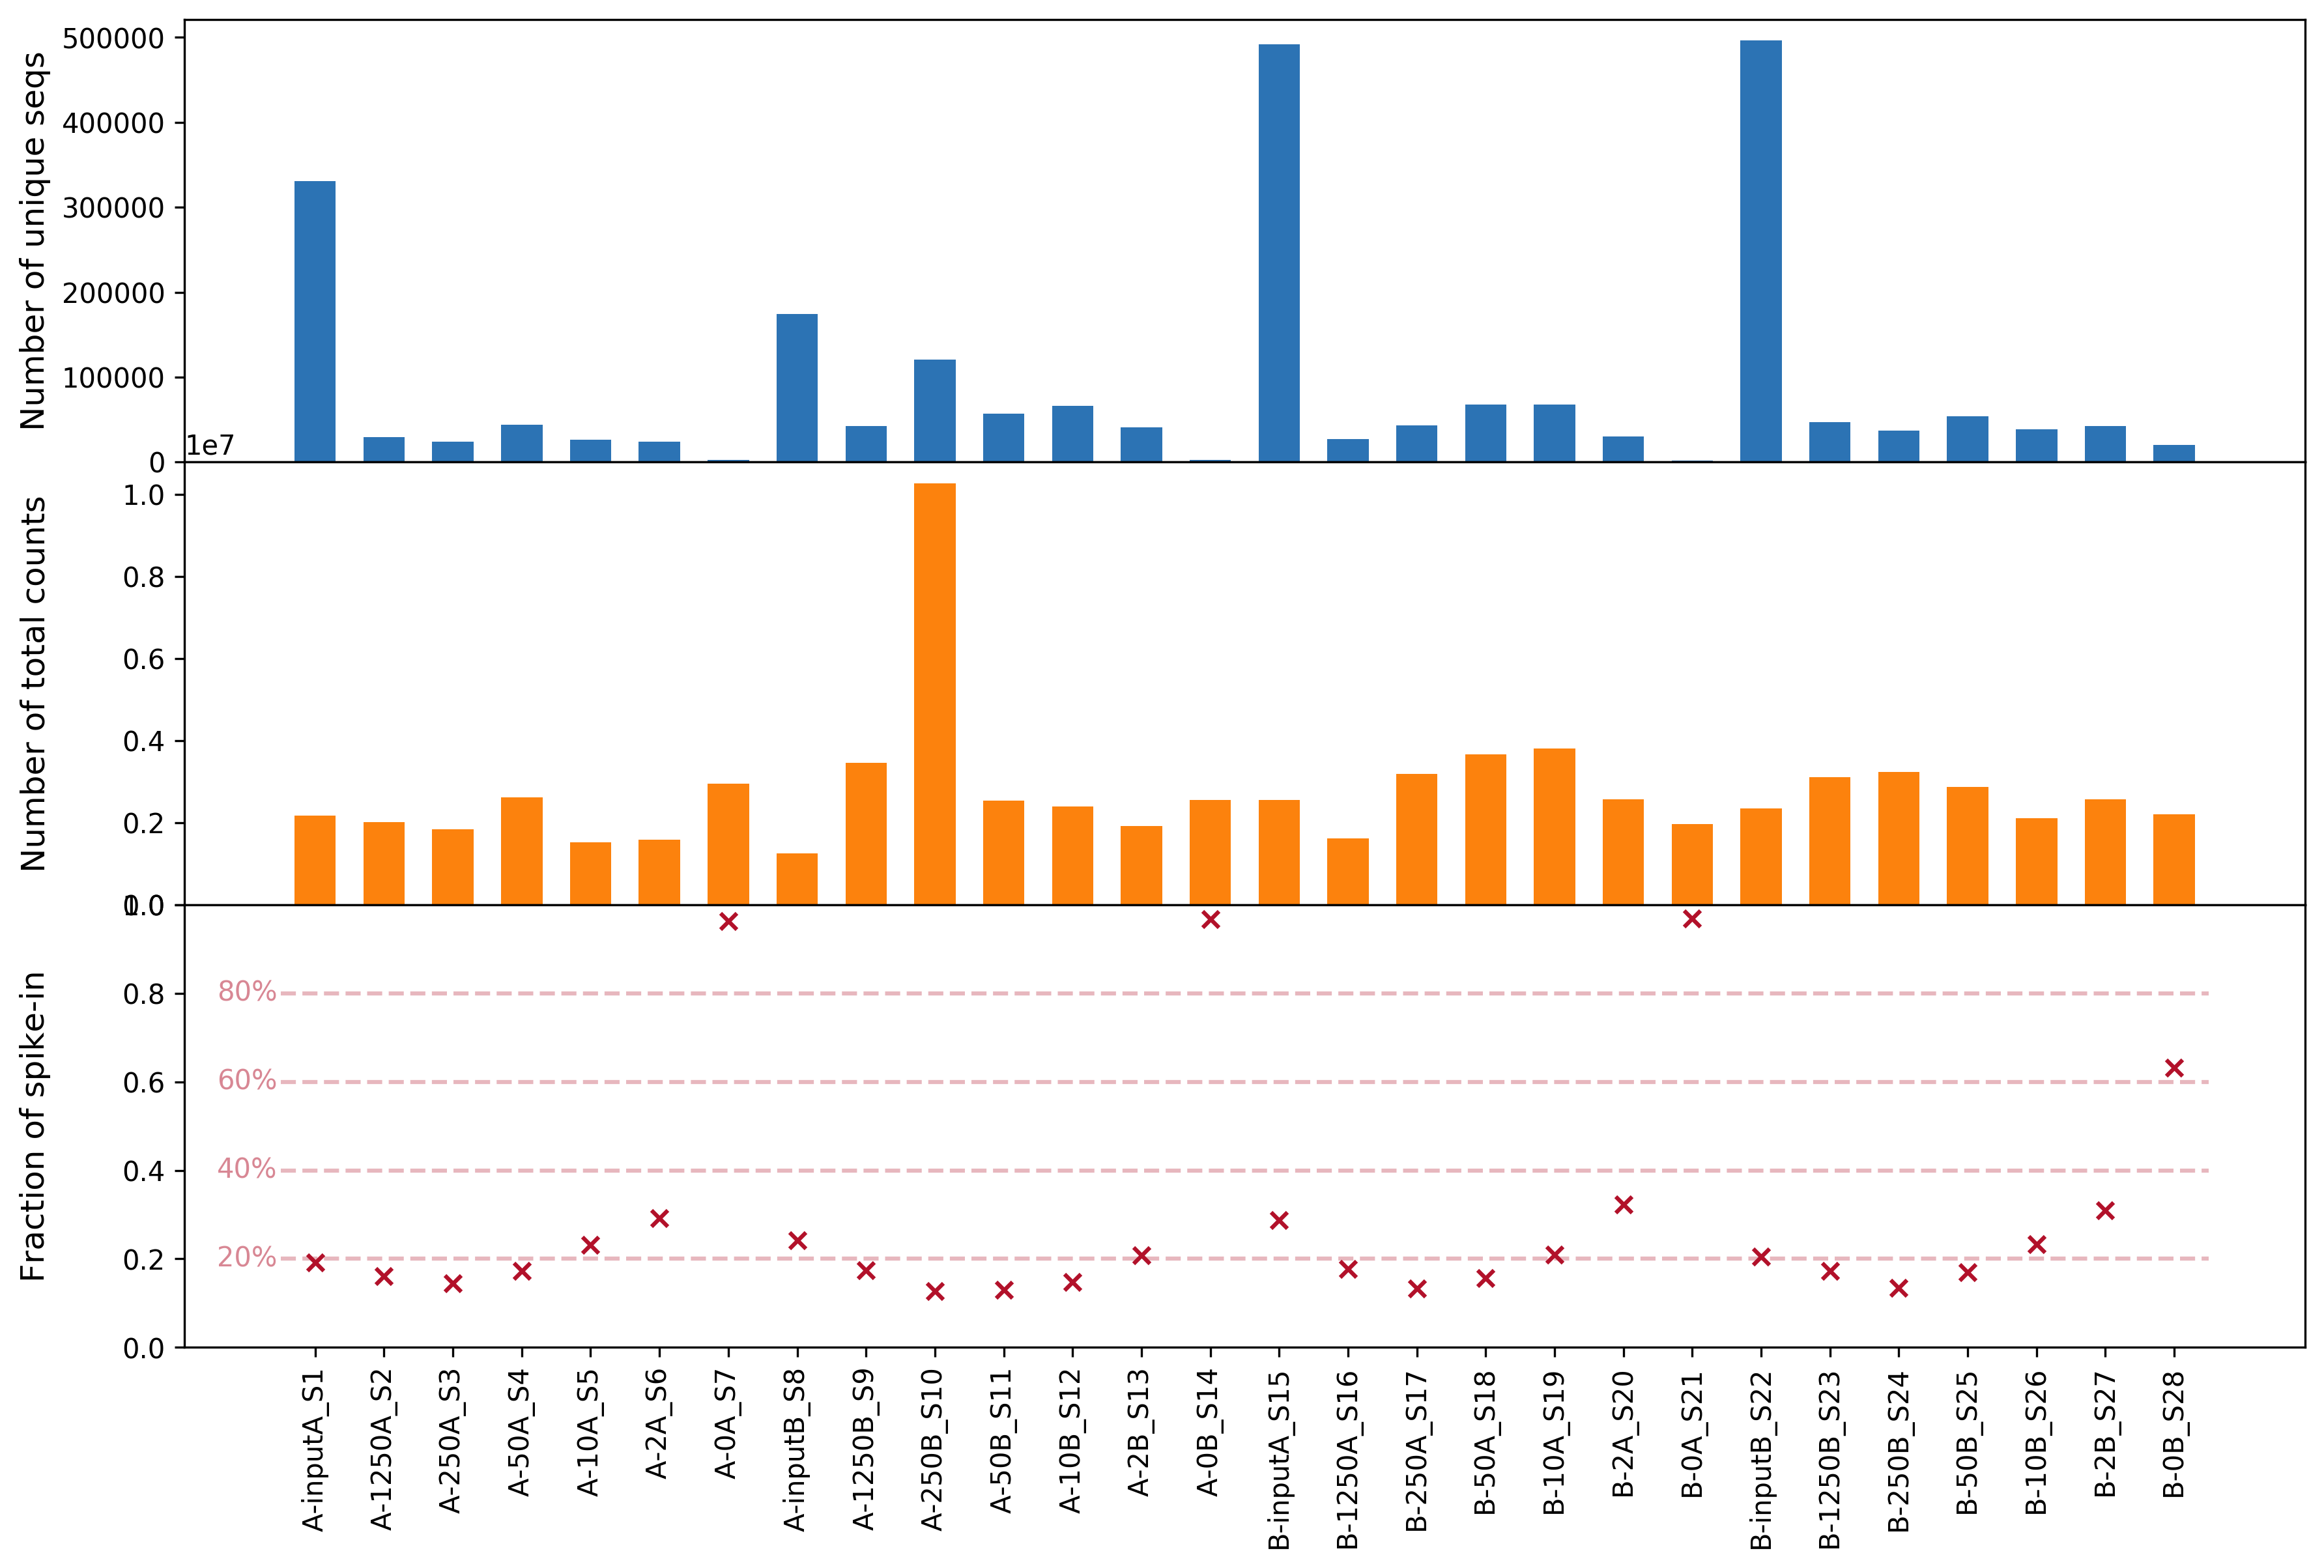

In [1296]:
sample_set.visualizer.count_file_info_plot(plot_total_counts=True,
                                           plot_unique_seq=True,
                                           plot_spike_in_frac=True,
                                           sep_plot=True)

## Distribution of spike-in peak

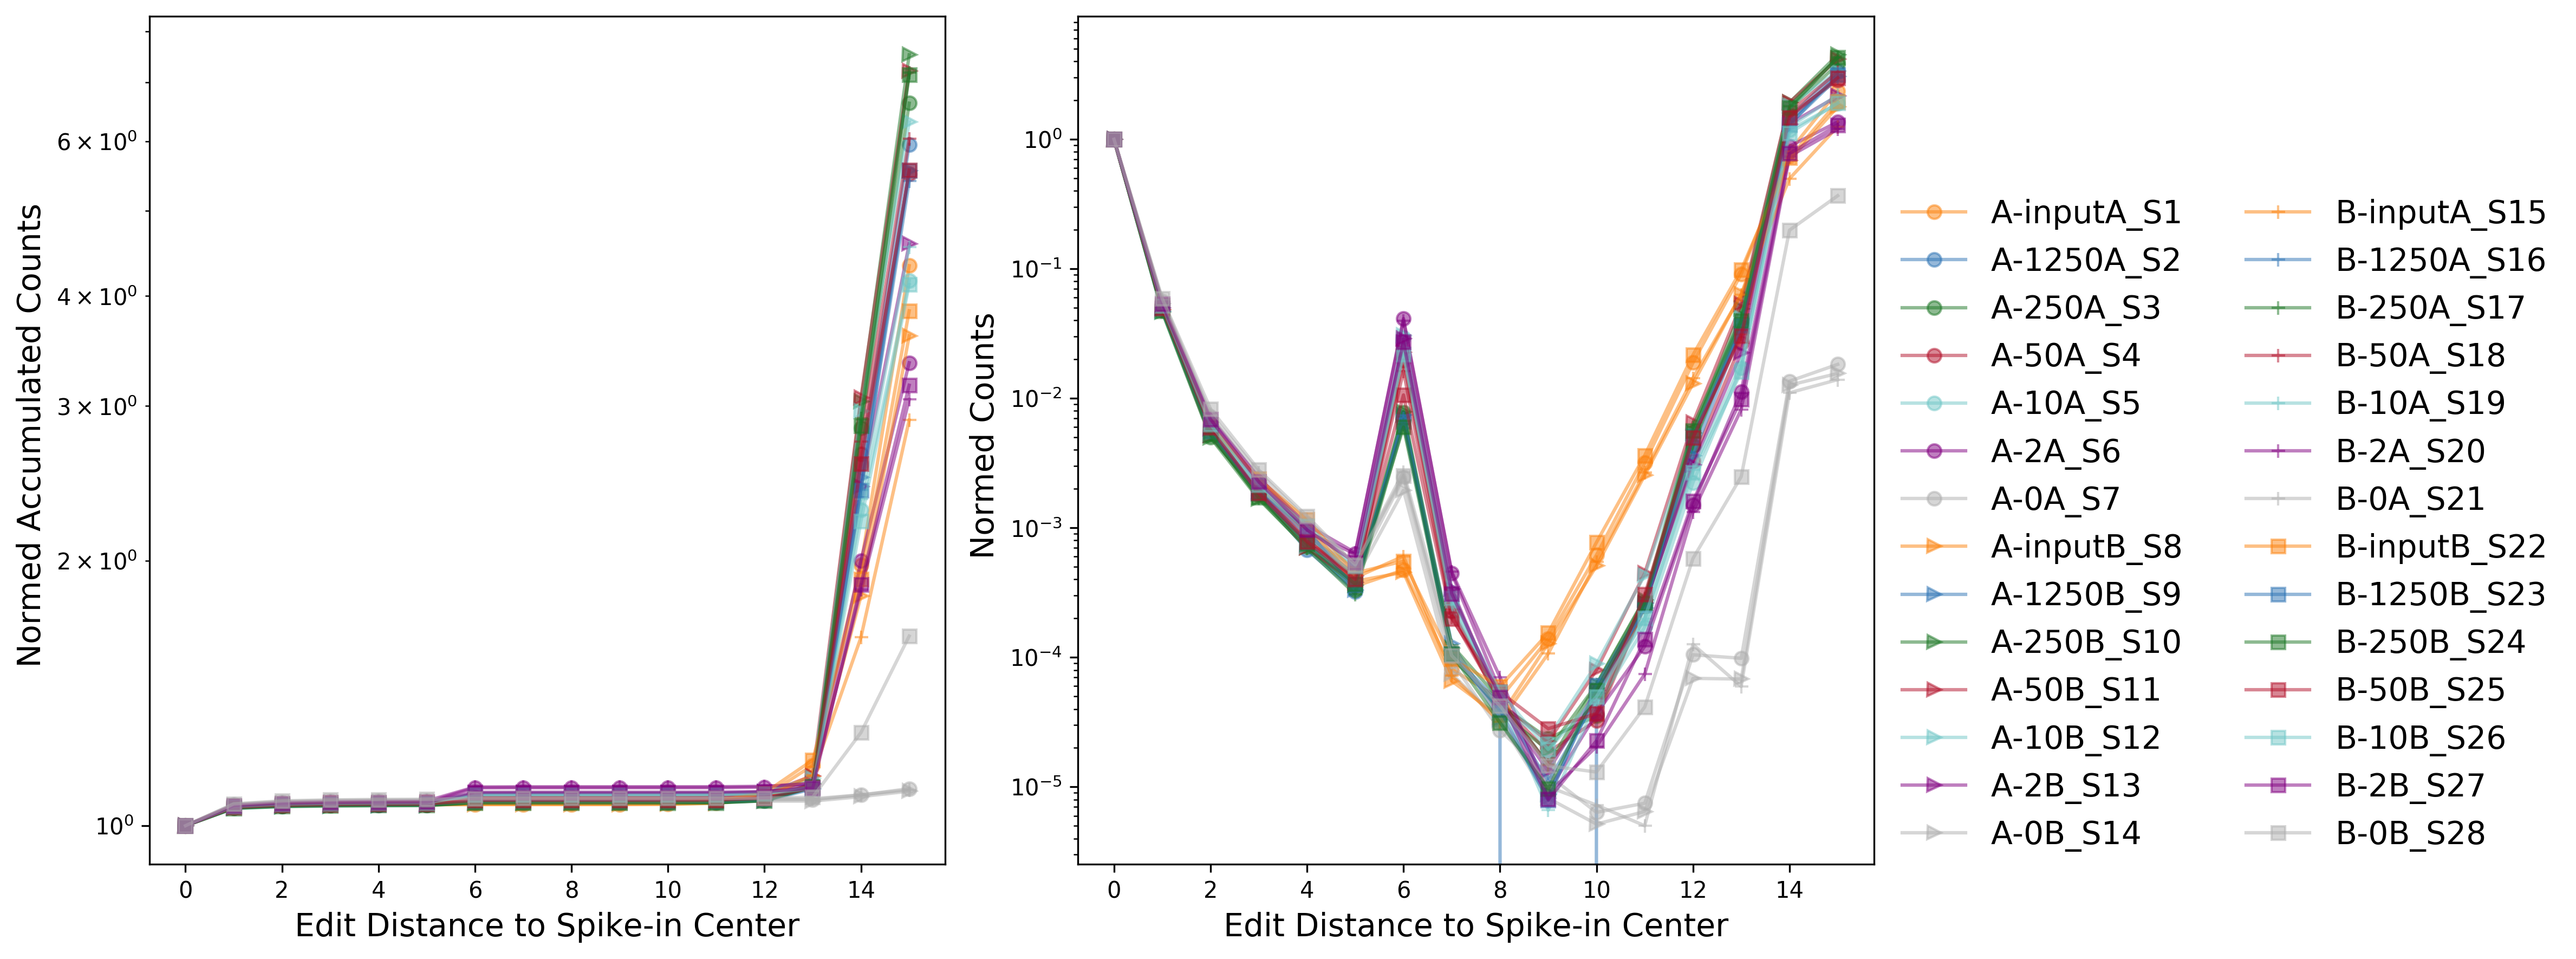

In [878]:
import numpy as np

# Manual marker/color list for each reps
marker_list = np.repeat(['-o', '->', '-+', '-s'], 7)
color_list = np.tile(['#FC820D', '#2C73B4', '#1C7725', '#B2112A', '#70C7C7', '#810080', '#AEAEAE'], reps=4).reshape([28])

# create a master figure side by side
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=[16, 6])
# add left figure as accumulated
sample_set.visualizer.spike_in_peak_plot(accumulate=True, max_dist=15, norm_on_center=True,
                                         color_list=color_list, marker_list=marker_list,
                                         legend_off=True,  ax=axes[0])
# add right figure as average peak shape, with legend
sample_set.visualizer.spike_in_peak_plot(max_dist=15, norm_on_center=True,log_y=True,
                                         color_list=color_list, marker_list=marker_list,
                                         legend_off=False,  ax=axes[1])
plt.show()

## Repeatability at sample level

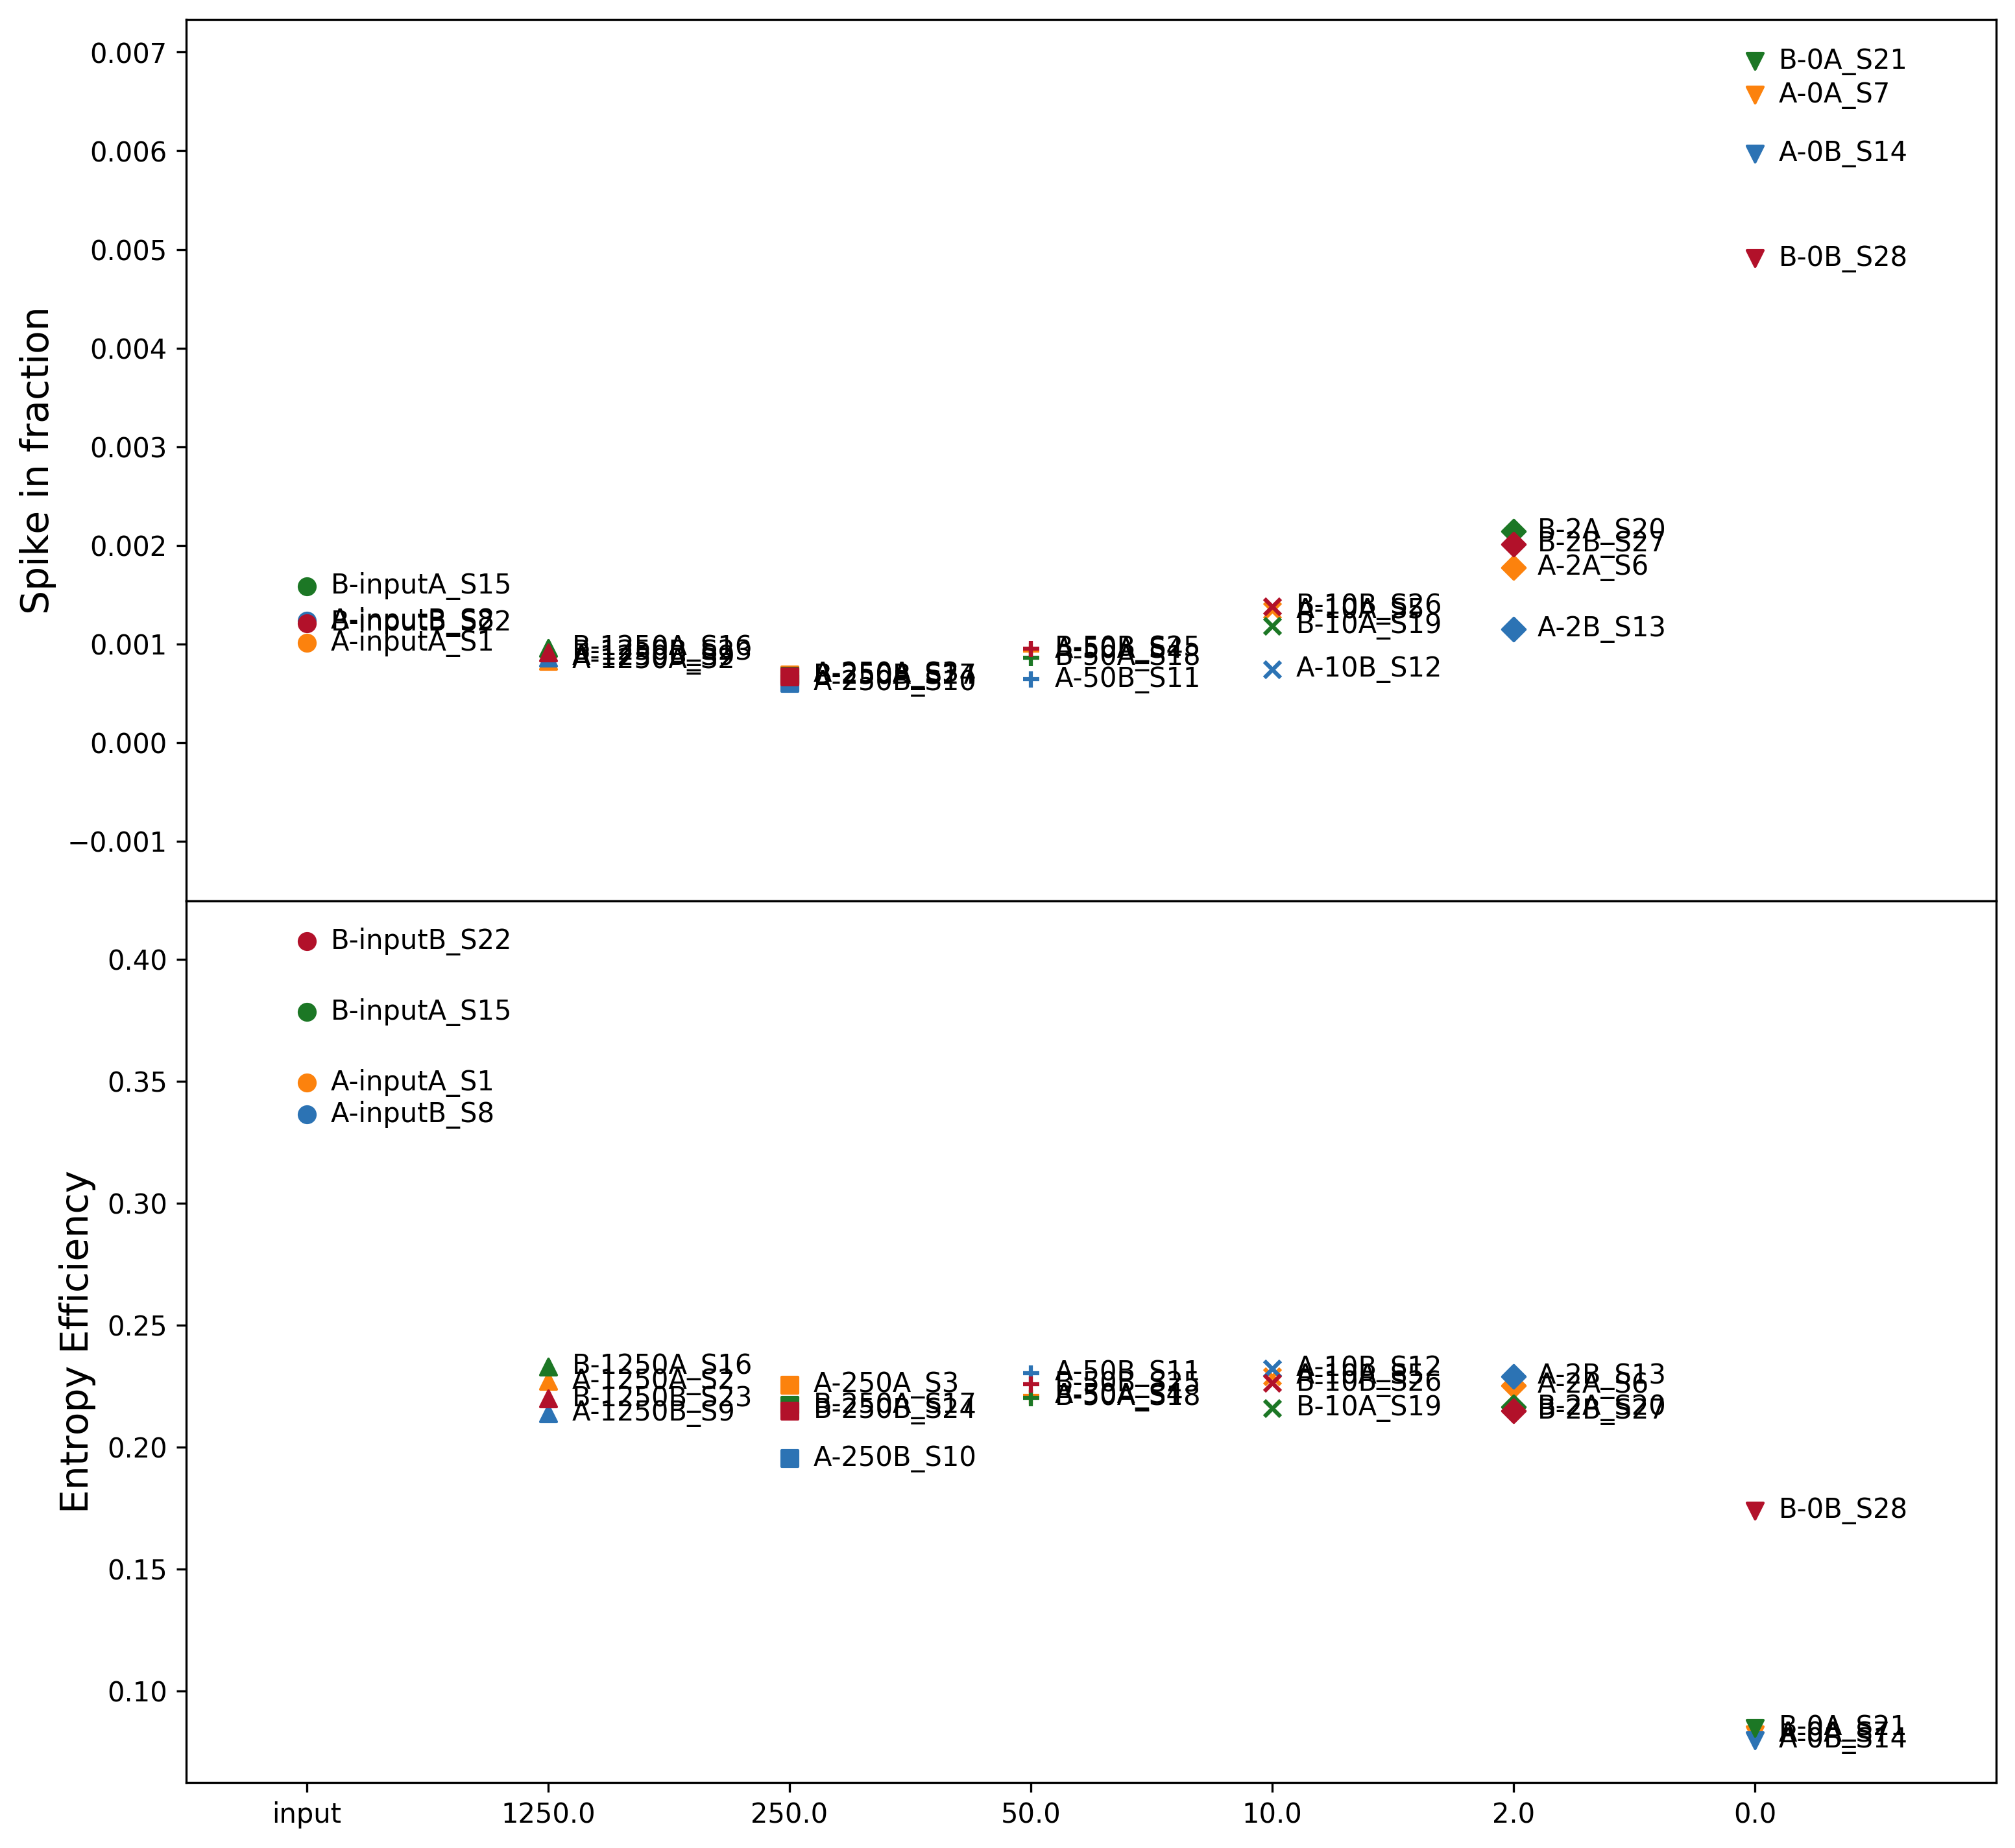

In [883]:
sample_set.visualizer.rep_spike_in_plot(group_by='byo')

## Distribution of sequence lengths

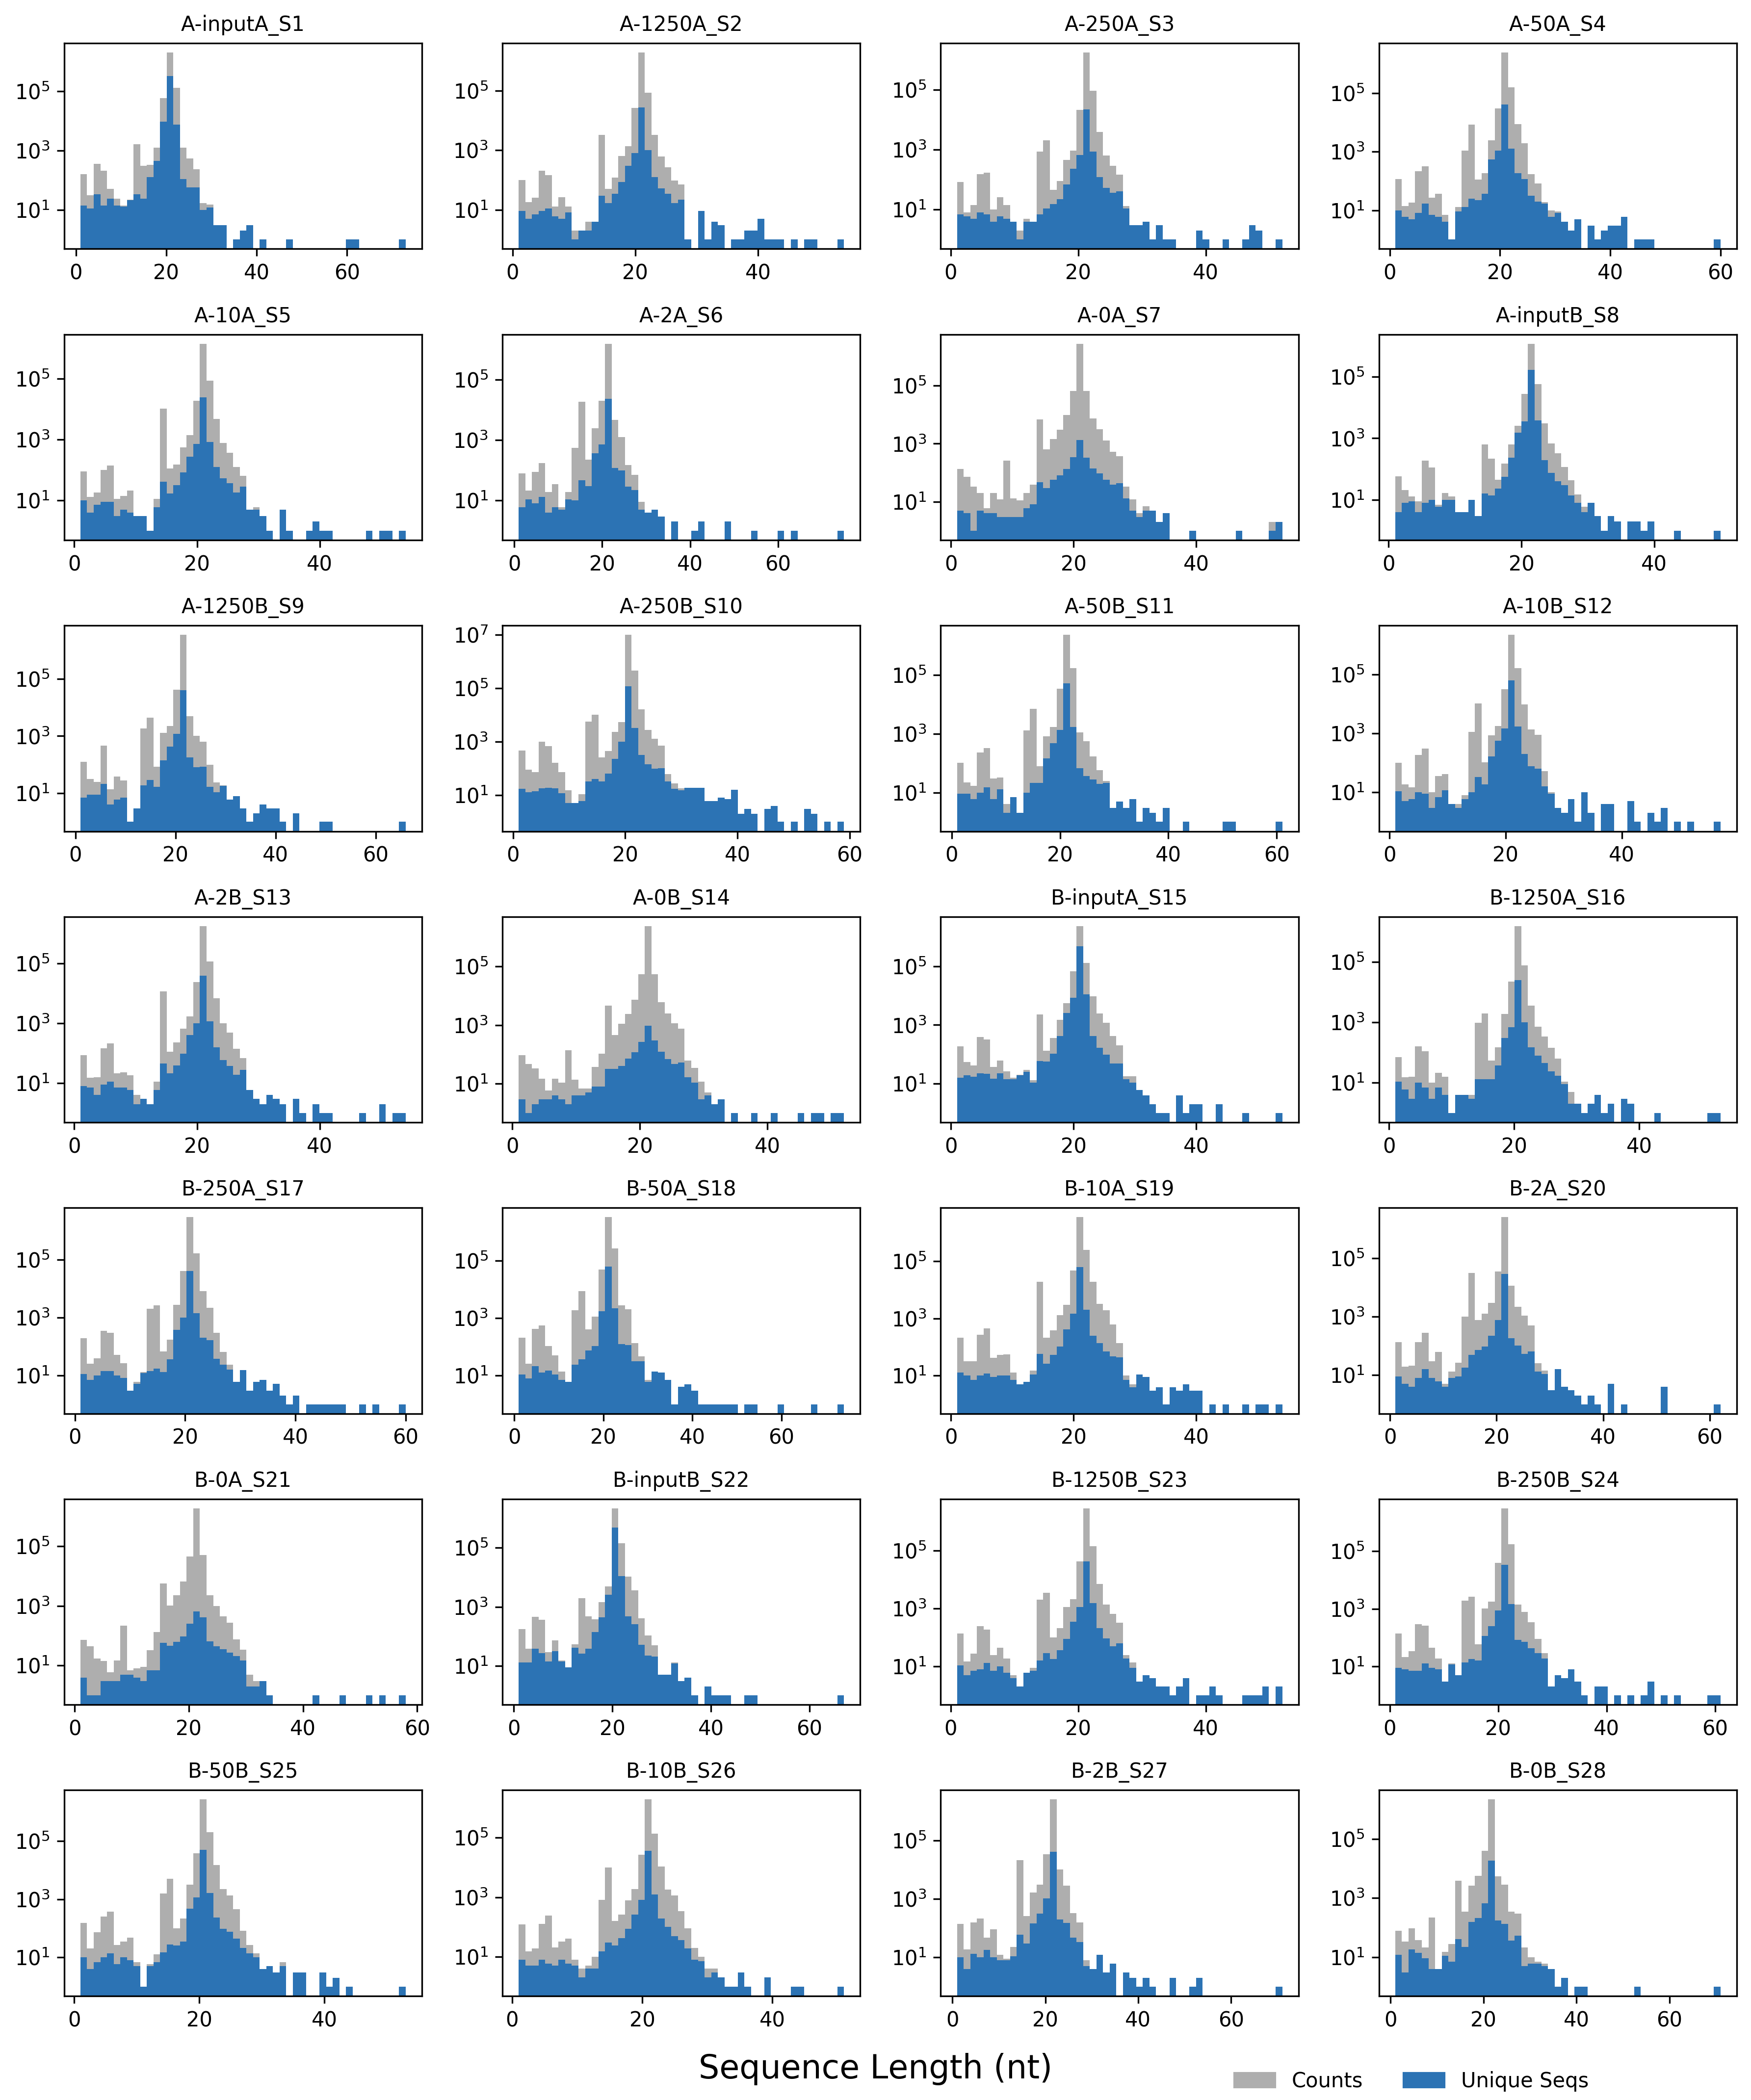

In [884]:
sample_set.visualizer.length_dist_plot_all()

## Sample thresholding test

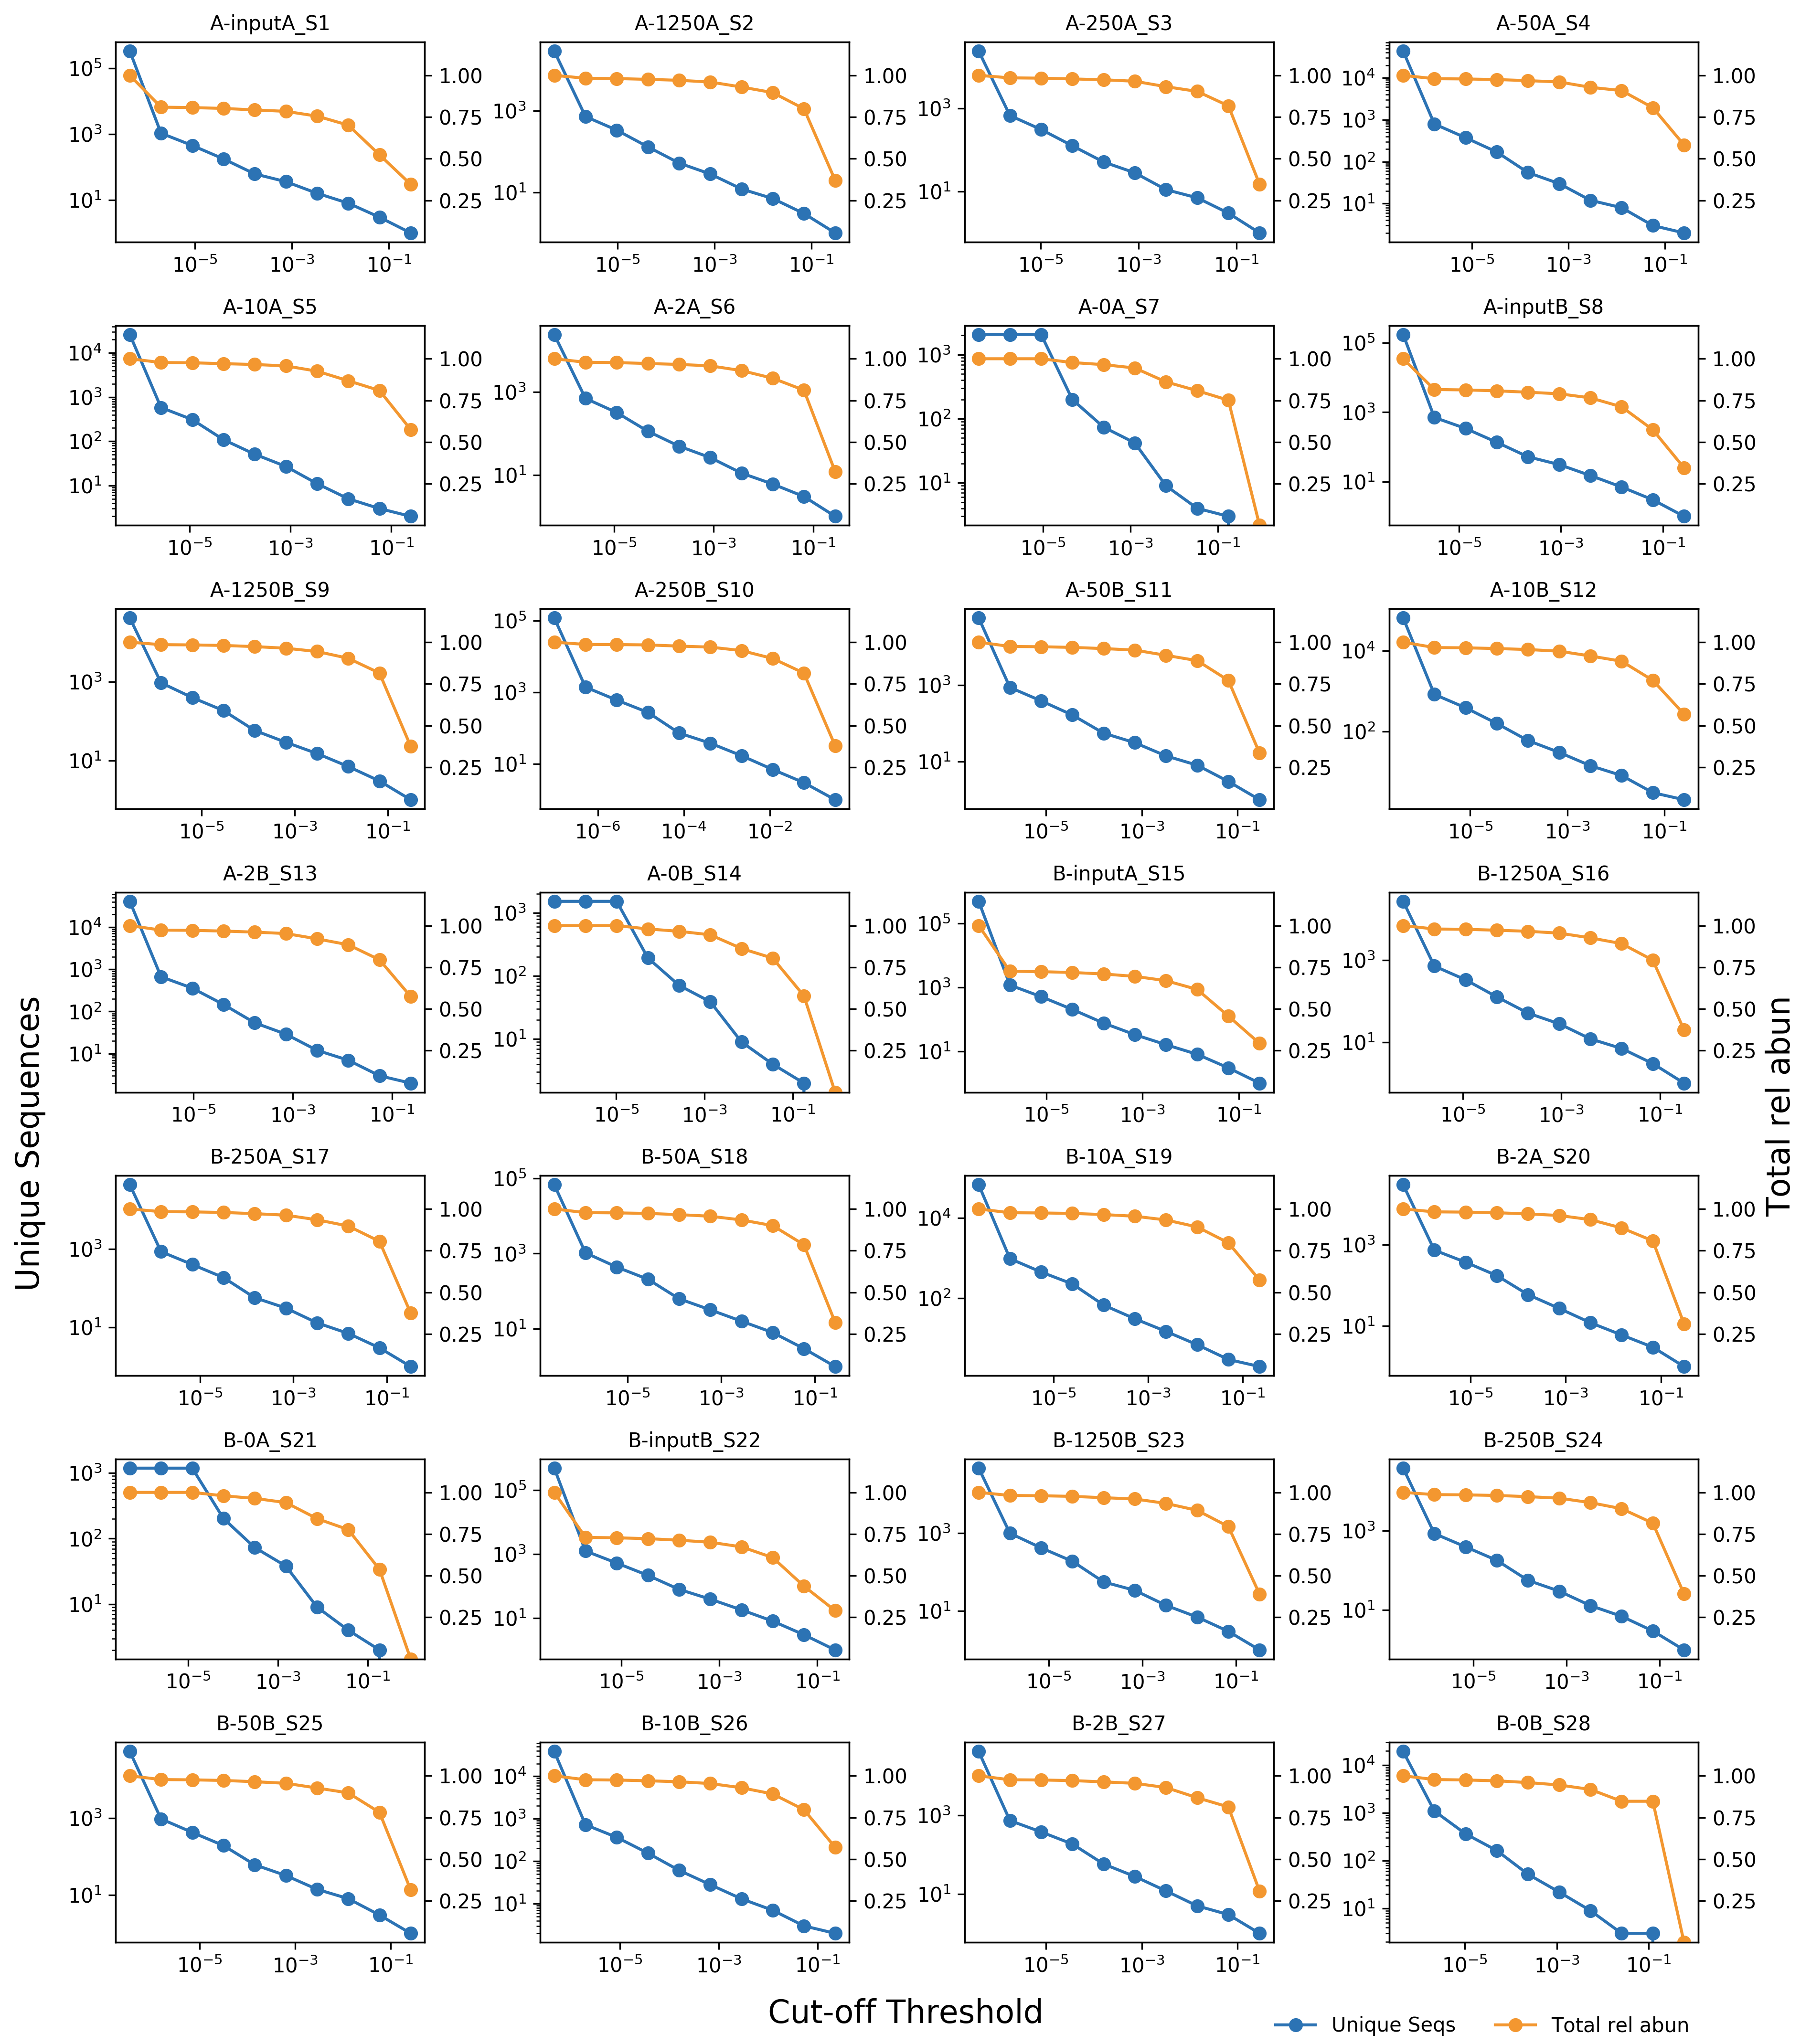

In [312]:
sample_set.visualizer.sample_count_cut_off_plot_all(sample_set)

# Valid sequences analysis
## Convert valid sequences to ```sequence_set```

In [1006]:
seq_table = sample_set.to_SeqTable(remove_spike_in=True)

In [1007]:
zero_samples = [sample_name for sample_name in seq_table.sample_info.keys() if '-0' in sample_name]
seq_table.get_reacted_frac(inplace=True, input_average='median', black_list=zero_samples)

## Valid sequence characterization

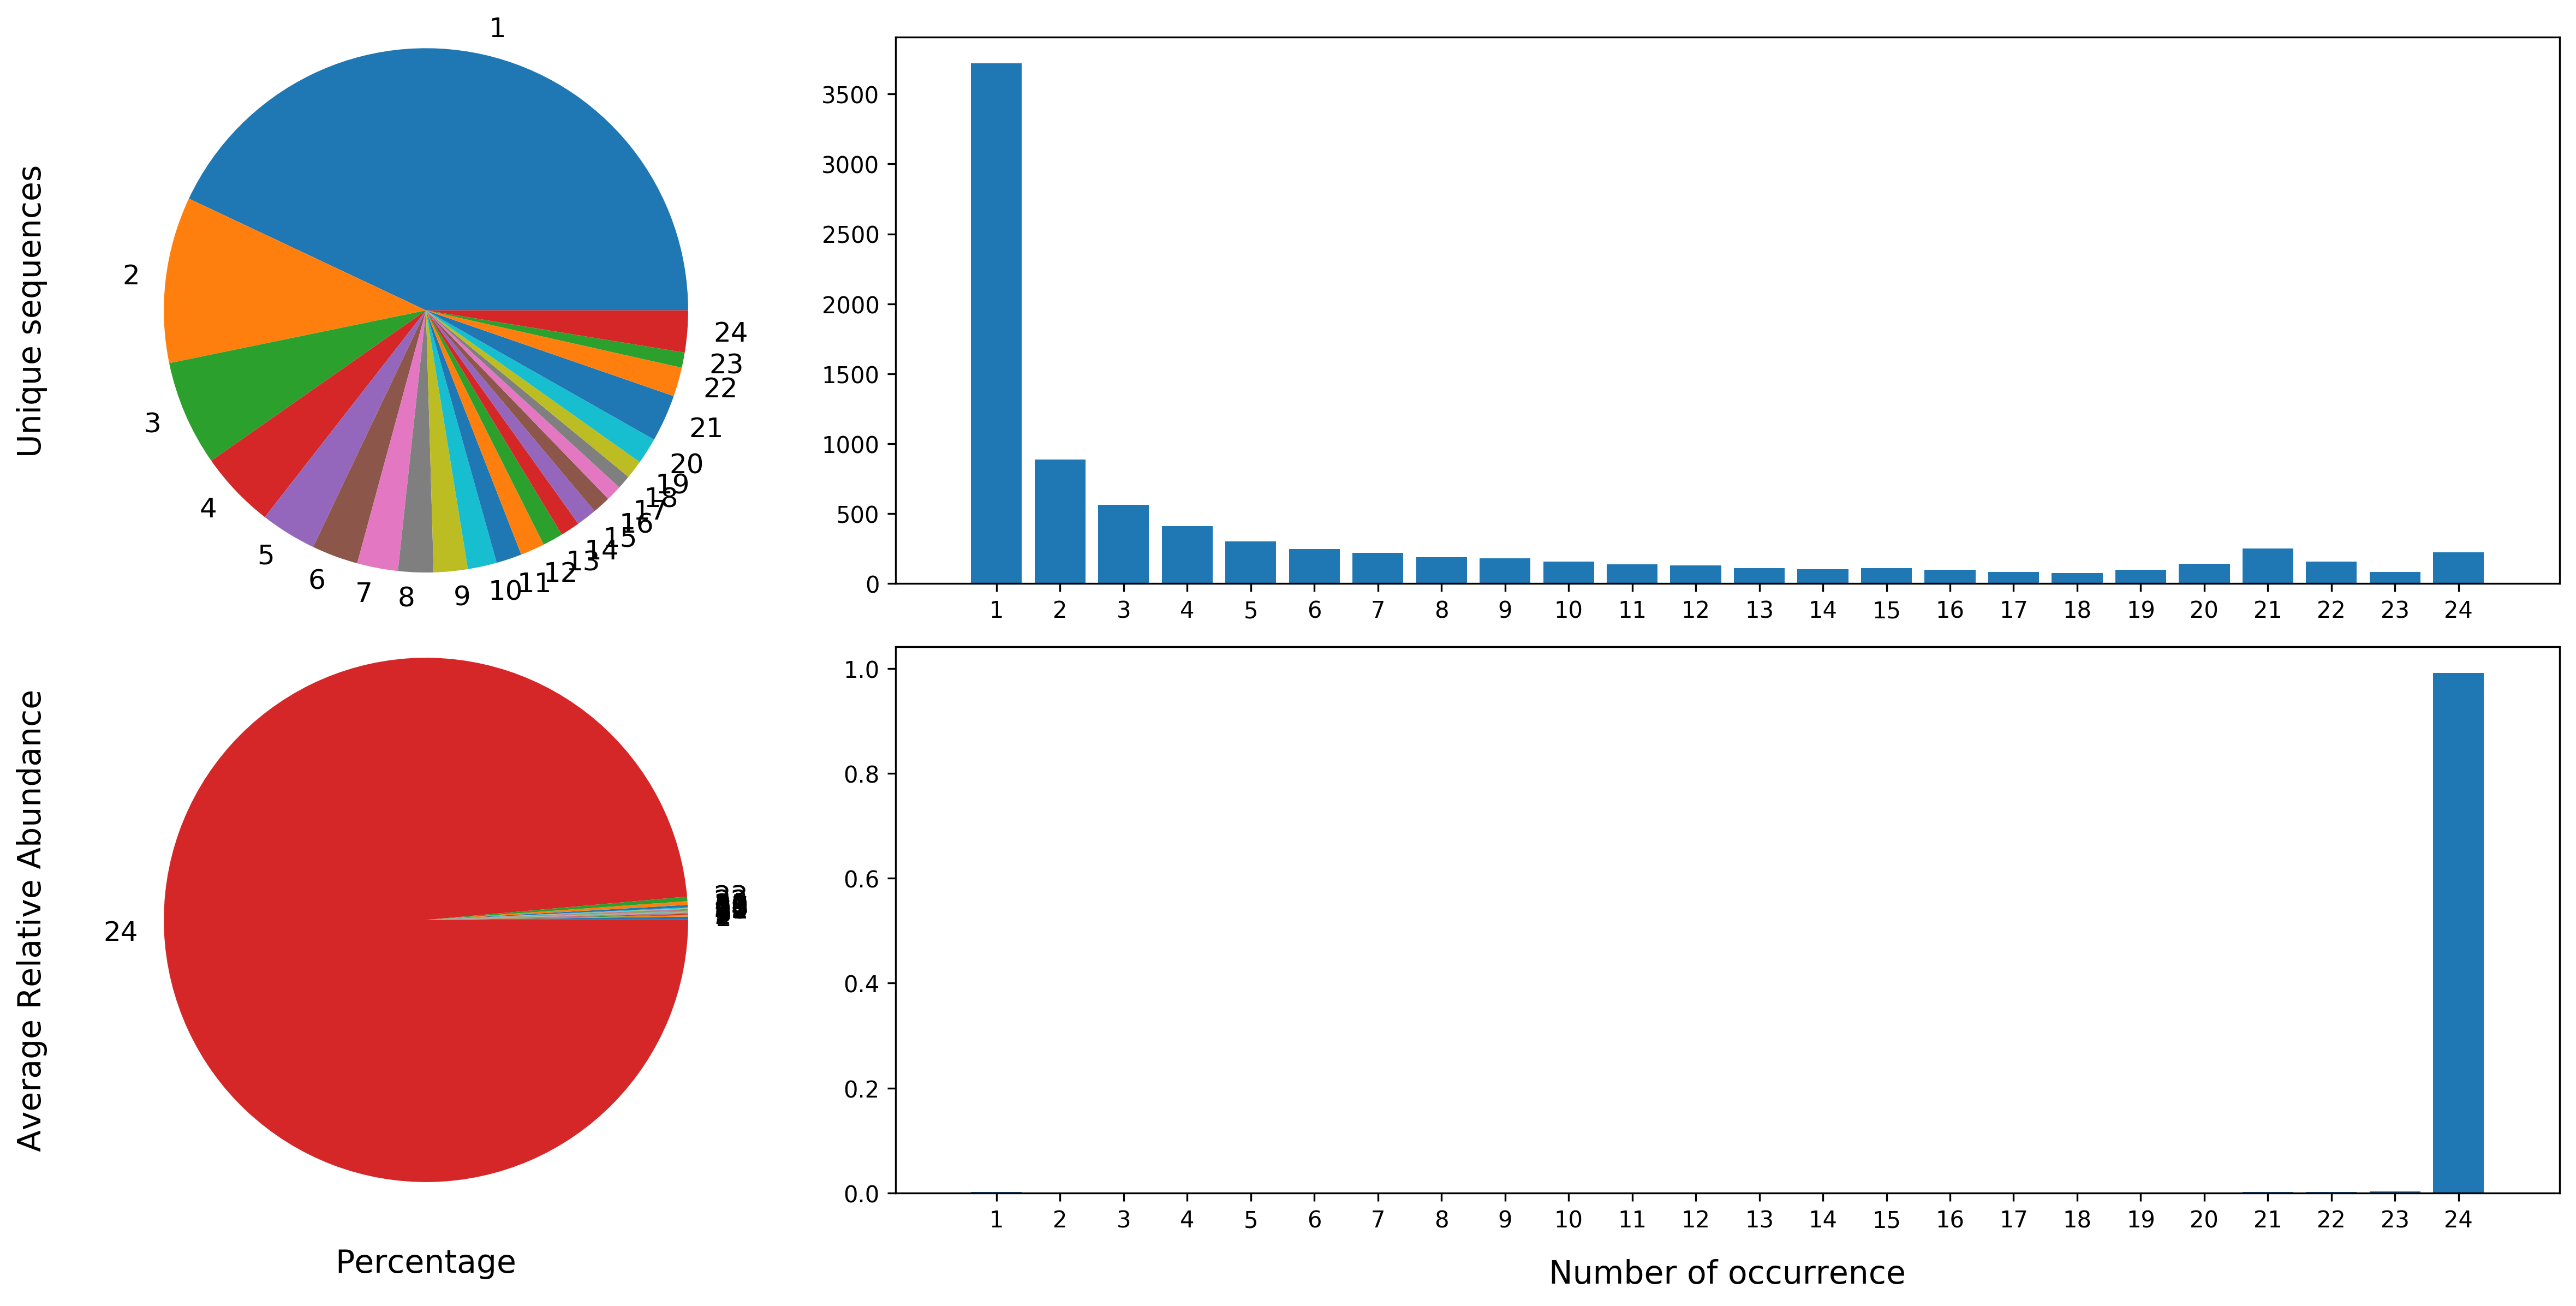

In [1009]:
seq_table.visualizer.seq_occurrence_plot()

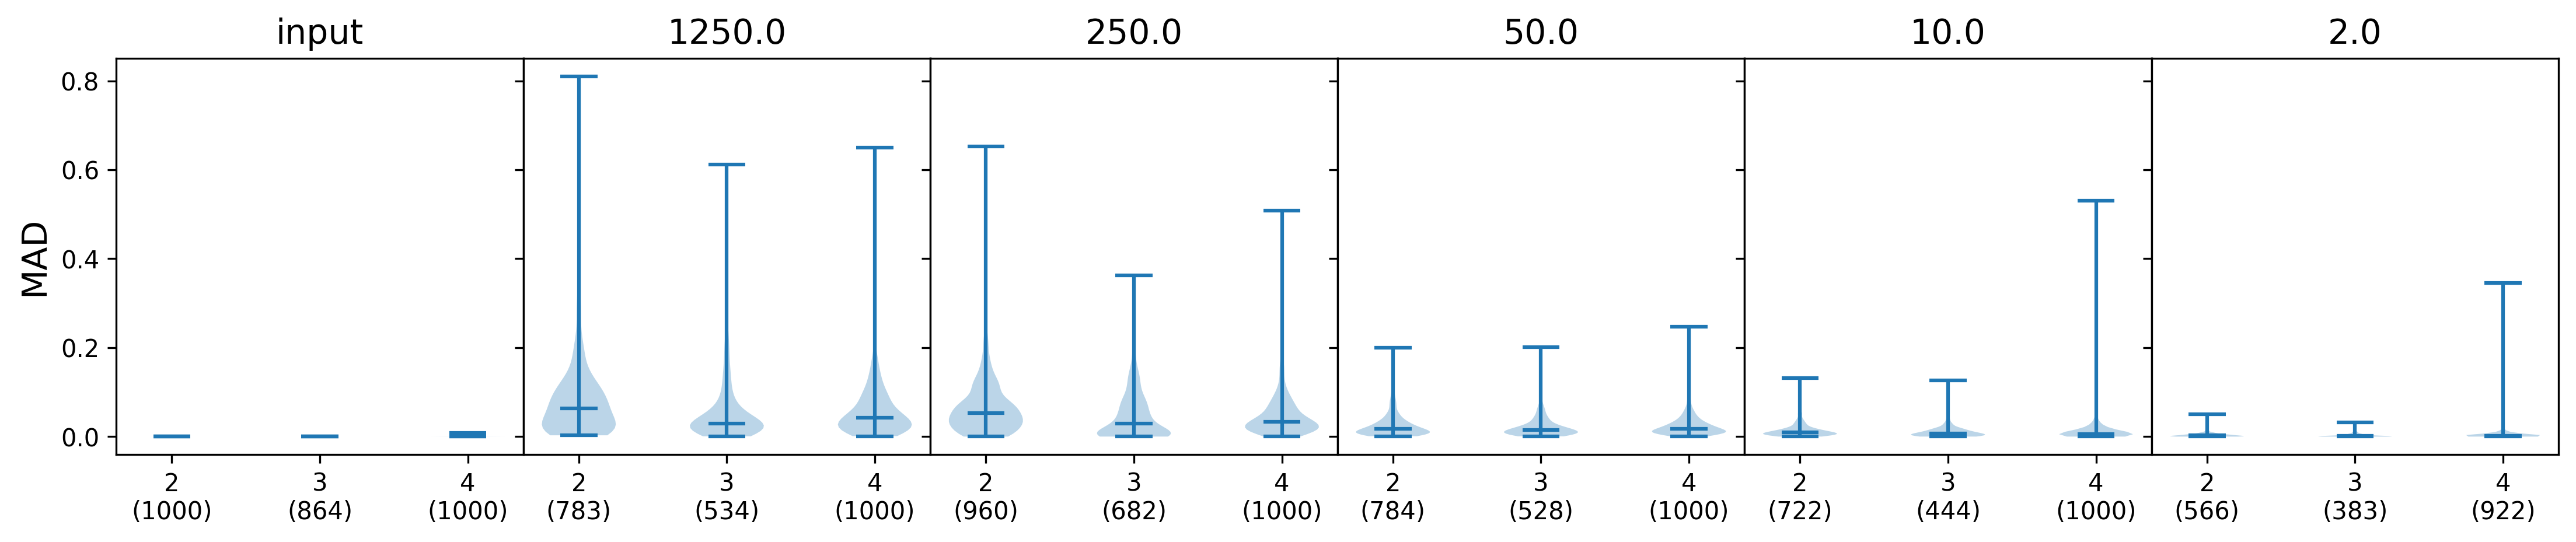

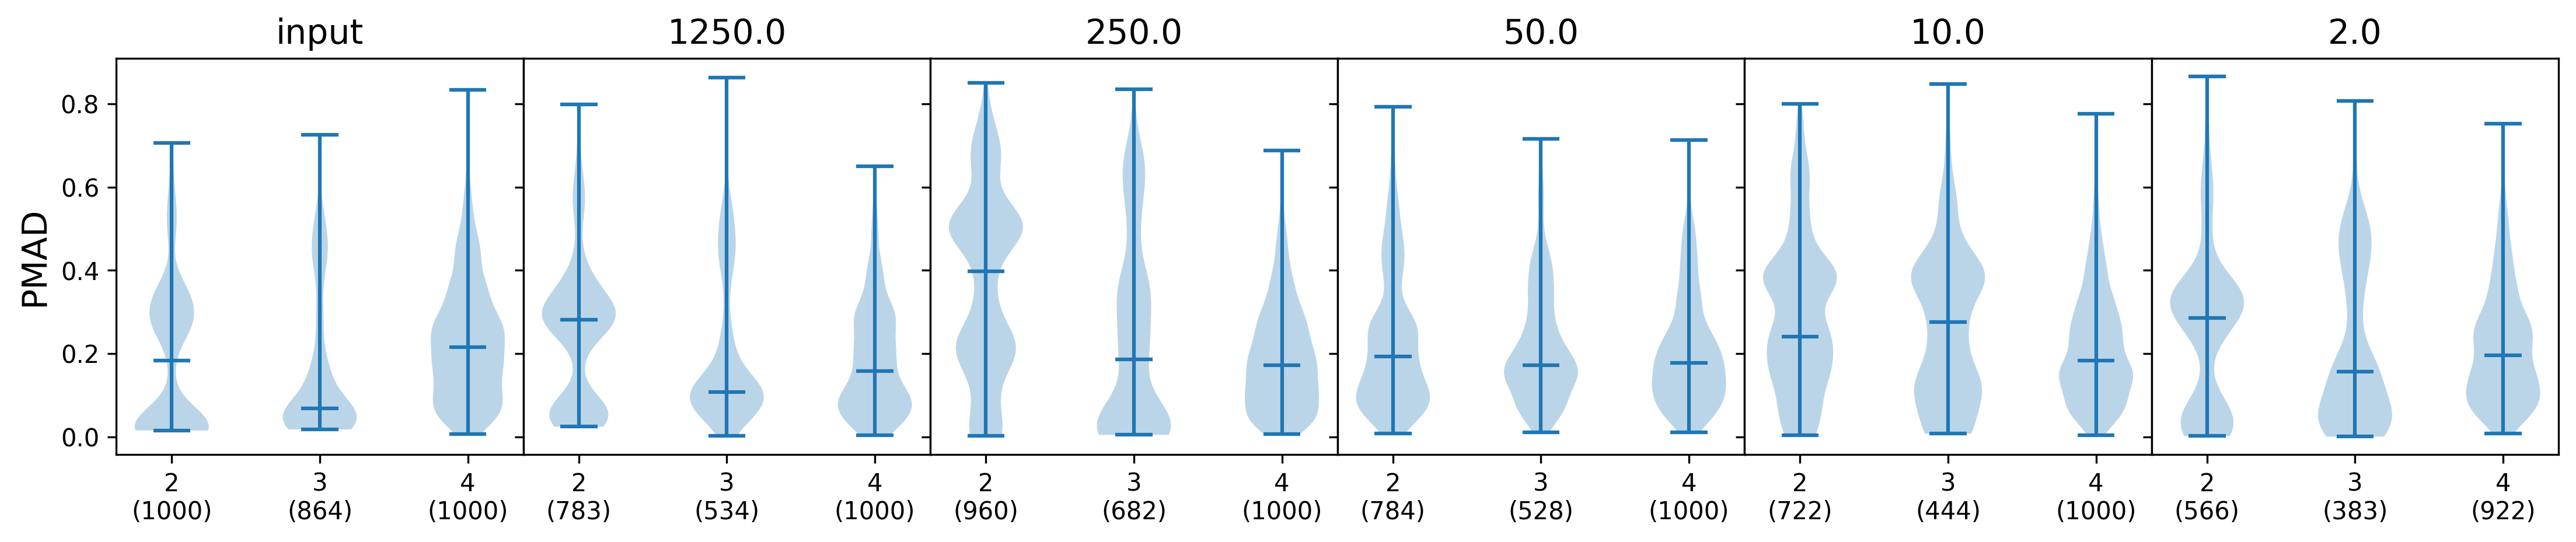

In [1011]:
seq_table.visualizer.rep_variability_plot(group_by='byo', percentage=False)
seq_table.visualizer.rep_variability_plot(group_by='byo', percentage=True)

In [1287]:
filters = k_seq.data.pre_processing.SeqFilter(seq_table=seq_table, min_counts_input=20, min_counts_reacted=20)
filters.seq_to_keep

Index(['CTCTACTTCAAGCAATCGGTC', 'AAAAACAAAAAAAACAAAAACAAA',
       'CTGCCACTTCAAACAATCGGT', 'CCGCTTCAAGCAATCGGTCGC',
       'ATTACCCTGGTTATCGAGTGA', 'CCGCTTCAAACAATCGGTTTG',
       'CTACTTCAAACTATCGGTCTG', 'ACCCACTTCAAACAATCGGTCTG',
       'CTACTTCAAACAATTGGTCTG', 'GAGTGT',
       ...
       'ATTACCCTGGTCACCGAGTGA', 'ATTCACCTAGGTCATCGGGTGTTCA',
       'ATTACCCTGGTCATCGGGTG', 'CCCTTCAAACAATCGGTCTTC', 'CAGTCTTCAAACAATCGGTC',
       'TTCAAACAATCGGCCTGCACT', 'ACCCGCTTCAACCAATCGGTC',
       'CTACTTCAAGCAATCGGTCTG', 'ATCCAGTTTCAAGCAATCGGT',
       'AAAAAAAACAAAAACAAAAACAAA'],
      dtype='object', length=293)

# Fitting

In [1089]:
fitting = k_seq.fitting.fitting.SingleFitting.from_SeqTable(
    seq_table=seq_table, seq='ATTCACCTAGGTCATCGGCTGT',
    model=bfo_model,
    bootstrap_depth=500,
    metrics={'kA': lambda row: row['k'] * row['A']}
)
fitting.fitting()

In [1129]:
def bfo_model(x, A, k):
    return A * (1 - np.exp(-0.3371 * 90 * k * x * 1e-6))

def metric_kA(row):
    return row['k'] * row['A']

selected_seq = [
    'ATTACCCTGGTCATCGAGTGA',
    'ATTACCCTGGTCATCGAGTGT',
    'CTACTTCAAACAATCGGTCTG',
    'CCACACTTCAAGCAATCGGTC',
    'CCGCTTCAAGCAATCGGTCGC',
    'CCGAGTTTCAAGCAATCGGTC',
    'AAGTTTGCTAATAGTCGCAAG',
]

seq_table_trimmed = seq_table.filter_seq(seq_to_keep=selected_seq, inplace=False)
fitter = k_seq.fitting.fitting.BatchFitting.from_SeqTable(seq_table=seq_table_trimmed, model=bfo_model, bootstrap_depth=500, metrics={'kA': metric_kA} )

In [1130]:
fitter.fitting(parallel_cores=6)

In [1131]:
fitter.summary

A_point_est  k_point_est  kA_point_est    A_mean  \
ATTACCCTGGTCATCGAGTGA     0.897219   354.567664    318.124711  0.895869   
ATTACCCTGGTCATCGAGTGT     1.018670   389.473290    396.744853  1.018136   
CTACTTCAAACAATCGGTCTG     0.498193   264.077032    131.561299  0.498084   
CCACACTTCAAGCAATCGGTC     0.140132   277.714711     38.916659  0.139908   
CCGCTTCAAGCAATCGGTCGC     0.212059   186.930182     39.640235  0.211285   
CCGAGTTTCAAGCAATCGGTC     0.558760   458.808604    256.363899  0.565722   
AAGTTTGCTAATAGTCGCAAG     0.043316   139.746450      6.053238  0.050556   

                          A_std     A_2.5  A_median    A_97.5      k_mean  \
ATTACCCTGGTCATCGAGTGA  0.027077  0.841852  0.897673  0.947909  362.976455   
ATTACCCTGGTCATCGAGTGT  0.024690  0.977769  1.015668  1.070862  397.128622   
CTACTTCAAACAATCGGTCTG  0.012780  0.474271  0.497948  0.522563  266.673960   
CCACACTTCAAGCAATCGGTC  0.008041  0.122589  0.140594  0.153473  291.382911   
CCGCTTCAAGCAATCGGTCGC  0.016398  0.171642  0.212659  0.237044  199.845764   
CCGAGTTTCAAGCAATCGGTC  0.050466  0.473483  0.566723  0.656483  457.027546   
AAGTTTGCTAATAGTCGCAAG  0.120101  0.026178  0.043879  0.074002  176.531369   

                            k_std       k_2.5    k_median      k_97.5  \
ATTACCCTGGTCATCGAGTGA   49.176141  287.793238  356.015994  475.704318   
ATTACCCTGGTCATCGAGTGT   43.217563  331.339990  390.108681  494.192299   
CTACTTCAAACAATCGGTCTG   26.696892  220.659383  264.030793  326.026705   
CCACACTTCAAGCAATCGGTC   70.457039  192.232318  279.974344  460.433066   
CCGCTTCAAGCAATCGGTCGC   49.997905  134.090246  190.081807  334.844136   
CCGAGTTTCAAGCAATCGGTC  138.089884  203.419164  456.464336  725.675716   
AAGTTTGCTAATAGTCGCAAG  111.980646   42.858005  148.875788  443.239625   

                          kA_mean     kA_std      kA_2.5   kA_median  \
ATTACCCTGGTCATCGAGTGA  324.315651  37.767885  267.902569  318.929516   
ATTACCCTGGTCATCGAGTGT  403.683069  38.540578  352.342008  397.324962   
CTACTTCAAACAATCGGTCTG  132.673882  12.077197  111.442499  131.649417   
CCACACTTCAAGCAATCGGTC   40.366501   8.094417   28.177655   39.461299   
CCGCTTCAAGCAATCGGTCGC   41.578519   7.517303   30.777413   40.164892   
CCGAGTTTCAAGCAATCGGTC  253.102019  61.321906  129.640547  259.837172   
AAGTTTGCTAATAGTCGCAAG    7.006979   2.816113    2.891132    6.607621   

                          kA_97.5  
ATTACCCTGGTCATCGAGTGA  405.899883  
ATTACCCTGGTCATCGAGTGT  486.811122  
CTACTTCAAACAATCGGTCTG  161.667495  
CCACACTTCAAGCAATCGGTC   58.694307  
CCGCTTCAAGCAATCGGTCGC   59.132330  
CCGAGTTTCAAGCAATCGGTC  366.755141  
AAGTTTGCTAATAGTCGCAAG   13.256369

input is BatchFitting


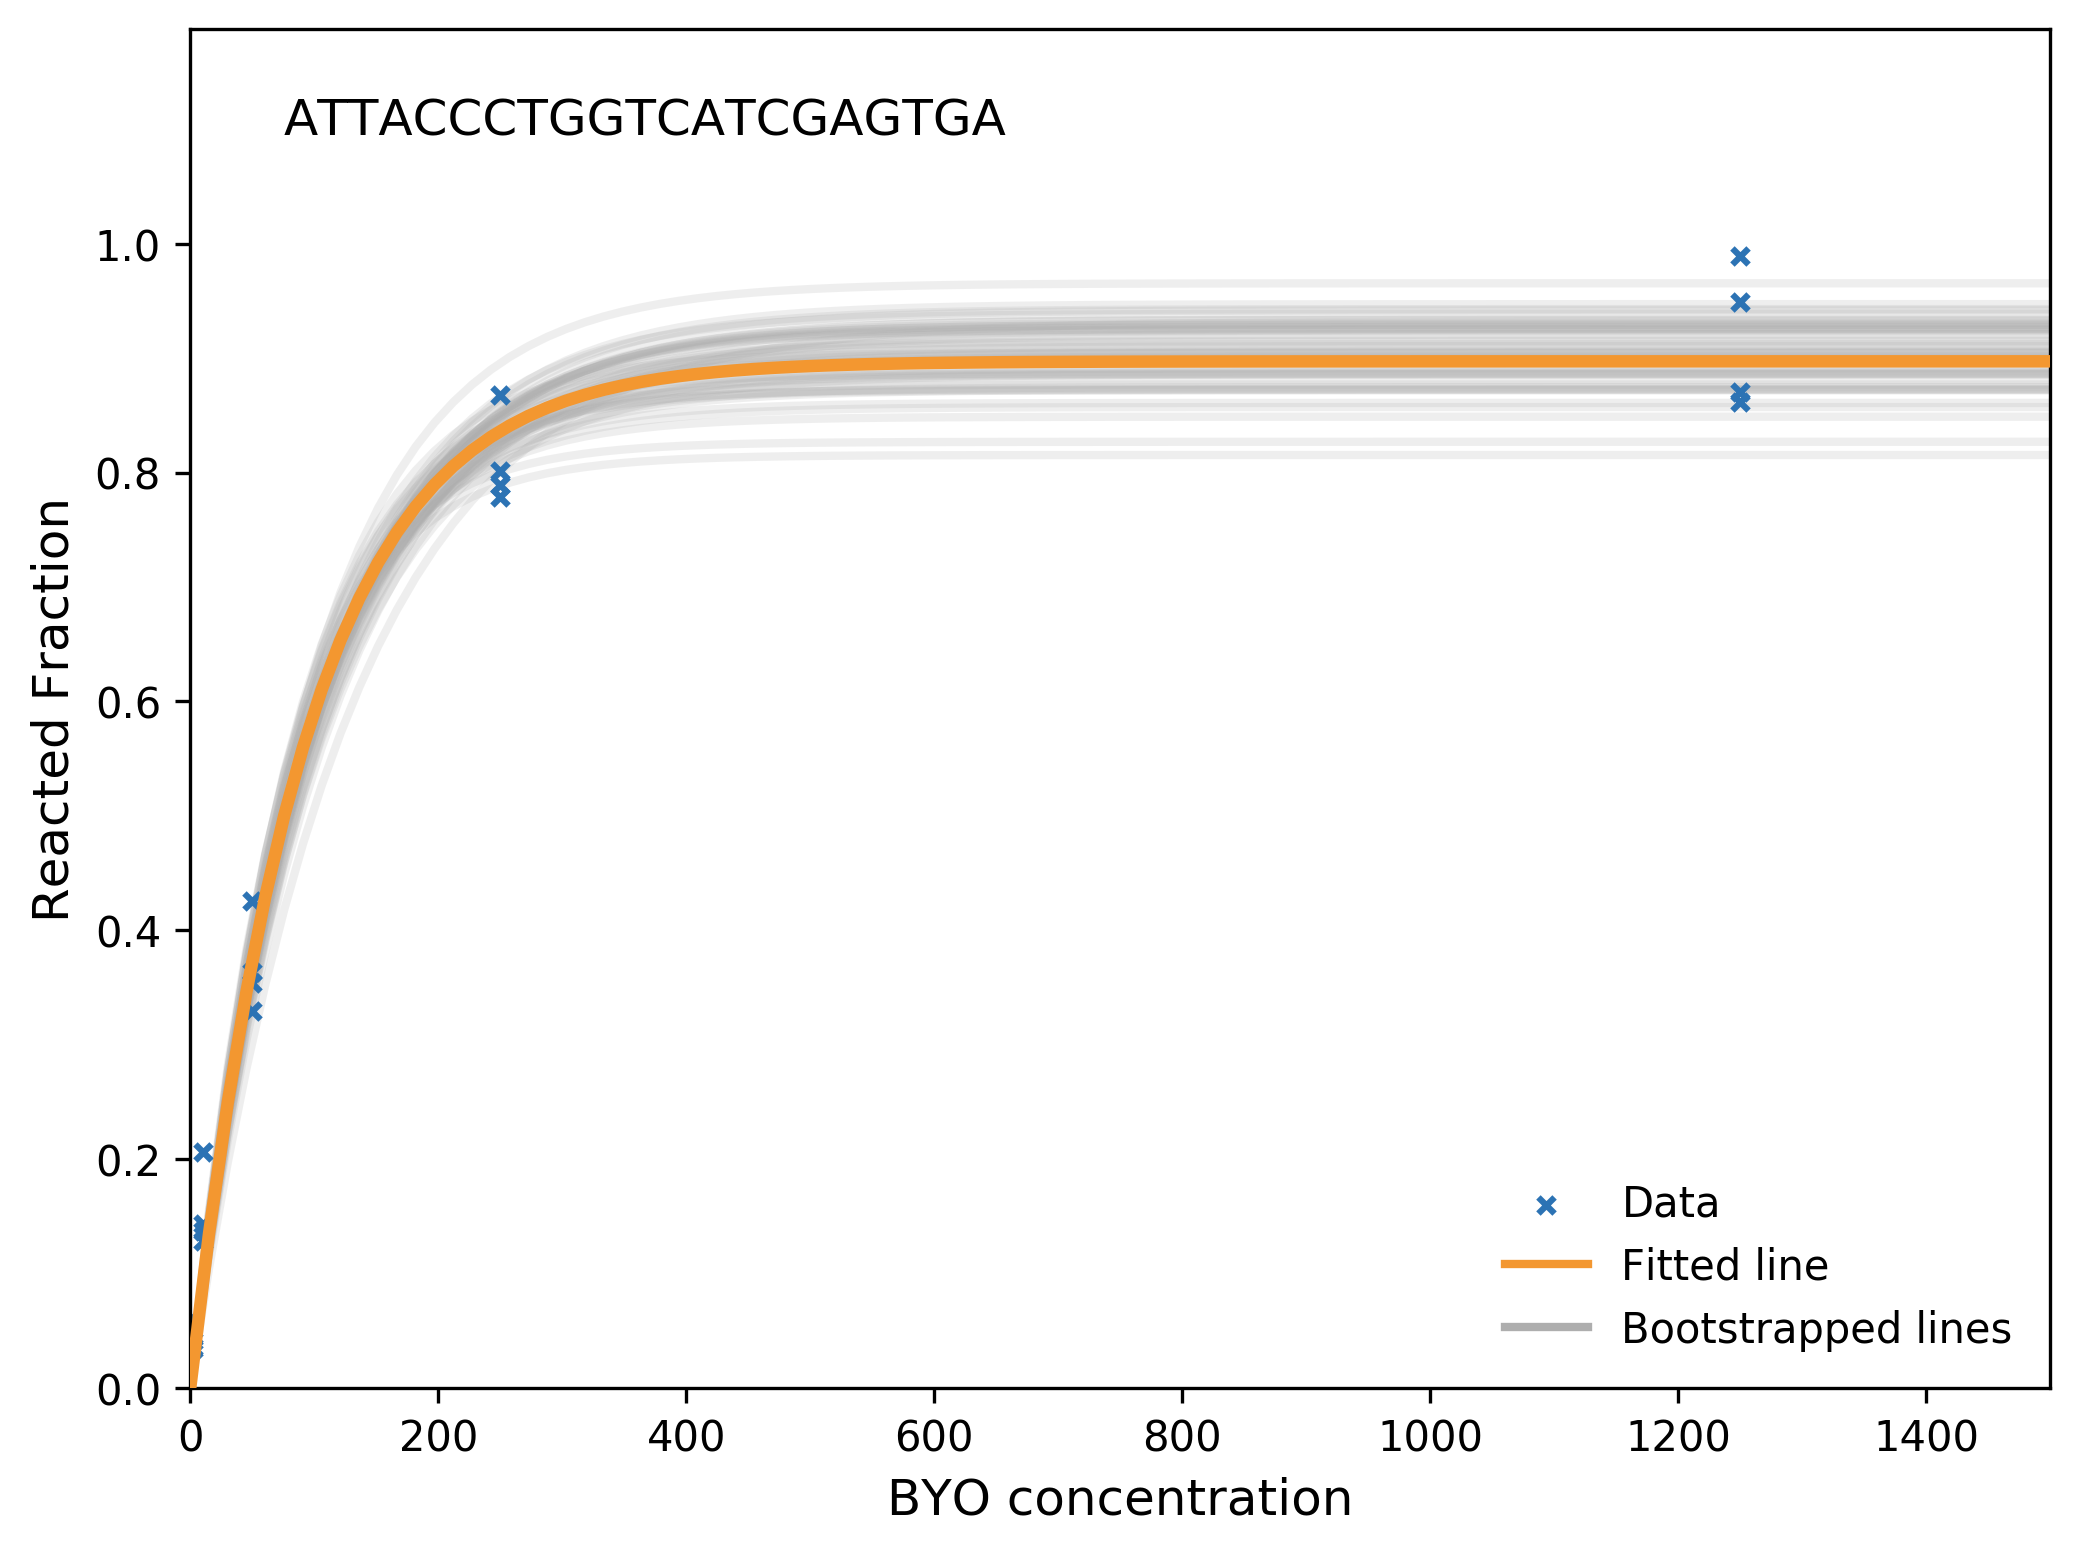

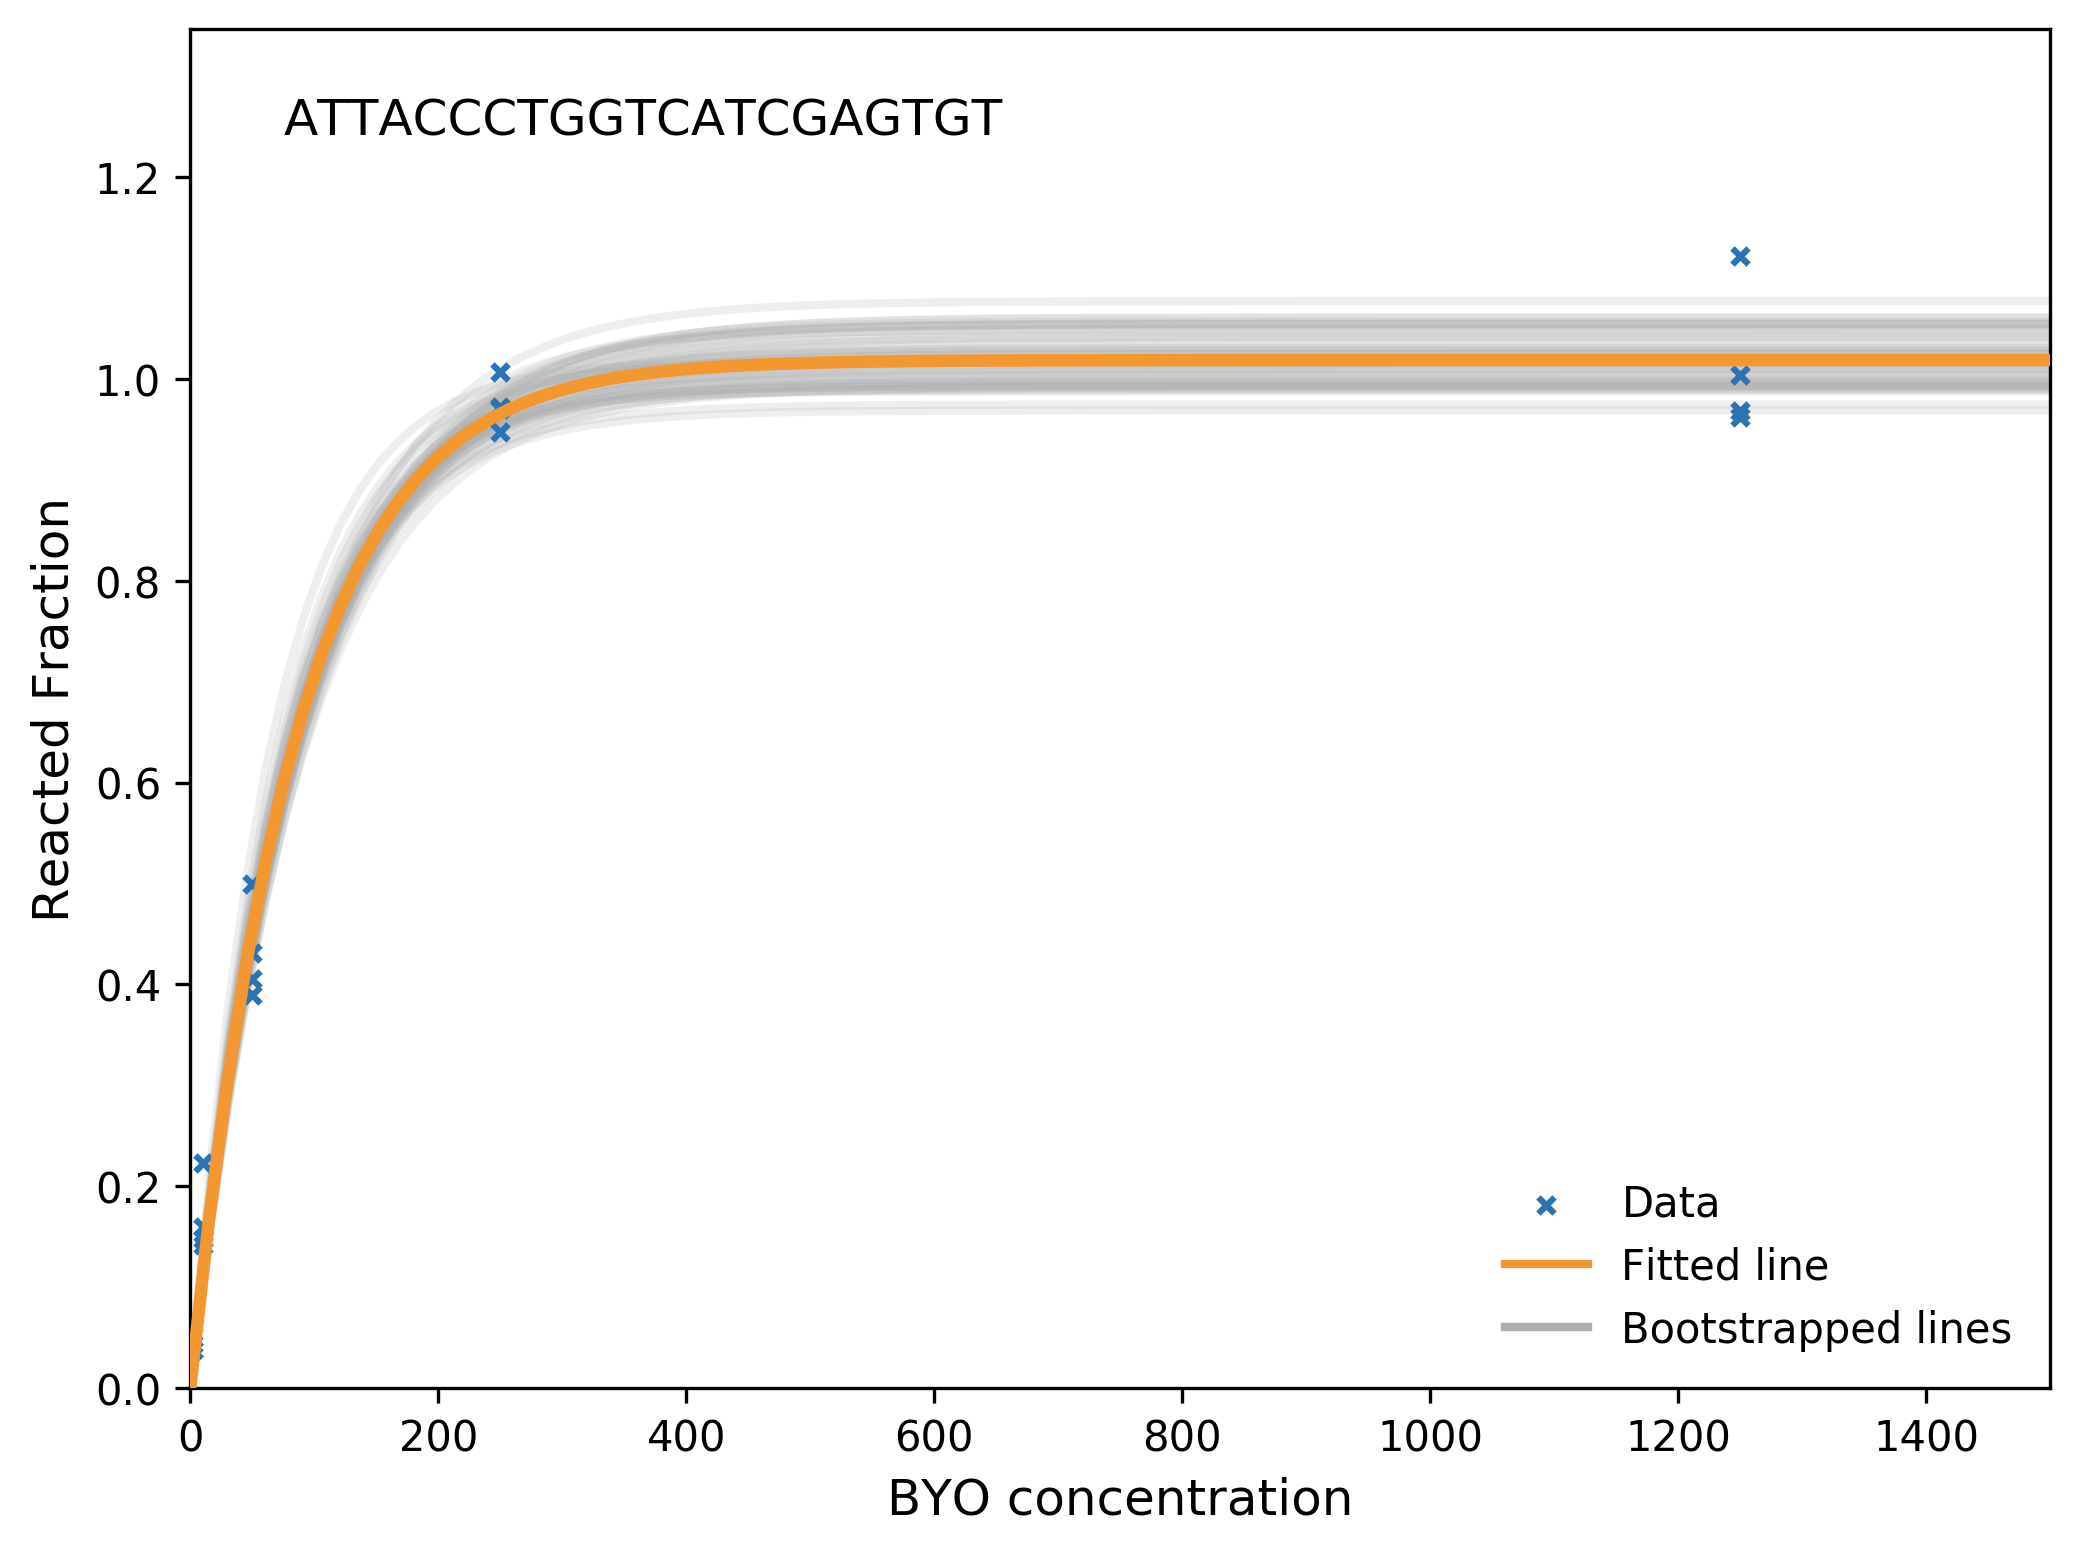

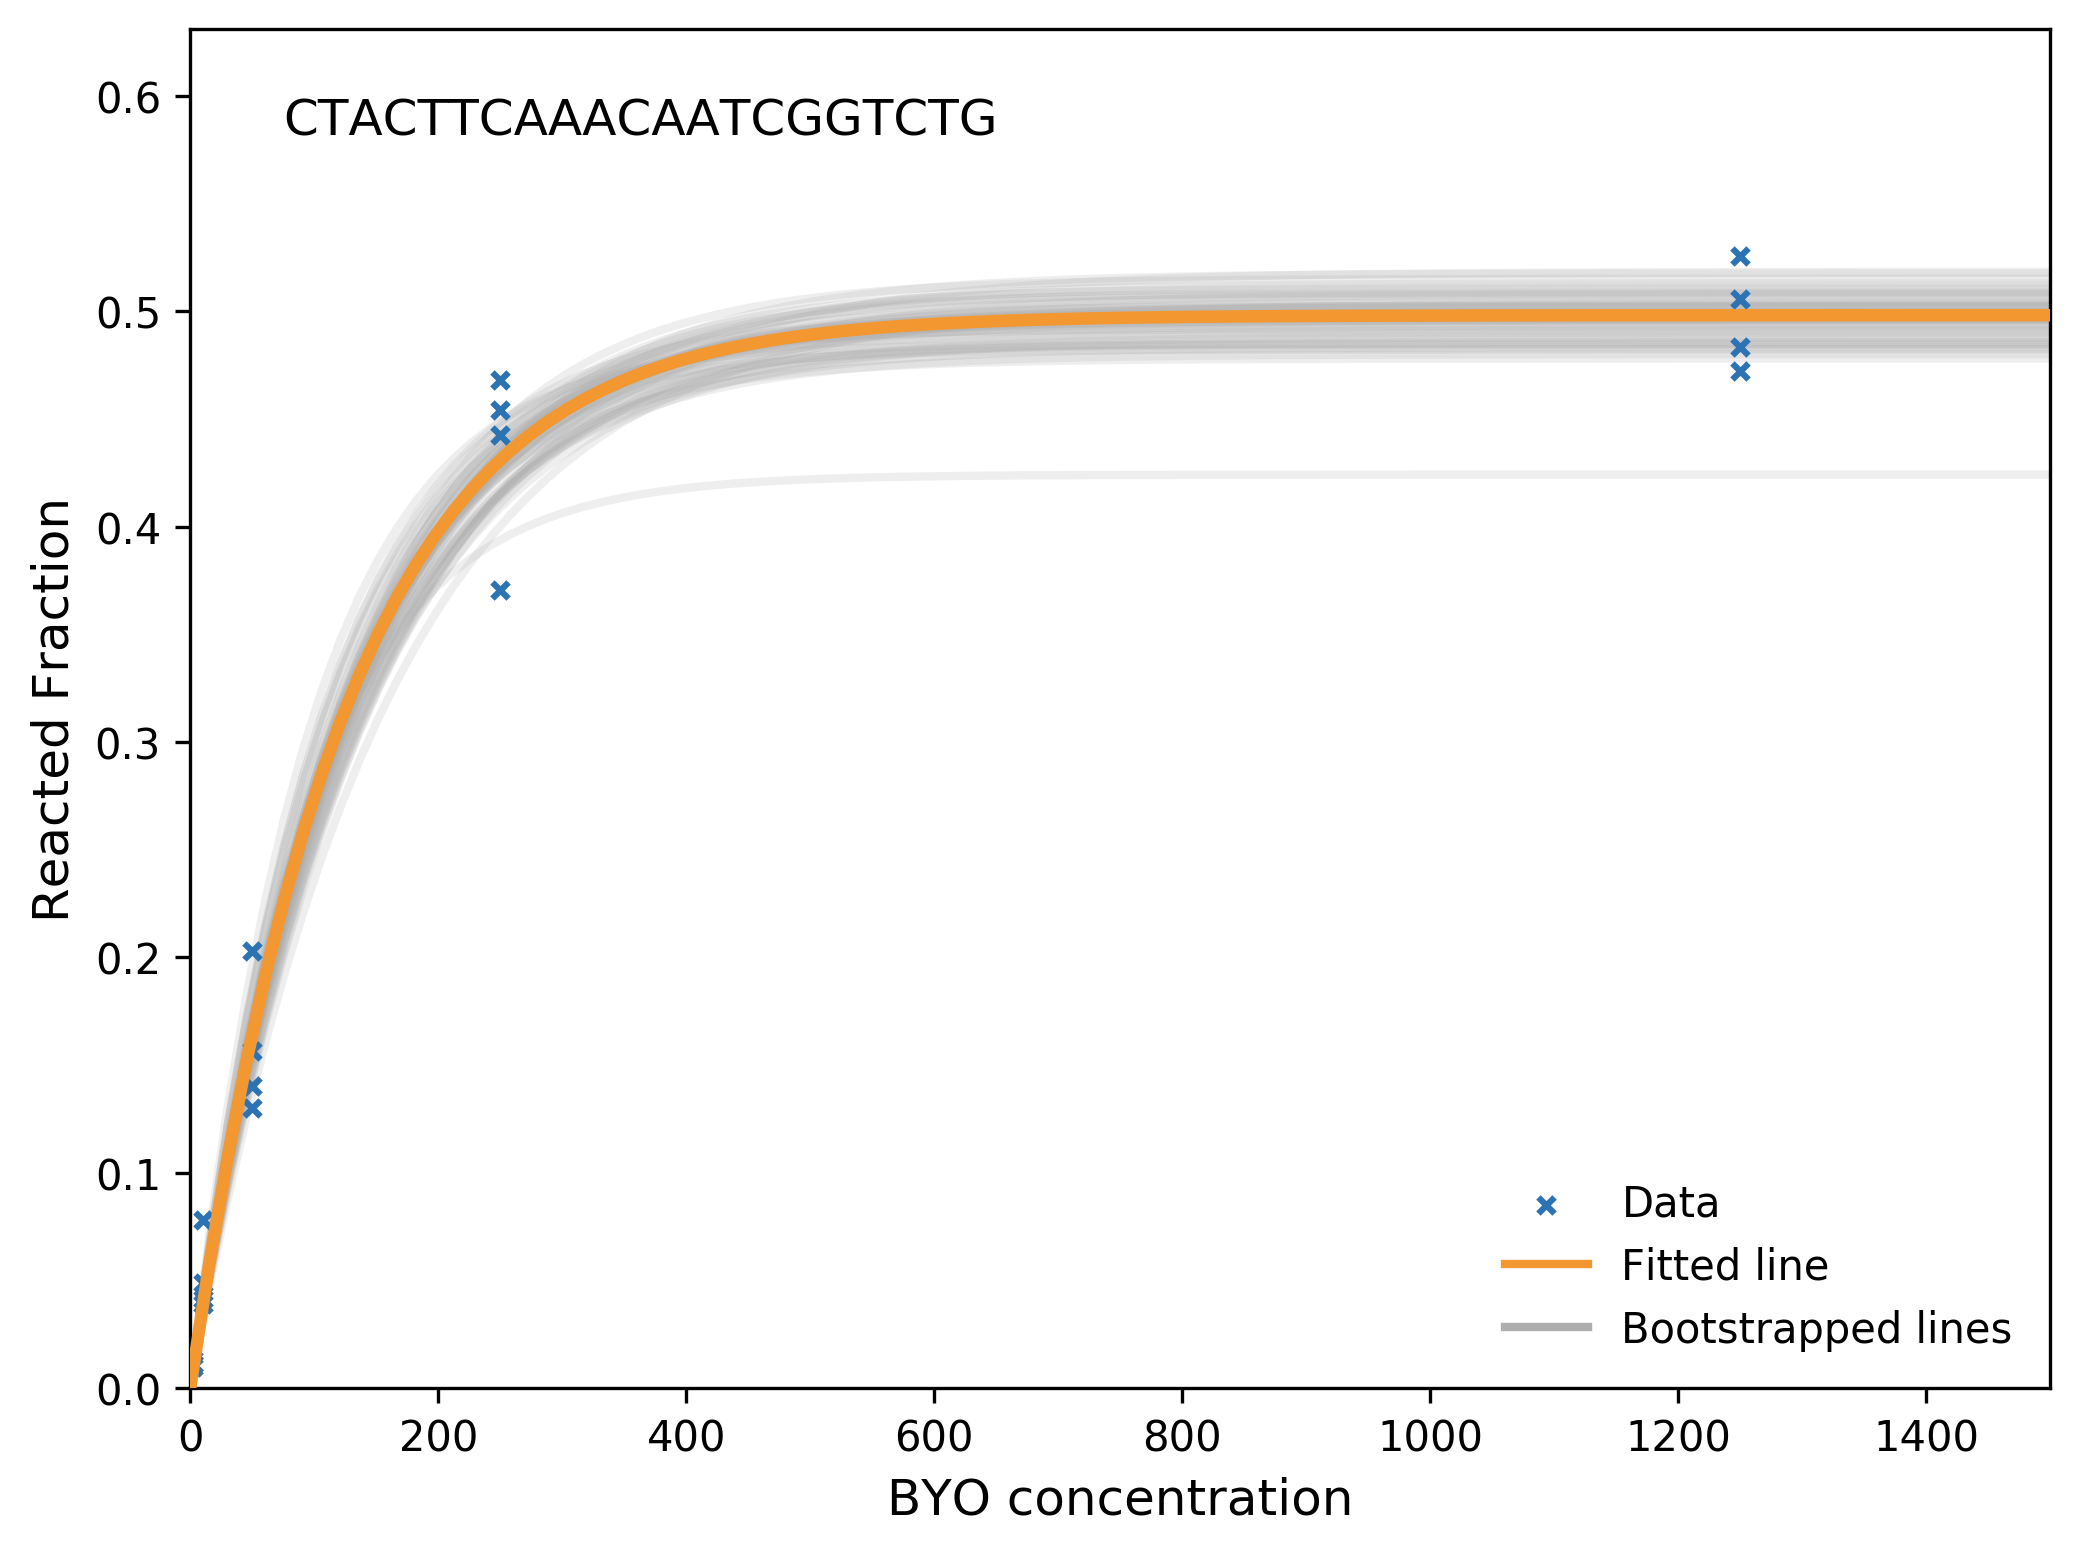

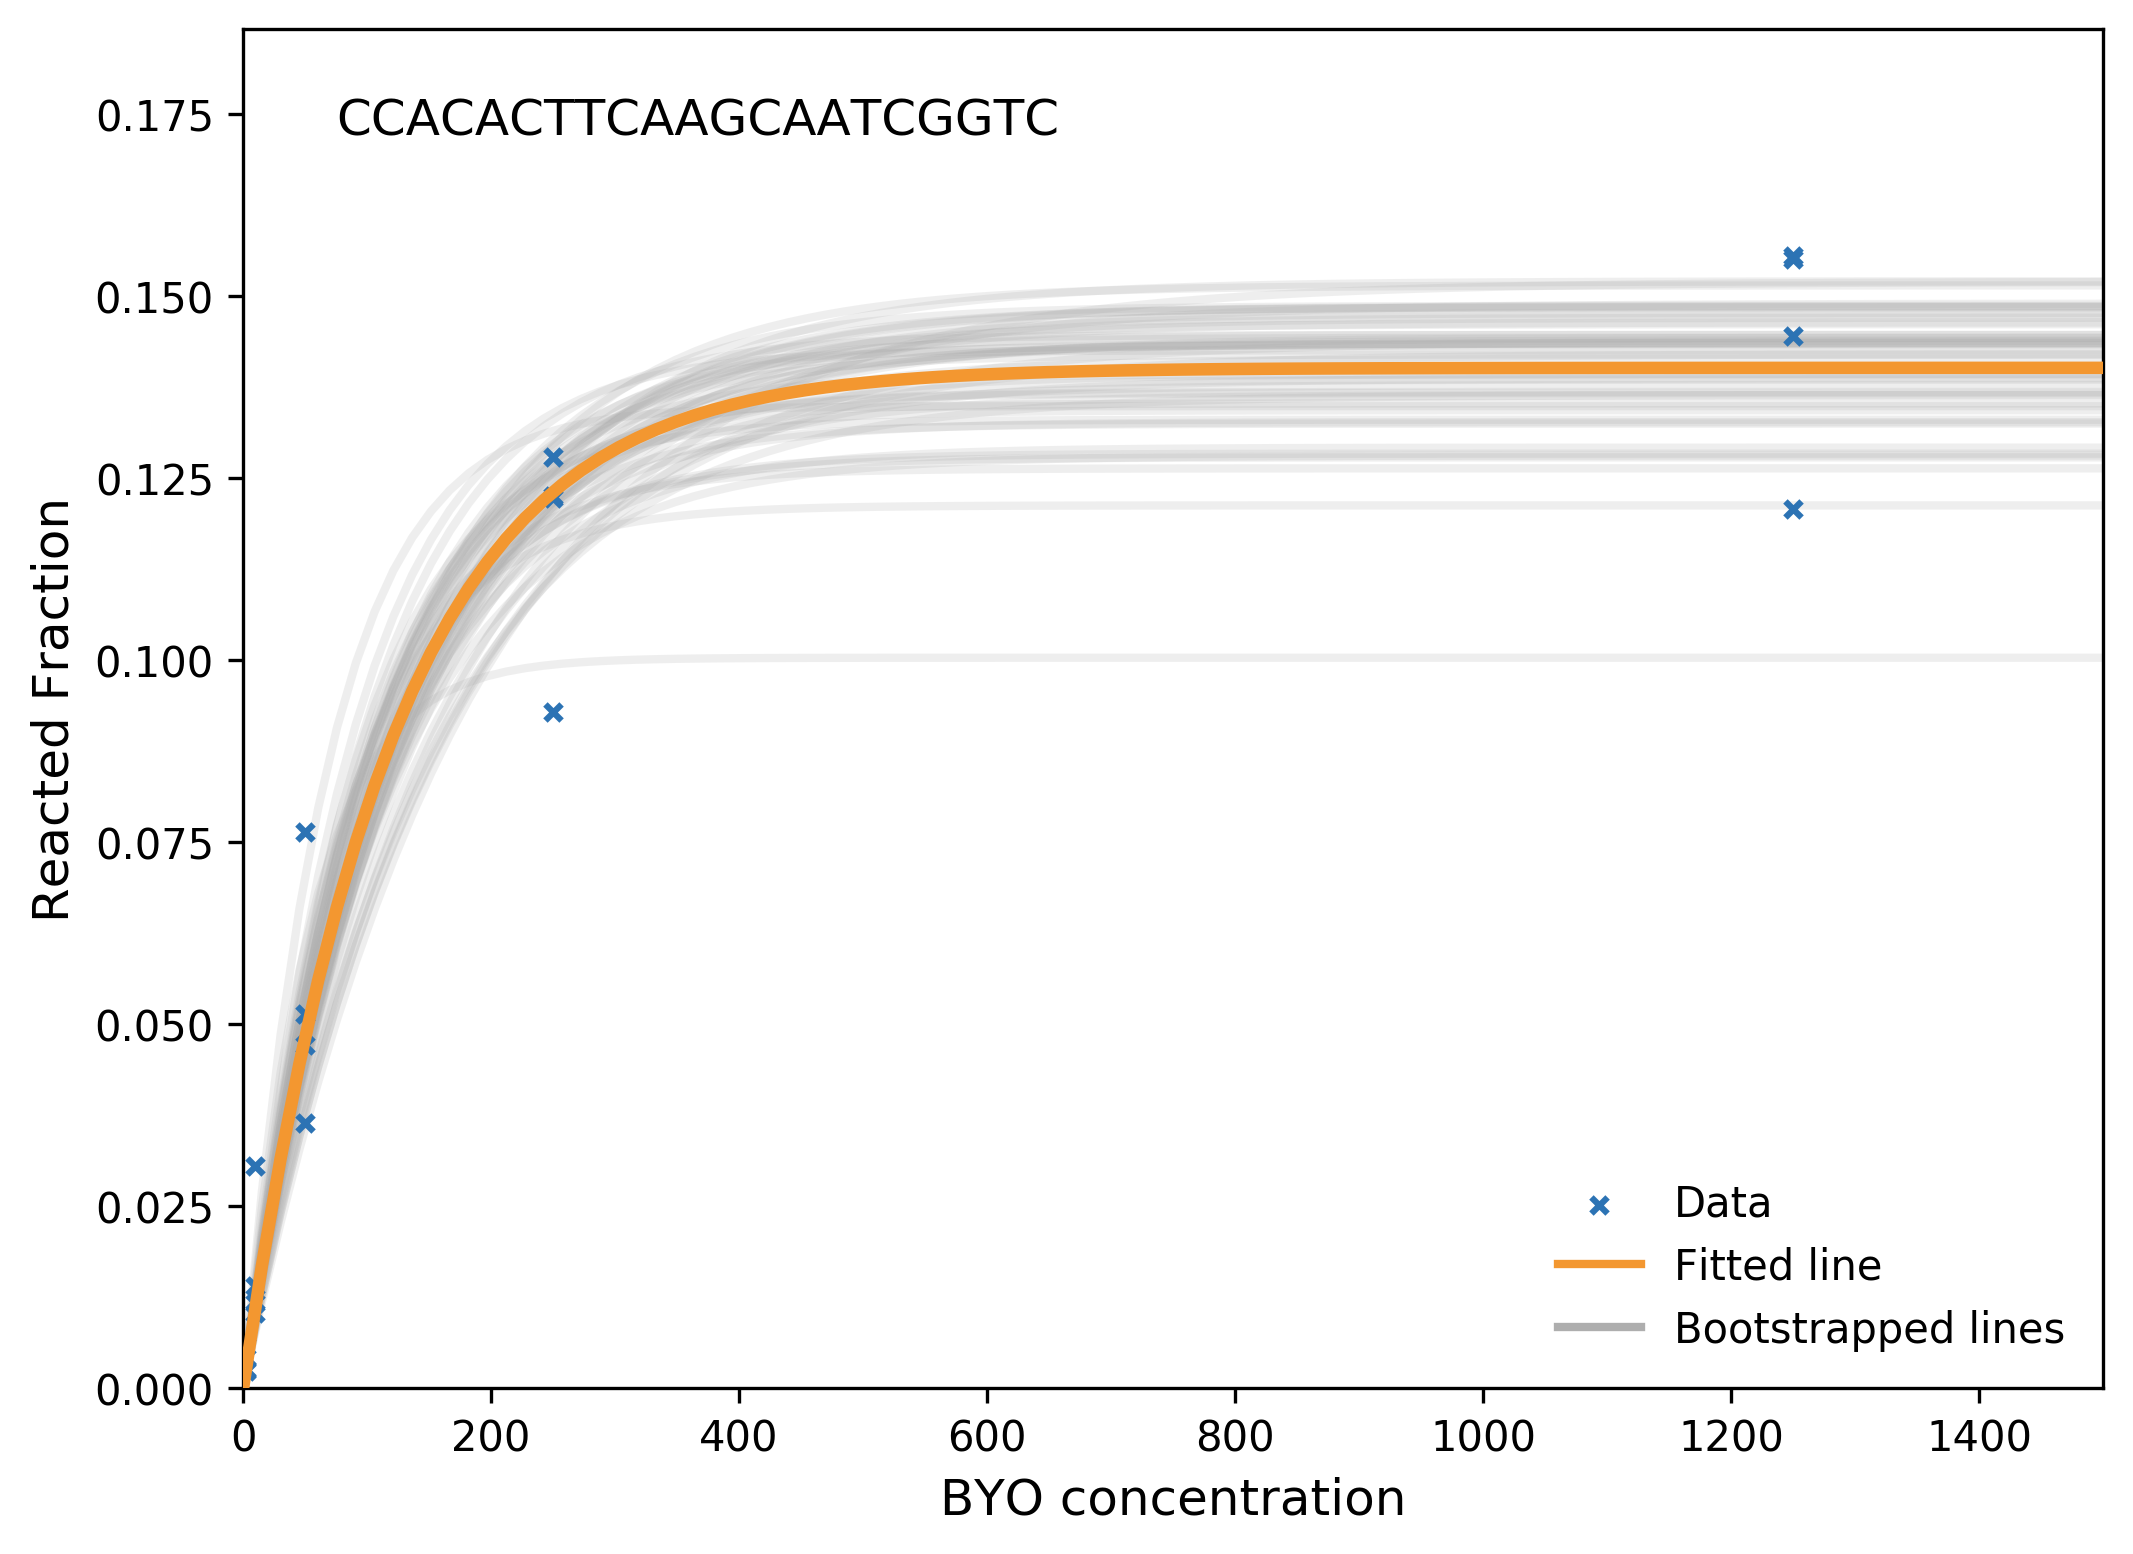

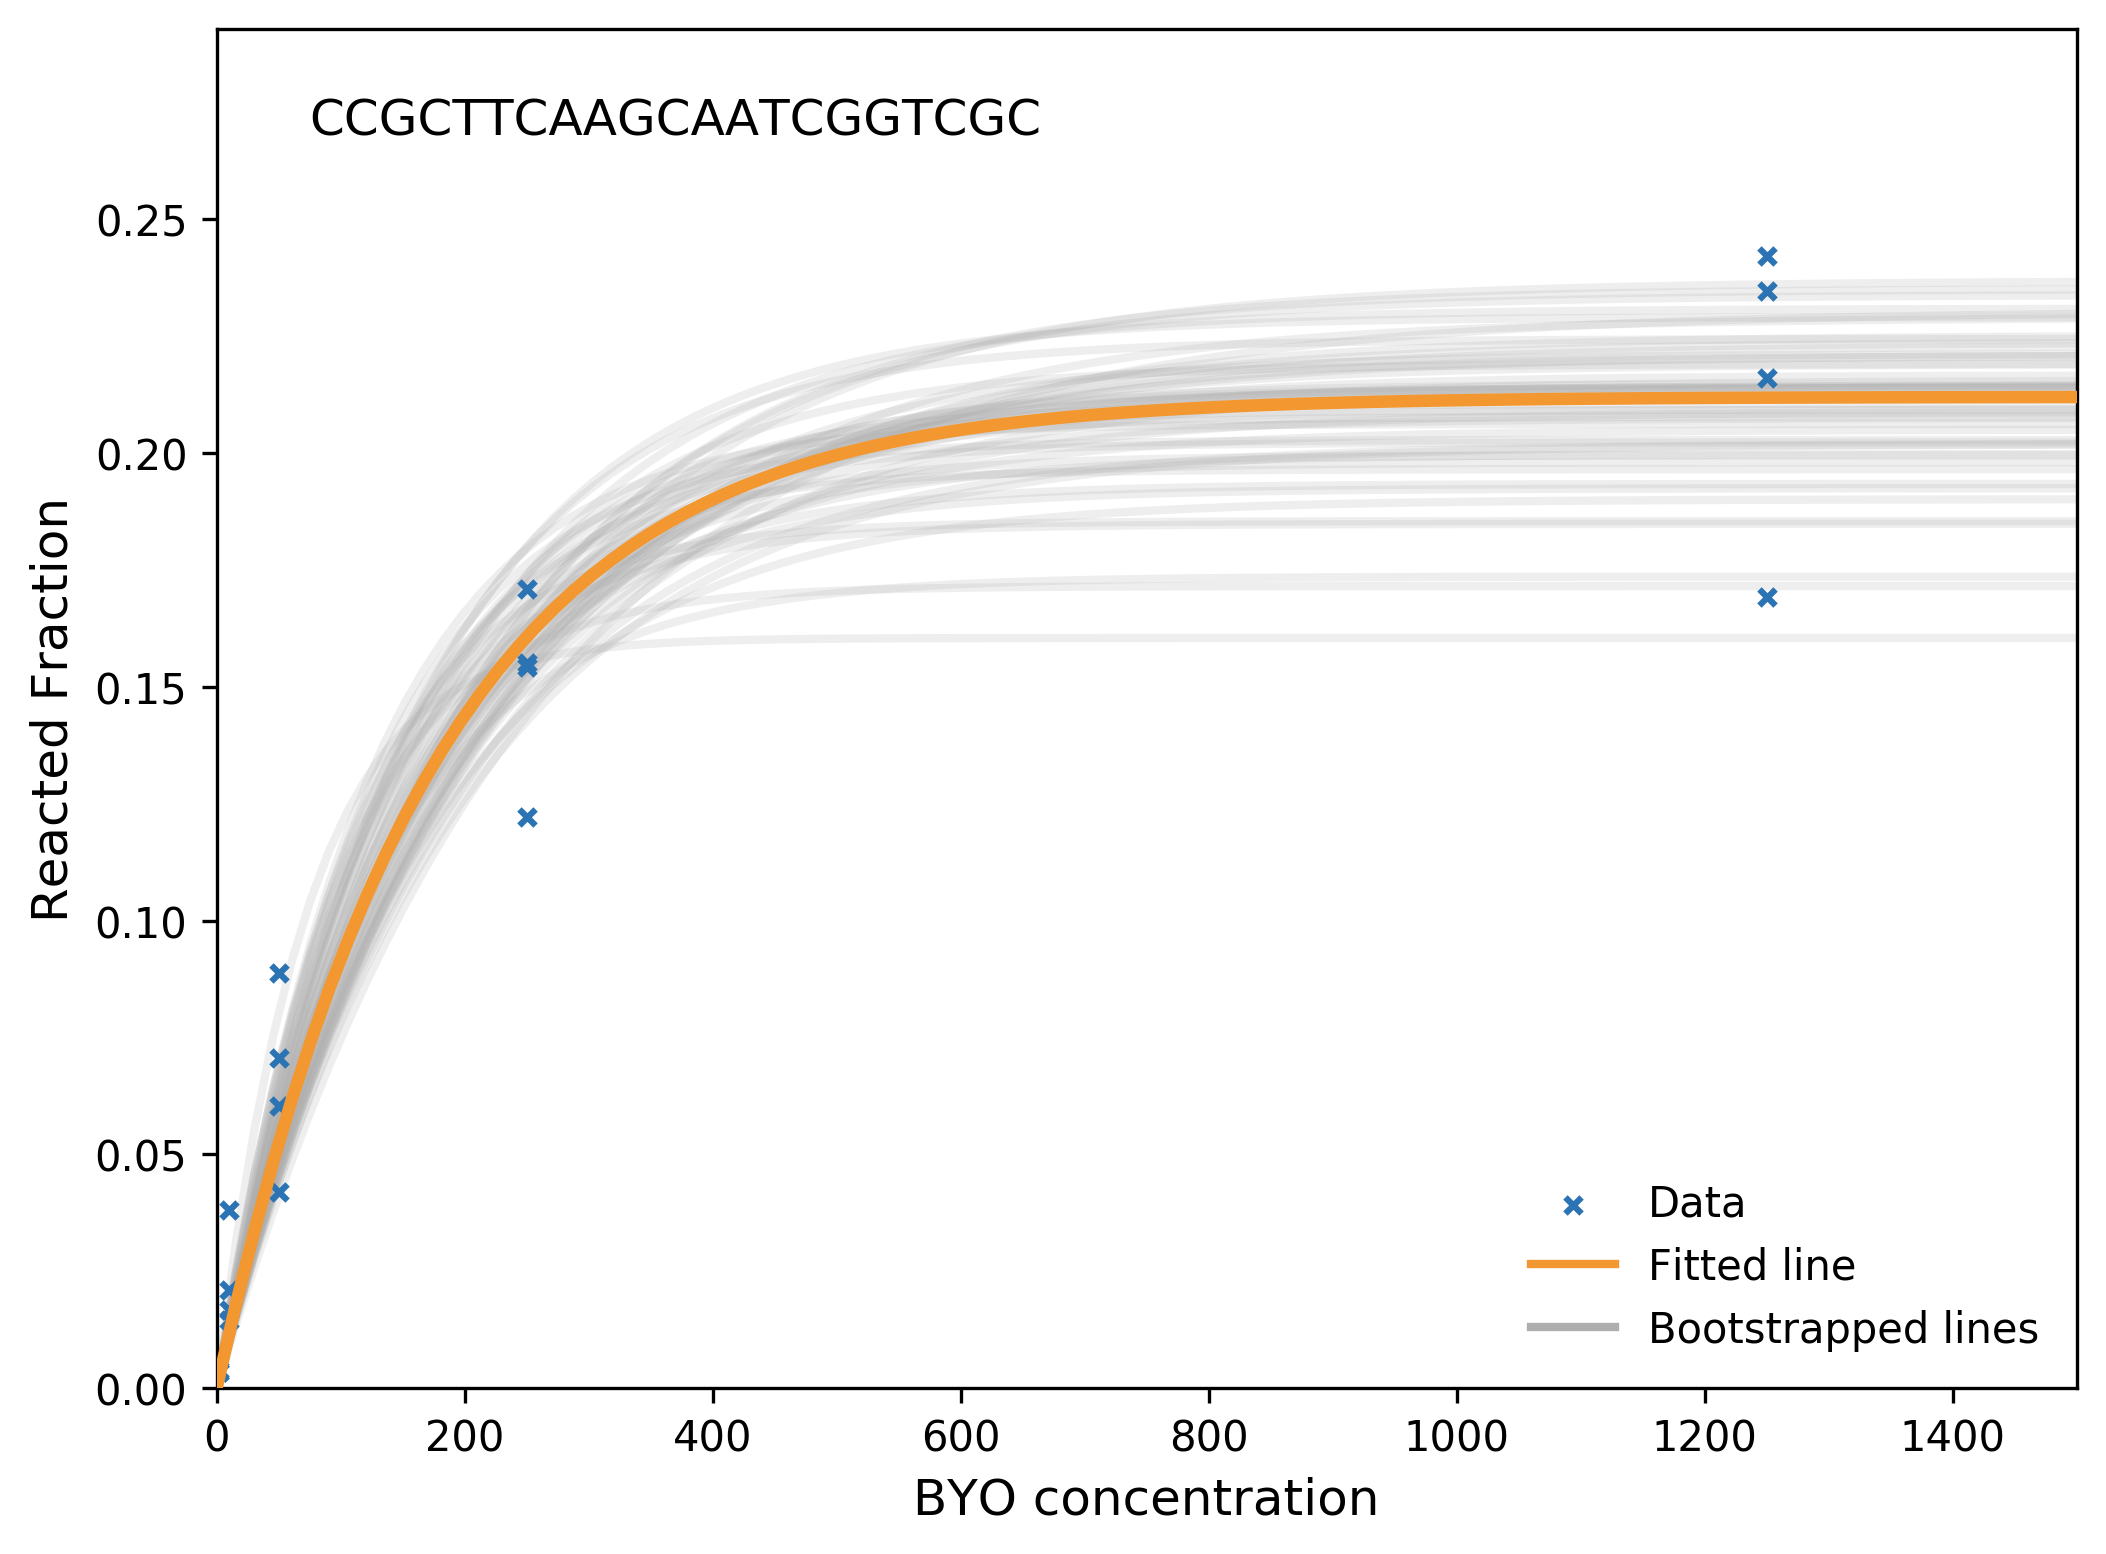

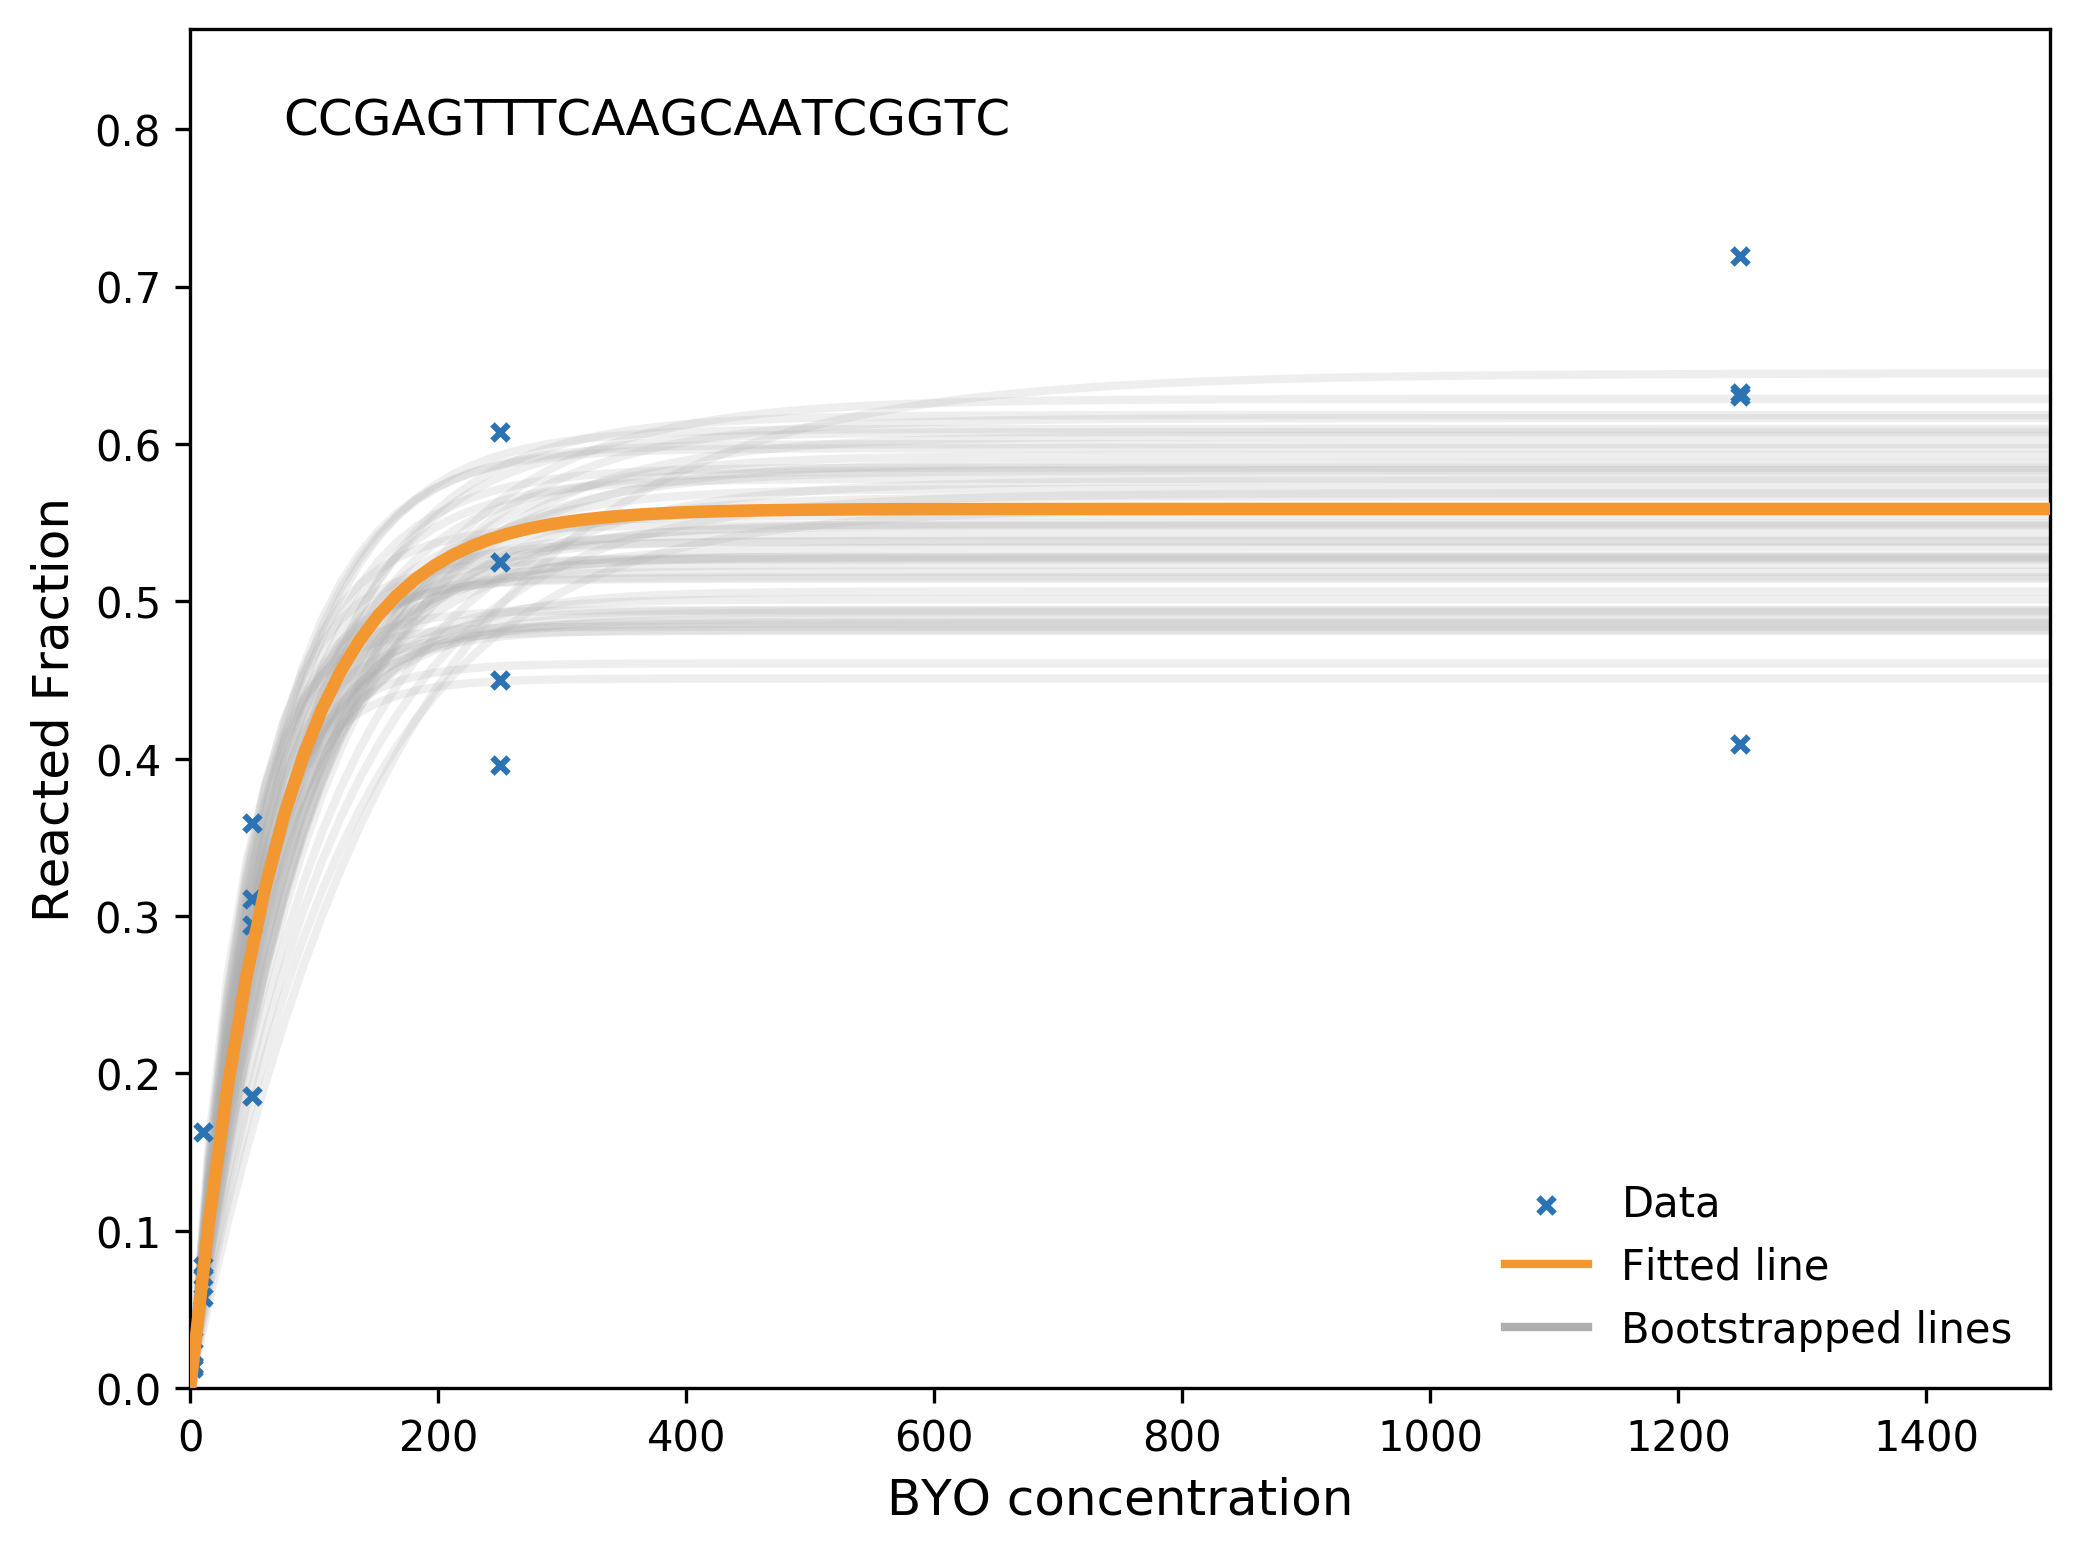

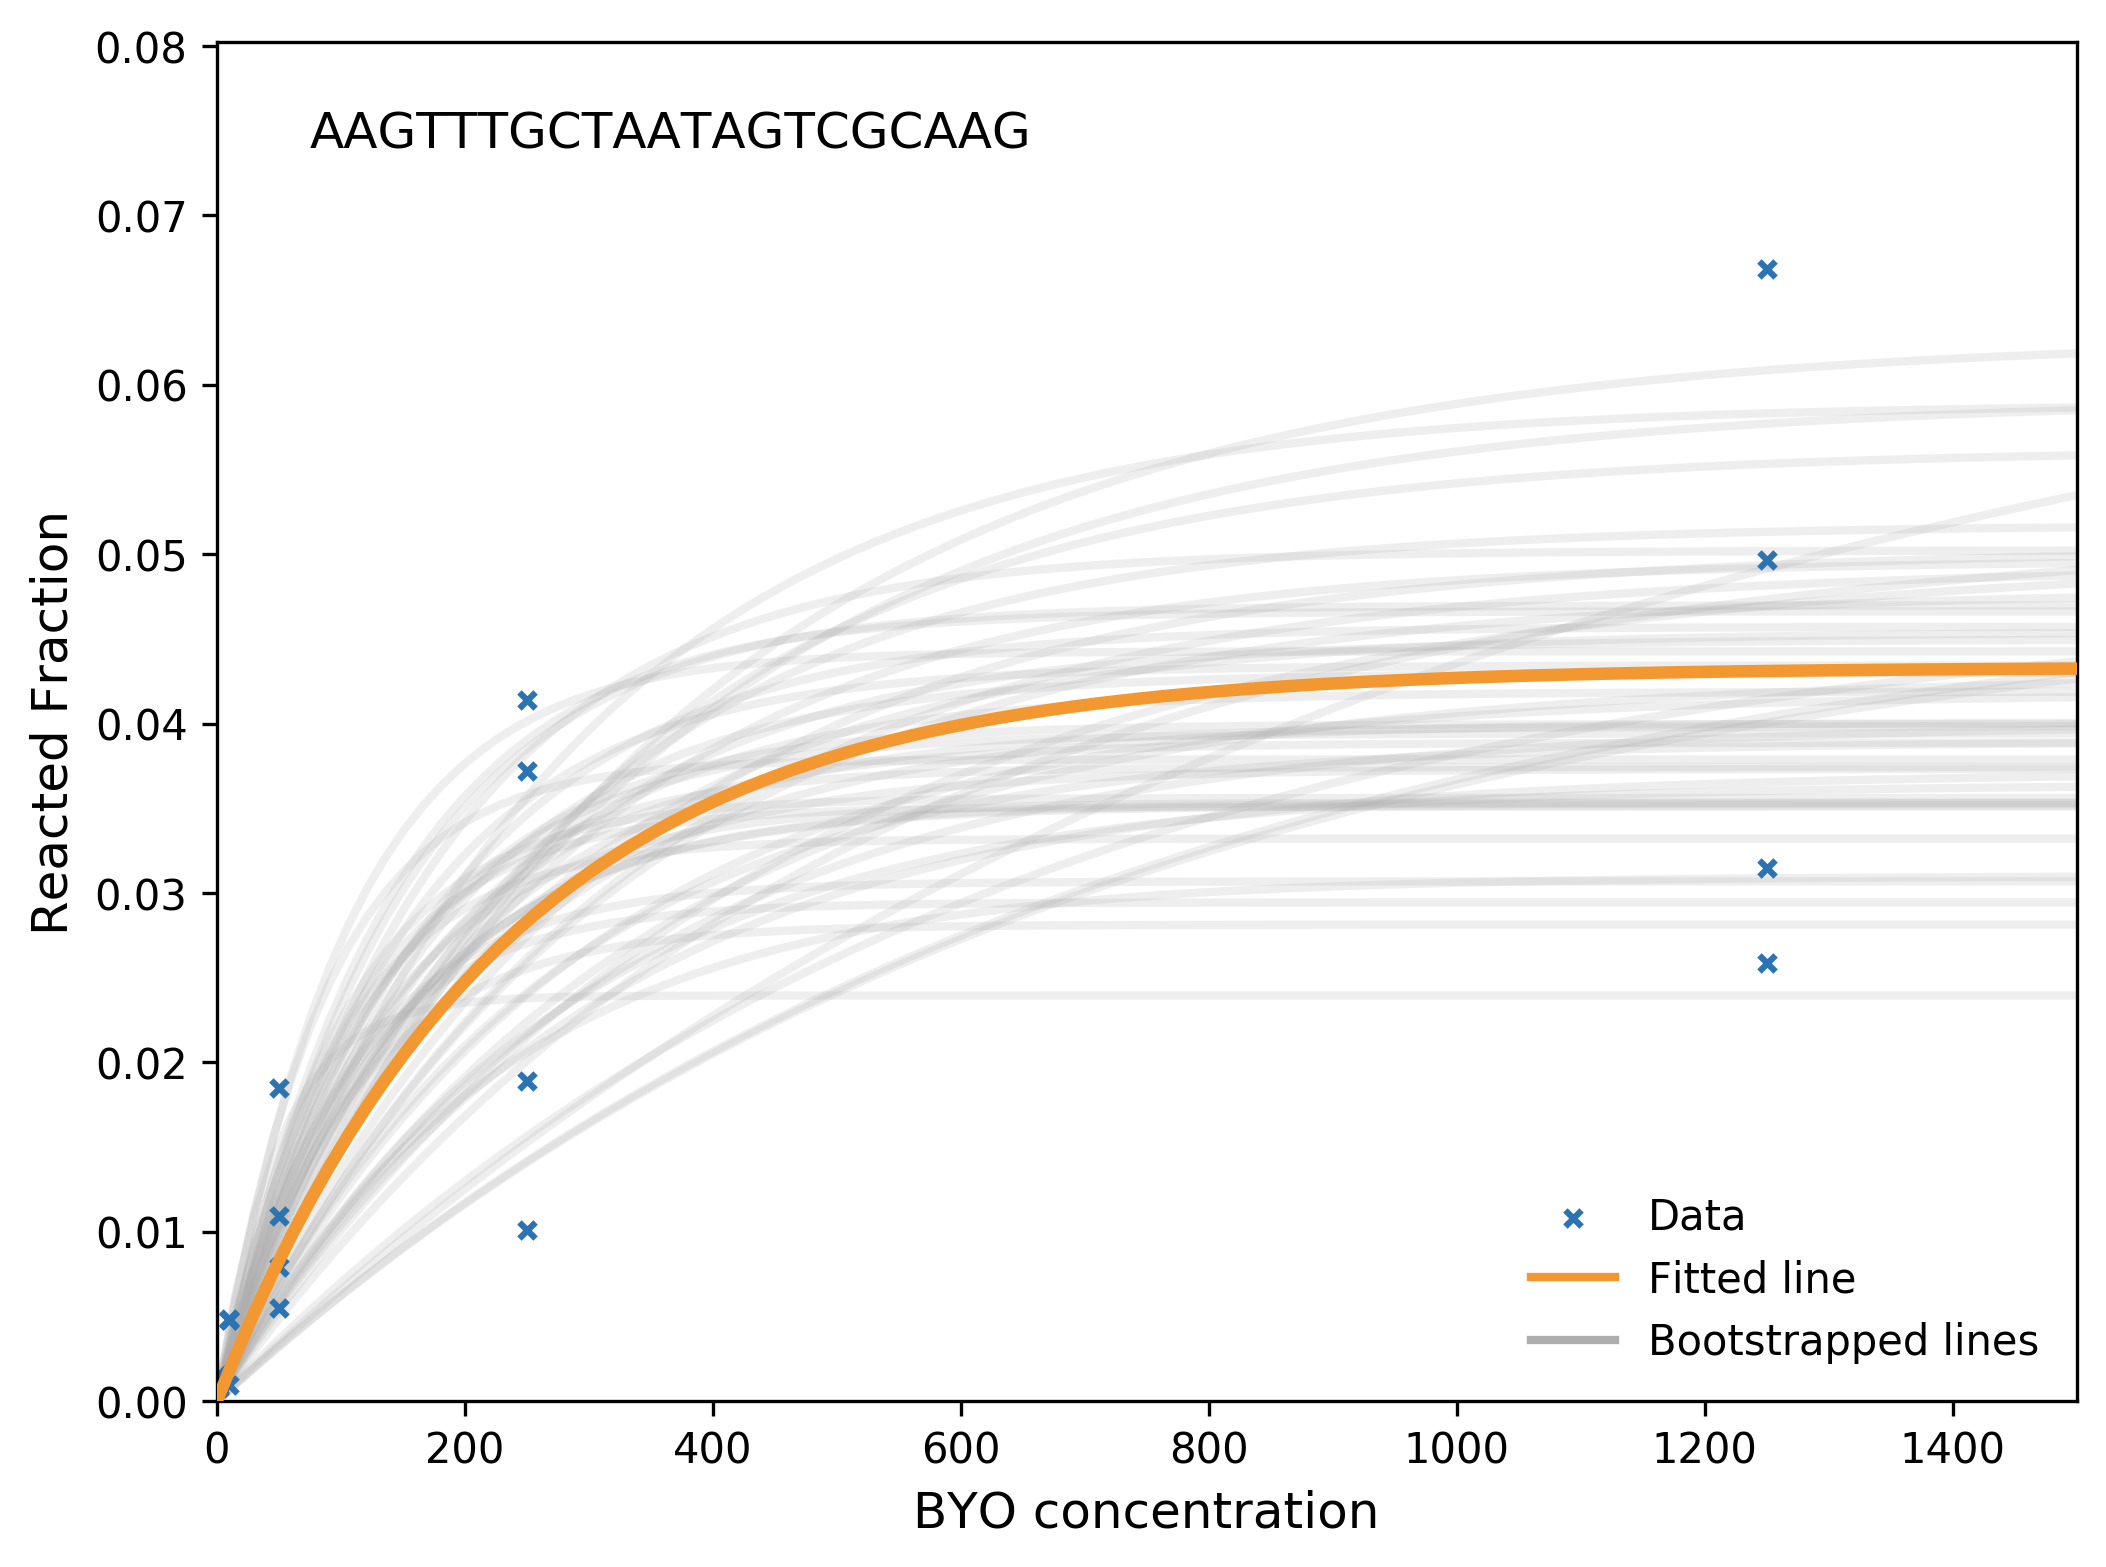

In [1057]:
k_seq.fitting.visualizer.fitting_curve_plot(fitter, seq_ix=selected_seq, axis_labels=('BYO concentration', 'Reacted Fraction'))

# fitting

In [1100]:
isinstance(fitter, BatchFitting)

True

/home/yuning/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


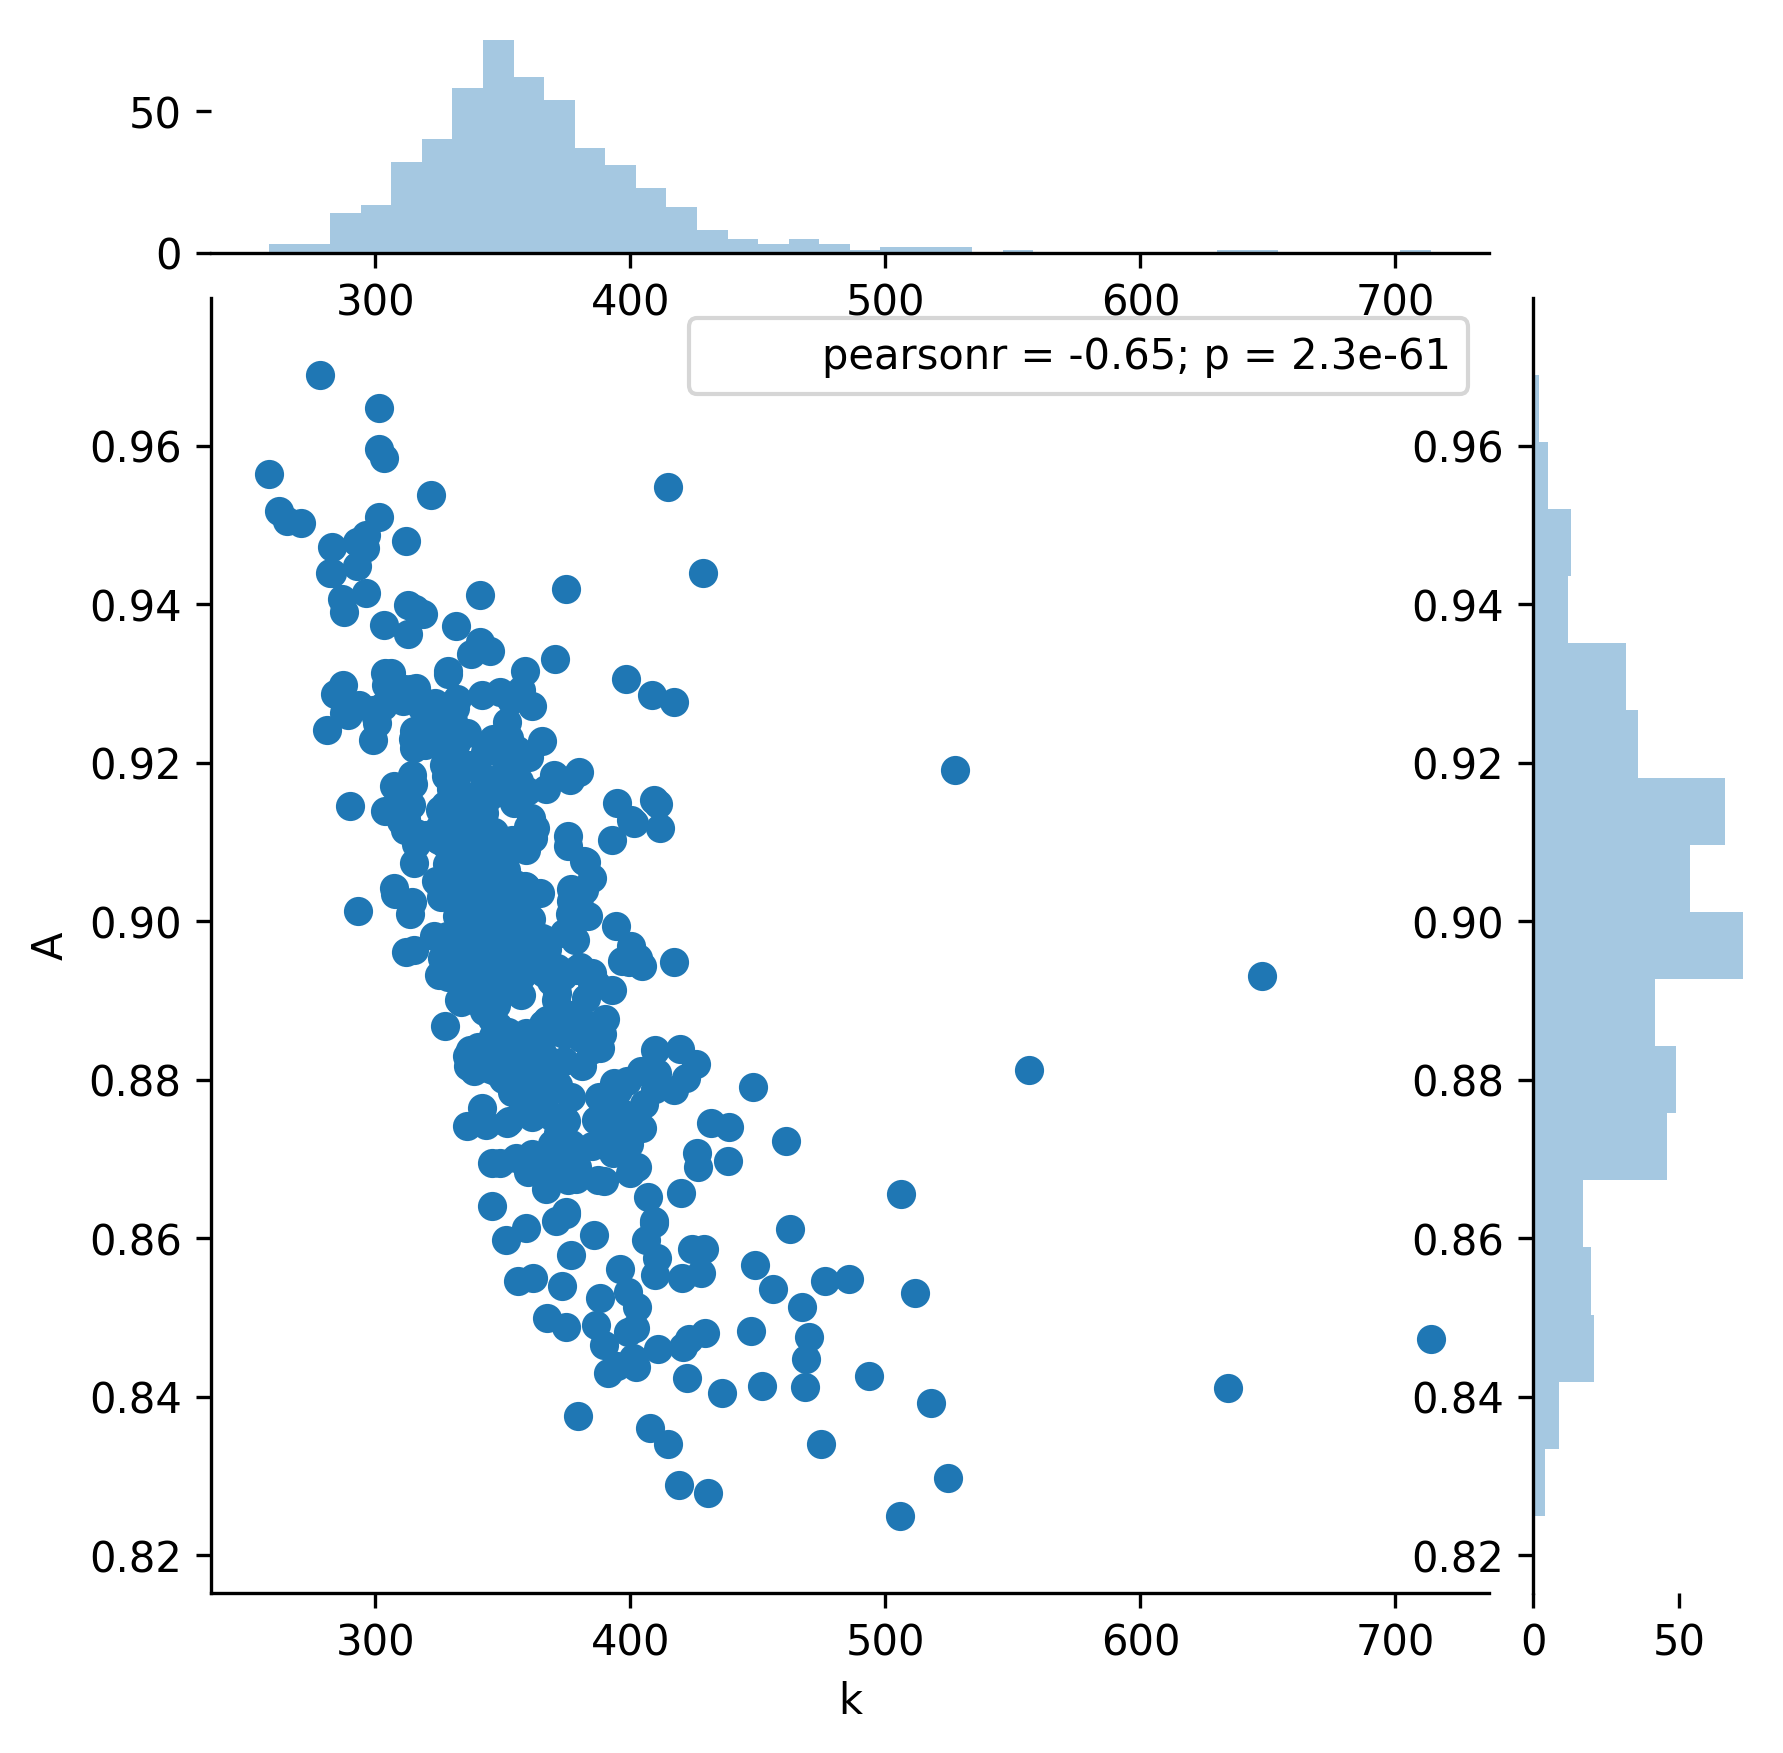

In [1133]:
k_seq.fitting.visualizer.bootstrap_params_dist_plot(fitting_res=fitter, model=bfo_model, seq_ix='ATTACCCTGGTCATCGAGTGA')

# Fitting results analysis

In [13]:
fittingRes = util.load_pickle(dirc='/mnt/storage/projects/k-seq/working/bfo_evan/fittingRes_bfo_deep_new_alpha.pkl')

fittingRes_bfo_deep_new_alpha.pkl:
Fitting results of BFO data with new degradation coefficient alpha, including the CI 95 estimation using 1000 bootstrap, on Pod (15 cores)


In [1127]:
isinstance(fitter, BatchFitting)

True

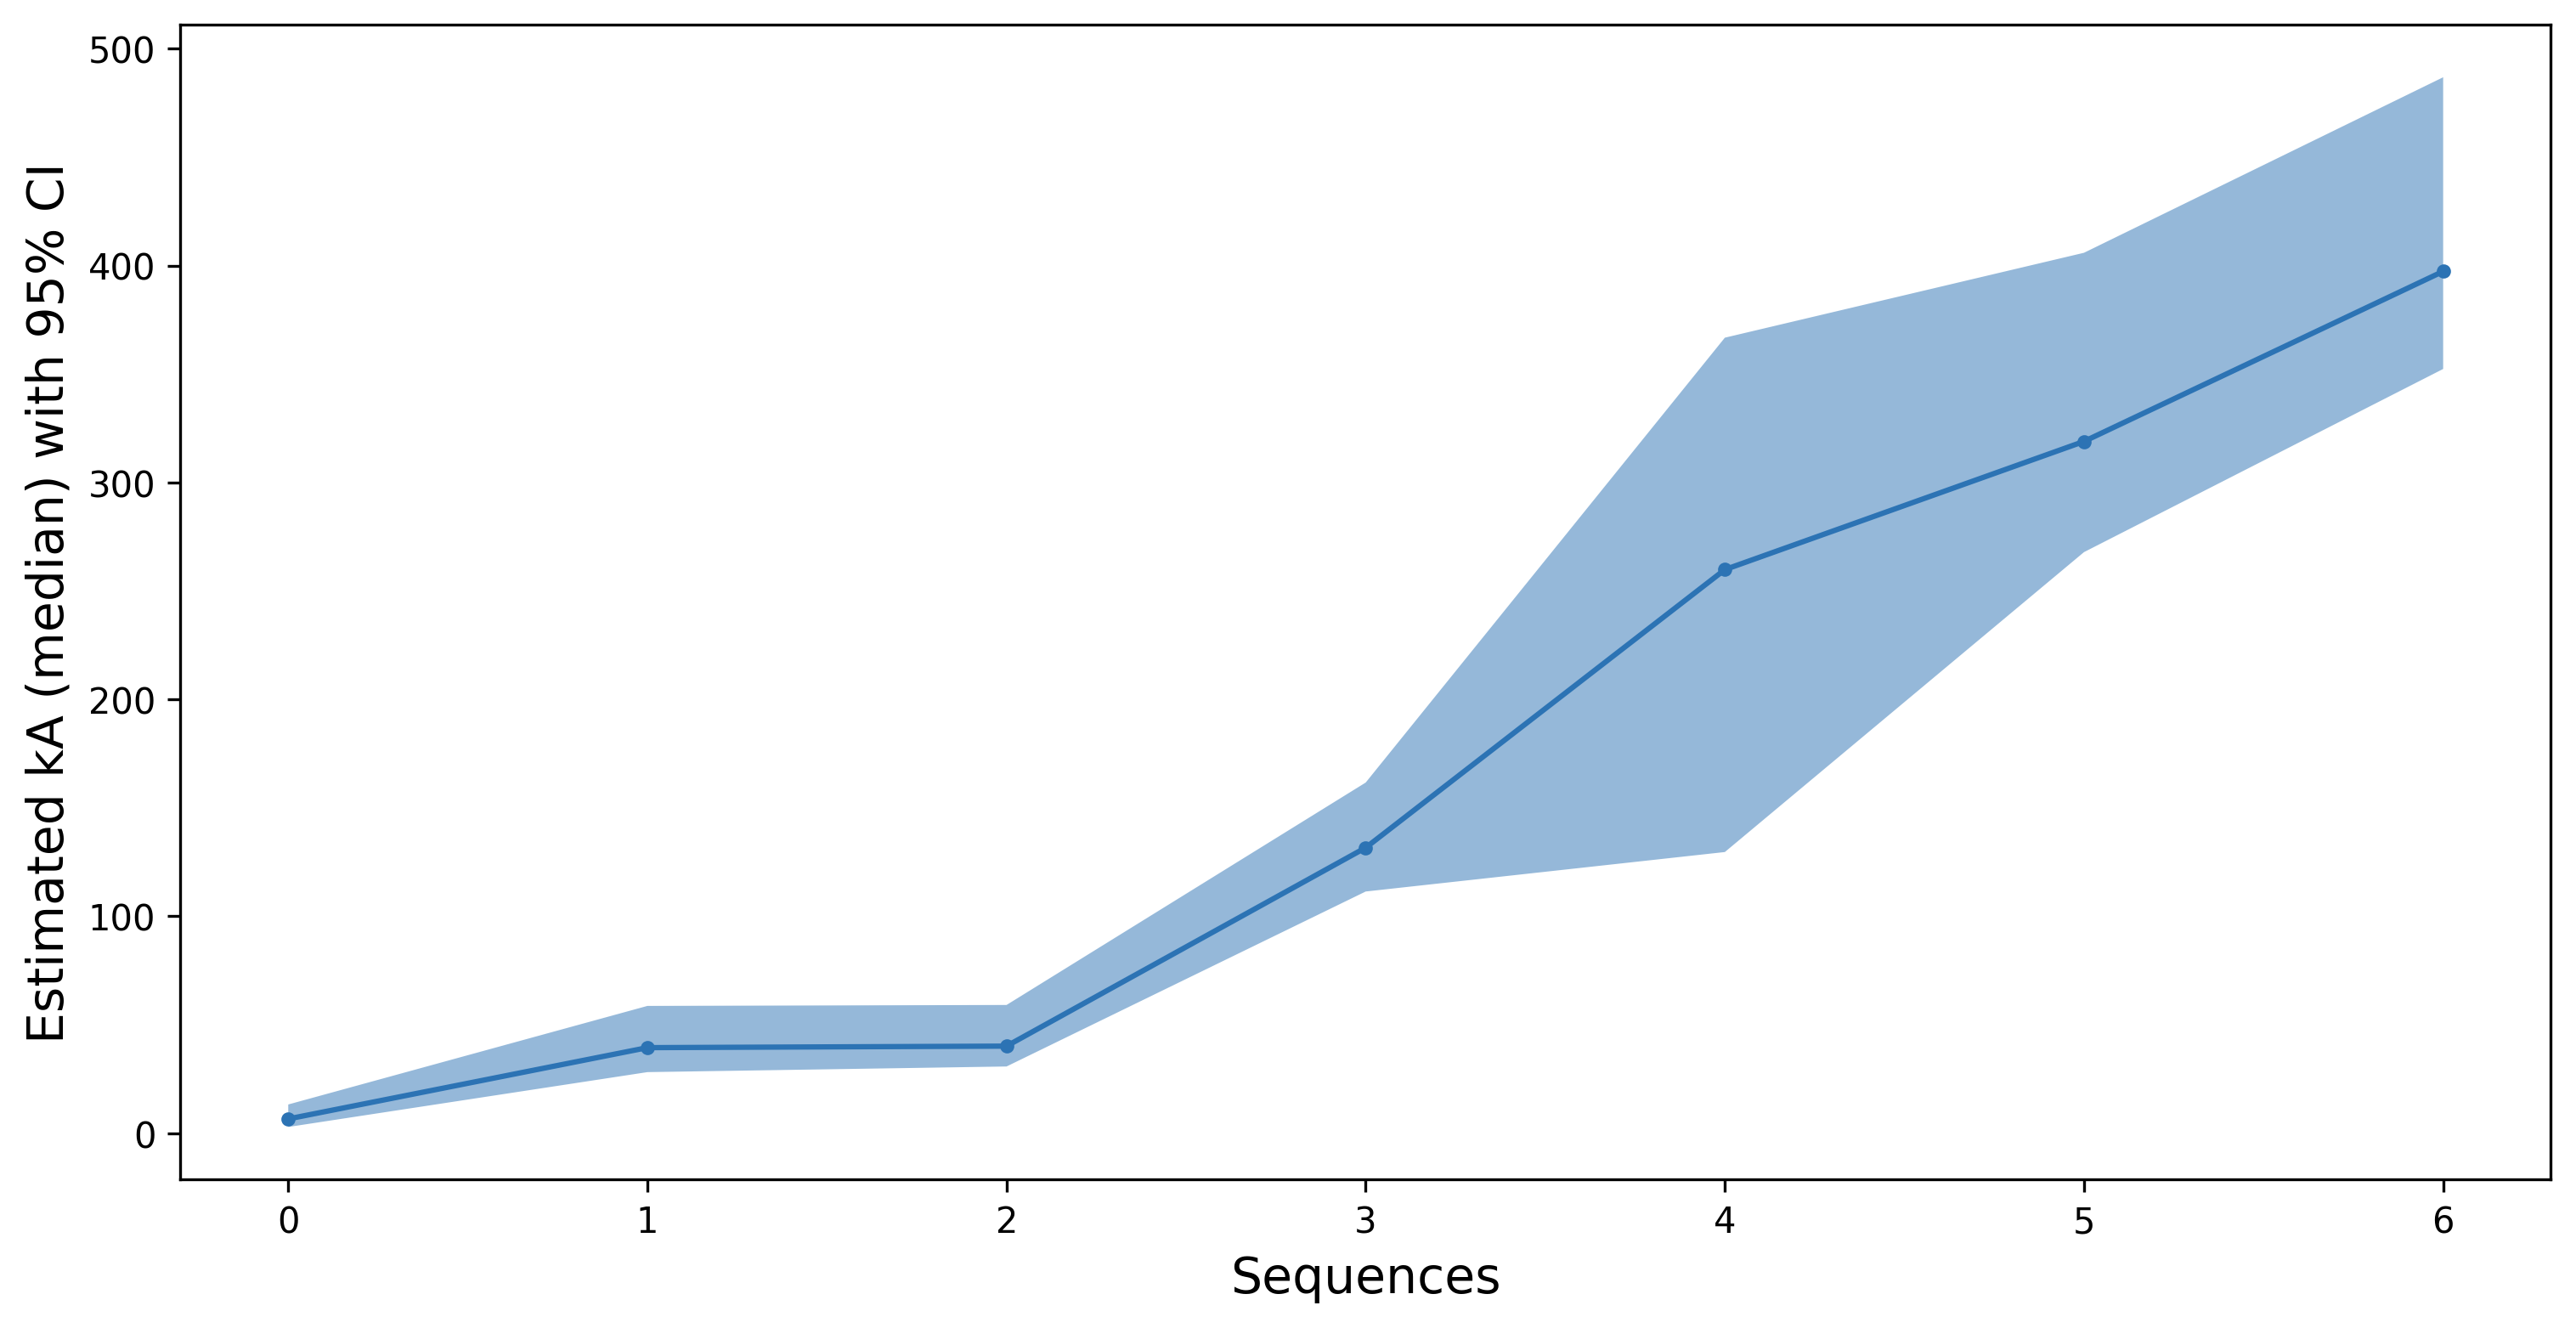

In [1144]:
k_seq.fitting.visualizer.param_value_plot(fitting_res=fitter, param='kA')

In [1124]:
np.linspace(0, 9, 10)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [1110]:
param = 'k'
cols = [param + post_fix for post_fix in ['_point_est', '_mean', '_std', '_median', '_2.5', '_97.5']]
rows = ['ATTACCCTGGTCATCGAGTGA', 'CCACACTTCAAGCAATCGGTC']
fitter.summary[cols].loc[rows]

k_point_est      k_mean      k_std    k_median  \
ATTACCCTGGTCATCGAGTGA   354.568493  362.729132  47.872404  356.507676   
CCACACTTCAAGCAATCGGTC   277.718317  290.352331  70.552885  278.055665   

                            k_2.5      k_97.5  
ATTACCCTGGTCATCGAGTGA  284.064332  472.548837  
CCACACTTCAAGCAATCGGTC  189.243952  454.025014

In [1114]:
fitter.summary.sort_values(by=)

A_point_est  k_point_est  kA_point_est    A_mean  \
ATTACCCTGGTCATCGAGTGA     0.897218   354.568493    318.125342  0.895600   
CCACACTTCAAGCAATCGGTC     0.140131   277.718317     38.917077  0.140163   

                          A_std     A_2.5  A_median    A_97.5      k_mean  \
ATTACCCTGGTCATCGAGTGA  0.027470  0.841311  0.897673  0.948000  362.729132   
CCACACTTCAAGCAATCGGTC  0.007954  0.121864  0.140722  0.153356  290.352331   

                           k_std       k_2.5    k_median      k_97.5  \
ATTACCCTGGTCATCGAGTGA  47.872404  284.064332  356.507676  472.548837   
CCACACTTCAAGCAATCGGTC  70.552885  189.243952  278.055665  454.025014   

                          kA_mean     kA_std      kA_2.5   kA_median  \
ATTACCCTGGTCATCGAGTGA  323.984218  36.361688  266.782741  319.077095   
CCACACTTCAAGCAATCGGTC   40.299402   8.129140   28.004023   39.126938   

                          kA_97.5  
ATTACCCTGGTCATCGAGTGA  403.801933  
CCACACTTCAAGCAATCGGTC   57.630913

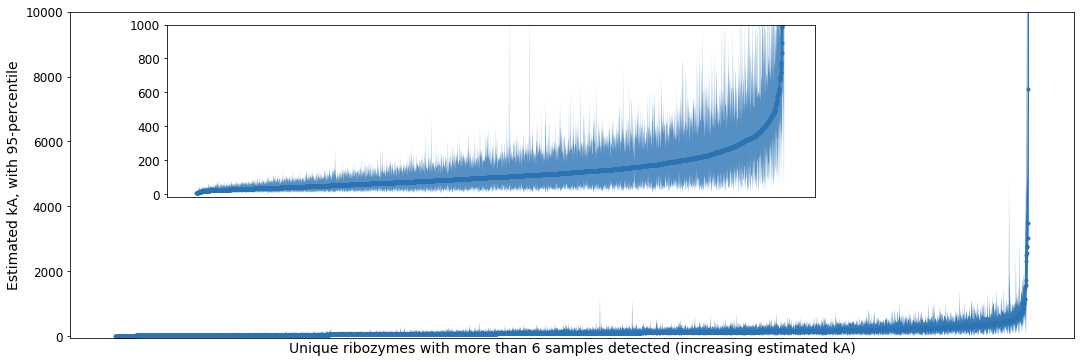

In [183]:
def filter_fn(res, percentile=True):
    if percentile:
        return [res['ci95'][2][3], res['ci95'][2][0], res['ci95'][2][2]]
    else:
        return [res['params'][2], res['params'][2]-2*res['stdevs'][2], res['params'][2]+2*res['stdevs'][2]]


def value_plot(surveyRes):
    import matplotlib.pyplot as plt
    import plot
    
    lowest = 0.01
    highest = 10
    
    fig = plt.figure(figsize=[18,6])
    ax = fig.add_subplot(111)
    ax.plot([i for i in range(len(surveyRes))], [res[0] for res in surveyRes], '.-', color='#2C73B4')
    ax.fill_between([i for i in range(len(surveyRes))],
                    y1=[res[1] for res in surveyRes],
                    y2=[res[2] for res in surveyRes],
                    alpha=0.95, facecolor='#2C73B4')
    plot.set_ticks_size(ax)
    ax.set_ylim([-50, 10000])
    ax.set_ylabel('Estimated kA, with 95-percentile', fontsize=14)
    ax.set_xticks([])
    ax.set_xlabel('Unique ribozymes with more than 6 samples detected (increasing estimated kA)', fontsize=14)
    axInset = fig.add_axes([0.2, 0.45, 0.5, 0.4])
    axInset.plot([i for i in range(len(surveyRes))], [res[0] for res in surveyRes], '.-', color='#2C73B4')
    axInset.fill_between([i for i in range(len(surveyRes))],
                    y1=[res[1] for res in surveyRes],
                    y2=[res[2] for res in surveyRes],
                    alpha=0.80, facecolor='#2C73B4')
    plot.set_ticks_size(axInset)
    axInset.set_ylim([-20, 1000])
    axInset.set_xticks([])
    
    # ax.set_xlim([25600,25750])
    # fig.savefig('/home/yuning/Work/ribozyme_pred/fig/ci_est/bto_res_values_larg6_normality.png', dpi=300)
    plt.show()

surveyRes = []
# Only survey ribozymes at least detected 6 times and the CI can be estimated, return prediction and CI
for res in fittingRes:
    if np.sum(~np.isnan(res['kSeqFmol'])) >= 6 and ~np.isnan(res['params'][2]):
        if ~np.isnan(res['ci95'][2][1]):
            surveyRes.append(filter_fn(res))
sort_fn = lambda a: (a[0])
surveyRes.sort(key=sort_fn)

value_plot(surveyRes)

In [185]:
len(surveyRes)

3039

In [175]:
def get_config(res):
    return np.sum(~np.isnan(res['kSeqFmol'].reshape(4, 5)), axis=0)

def sort_fn(res):
    if np.isnan(res['params'][2]):
        return (0, 0)
    elif len(res['ci95'])==1:
        return (1, 0)
    else:
        return (1, res['ci95'][2][1])


def export_csv(fittingRes, dirc):
    fittingRes.sort(key=sort_fn, reverse=True)
    with open(dirc, 'w') as output:
        output.write('seq,inputCountMedian,config,kAEstimate,CIEstimate,k,A,kA,kA2.5,kA50,kA97.5,kAMean,k2.5,k50,k97.5,kMean,A2.5,A50,A97.5,AMean\n')
        for res in fittingRes:
            output.write('%s,%i,%s,' %(res['seq'], np.nanmedian(res['initRaw']), get_config(res)))
            if np.isnan(res['params'][2]):
                output.write('0,0,%s\n' %(','.join(['nan' for i in range(15)])))
            elif len(res['ci95'])==1:
                output.write('1,0,%f,%f,%f,%s\n' %(res['params'][0], res['params'][1], res['params'][2], ','.join(['nan' for i in range(12)])))
            else:
                output.write('1,1,%f,%f,%f,%s\n' %(res['params'][0], res['params'][1], res['params'][2],
                                                    ','.join(['%f'%i for i in list(res['ci95'][2]) + list(res['ci95'][0]) + list(res['ci95'][1])])))

export_csv(fittingRes, dirc='/mnt/storage/projects/ribozyme_predict/bfo/fittingRes.csv')

In [15]:
import pandas as pd

df = pd.read_csv('/mnt/storage/projects/ribozyme_predict/bfo/fittingRes.csv')

In [18]:
df.sort_values(by='inputCountMedian', ascending=False)

seq  inputCountMedian       config  kAEstimate  \
1949     CTACTTCAAACAATCGGTCTG            535826  [4 4 4 4 4]           1   
2248     AAAAACAAAAACAAAAACAAA            424144  [4 4 4 4 4]           1   
282      ATTACCCTGGTCATCGAGTGA            166719  [4 4 4 4 4]           1   
197      ATTACCCTGGTCATCGAGTGT            119288  [4 4 4 4 4]           1   
4470     CTCTTCAAACAATCGGTCTTC             73892  [4 4 4 4 4]           1   
3859     ATTCACCTAGGTCATCGGGTG             63062  [4 4 4 4 4]           1   
1025    ATTCACCTAGGTCATCGGGTGT             62453  [4 4 4 4 4]           1   
4493     CCACACTTCAAGCAATCGGTC             50627  [4 4 4 4 4]           1   
1738     CCGCTTCAAACAATCGGTTTG             33567  [4 4 4 4 4]           1   
1028    ATTCACCTAGGTCATCGAGTGT             18526  [4 4 4 4 4]           1   
4726      CACACTTCAAGCAATCGGTC             18498  [4 4 4 4 4]           1   
4362     ACCCACTTCAAACAATCGGTC             17398  [4 4 4 4 4]           1   
3834     CTGCTTCAAACAATCGGTGTG              9298  [4 4 4 4 4]           1   
3374      TACTTCAAACAATCGGTCTG              8536  [4 4 4 4 4]           1   
1299    ATTCACCTAGGTCATCGAGTGA              7976  [4 4 4 4 4]           1   
3232    CTACTTCAAACAATCGGTCTTC              7091  [4 4 4 4 4]           1   
4393     CTGTTTCAAACAATCGGTCTC              5953  [4 4 4 4 4]           1   
394    ATTCACCTAGGTCATCGGGTGTT              4524  [4 4 4 4 4]           1   
2093     CCACTTCAAACAATCGGTCTG              4422  [4 4 4 4 4]           1   
3638     CCAGTCTTCAAACAATCGGTC              4084  [4 4 4 4 4]           1   
1958    AAAAAACAAAAACAAAAACAAA              3793  [4 4 4 4 4]           1   
2069      AAAACAAAAACAAAAACAAA              3708  [4 4 4 4 4]           1   
4696     AGCCCGCTTCAAACAATCGGT              3257  [4 4 4 4 4]           1   
4995      TCTTCAAACAATCGGTCTTC              3147  [4 4 4 4 4]           1   
4205     CCAAACTTCAAACAATCGGTC              2618  [4 4 4 4 4]           1   
3361     CTGTTTCAAACAATCGGCCTG              2618  [4 4 4 4 4]           1   
570       TTACCCTGGTCATCGAGTGT              2488  [4 4 4 4 4]           1   
4263     CCGCTTCAAGCAATCGGTCGC              2487  [4 4 4 4 4]           1   
2241    AAAAACAAAAAACAAAAACAAA              2298  [4 4 4 4 4]           1   
4619     CTGTTTCAAACAATCGGTCGC              2260  [4 4 4 4 4]           1   
...                        ...               ...          ...         ...   
4656     ACCCTCTTCAACCAATCGGTC                 1  [1 1 1 0 0]           1   
1784    AAAAACAAAAACAGAAAACAAA                 1  [2 0 0 1 0]           1   
4654     CCTGTCTTCAACCAATCGGTC                 1  [2 1 0 0 0]           1   
390   ATTACCCTGGTCATCGAGTGATTA                 1  [1 3 3 3 2]           1   
374    CATTACCCTGGTCATCGAGTGAT                 1  [4 3 4 4 4]           1   
373      ACACTTCAAACAATCGGTCGC                 1  [0 0 2 0 1]           1   
372          AAAACAAAAACAACAAA                 1  [2 2 1 1 3]           1   
1412     CGGCTTCAAACAATCGGTTTG                 1  [3 4 4 1 1]           1   
349    CCCCACACTTCAAGCAATCGGTC                 1  [0 0 1 1 0]           1   
350   ACCGCCTTCAAACAATCGGTCTTC                 1  [0 0 1 1 0]           1   
351      TTCAAACAATCGGTCCTGCAT                 1  [0 0 1 1 0]           1   
352      CCAGTATTCAAACAATCGGTC                 1  [0 0 2 0 1]           1   
4699     GCTCTTCAACAATCGGCCTGC                 1  [1 0 1 0 0]           1   
4698     CTACCTCAAACAATCGGCCTG                 1  [1 0 1 0 0]           1   
353     ATTACCCTTGGTCATCGAGTGA                 1  [4 4 4 4 3]           1   
1768    AAAAACAAAAAACCAAAACAAA                 1  [0 1 0 1 1]           1   
355     AAAAAAACAAAAAAAAAACAAA                 1  [0 1 1 2 3]           1   
356       TTACCCTGGTTATCGAGTGA                 1  [0 1 1 2 0]           1   
359       CACACTTCAAGCAATGGGTC                 1  [0 1 0 0 1]           1   
361       AAAATAAAAACAAAAACAAA                 1  [2 3 2 1 3]           1   
4691     ACACCCGCCTTCAA

limit_output extension: Maximum message size of 10000 exceeded with 33203 characters

In [19]:
len(df)

9086

In [34]:
def filter_fn(seq):
    return np.sum([int(seq[1]['config'][i]) for i in [1,3,5,7]])>=6

dfNew = df[[filter_fn(seq) for seq in df.iterrows()]]

In [38]:
dfNew.sort_values(by='kA', ascending=False)

seq  inputCount     config  kAEstimate  CIEstimate  \
39       TGATTTCAAGCAATCGGTCTG           1  [3 1 2 0]           1           1   
0       CCAAAACTTCAAACAATCGGTC           6  [6 5 3 4]           1           1   
1           CCGCTTCAAATCGGTTTG           1  [4 3 1 4]           1           1   
513      ACTTCAAACAATCGATCGGCA           1  [1 3 2 0]           1           1   
3           CTACTTCAAATCGGTCTG           2  [5 4 0 4]           1           1   
30      CCAAGTTTTCAAACAATCGGTC           1  [6 5 3 4]           1           1   
27      CCGCACTTCAAGCAATCGGTCT           1  [6 5 3 4]           1           1   
23         CCGCTTCACAATCGGTTTG           1  [6 4 3 4]           1           1   
99       GCTTCAACCAATCGGTCCGCC           1  [6 5 3 4]           1           1   
58       CCGCTTCAAACAATCCGTTTG           3  [6 5 3 4]           1           1   
57          CCAGTCTTCAAATCGGTC           1  [3 3 0 3]           1           1   
284     TTCAAACAATCGGTCTGCCGTT           1  [6 5 3 4]           1           1   
49        ATTACCCTGTCATCGGGTGT           3  [6 5 3 4]           1           1   
209     ACTTCAAACAATCGGTCTGATT           1  [6 5 3 4]           1           1   
19       ATTACCCTGGTCATCCAGTGA           4  [6 5 3 4]           1           1   
48       ATCCCCCTGGTCATCGAGTGA           2  [3 3 0 3]           1           1   
529       CGCTTCAAGCAATCGGTCGC           1  [6 5 3 4]           1           1   
300     CGCTTCAAGCAATCGGTGTGCT           2  [6 5 3 4]           1           1   
356       CCGCTTCAACAATCGGTTTG           7  [6 5 3 4]           1           1   
306      CTTTTTCAAACAATCGGCCTG           1  [6 5 3 4]           1           1   
103       ATGACCCTGGTCATCGGGTG           2  [6 5 3 4]           1           1   
438                 ATTACCCTGG           1  [6 5 3 4]           1           1   
553       CTACTTCAAACAATCGTCTG           3  [6 5 3 4]           1           1   
97        ATGACCCTGGTCATCGGGGT           1  [6 5 3 4]           1           1   
533      CCTTACTTCAAACAATCGGTC           1  [6 5 3 4]           1           1   
536      CCGCTTCGAGCAATCGGTCGC           1  [6 5 3 4]           1           1   
589      ACCCCGCTTCAAACAATCGGT           1  [6 5 3 4]           1           1   
616      CCGCTTCAATCAATCGGTCTC           1  [6 5 3 4]           1           1   
309      ACTTCAAACAATCGGTCCGCA           1  [6 5 3 4]           1           1   
666      AGCCGCTTCAACCAATCGGTC           1  [6 5 3 3]           1           1   
...                        ...         ...        ...         ...         ...   
403711   AATAATCGTCTGCGGGTAAAT           2  [5 0 0 2]           0           0   
403718   AATTAATCGGTCCTGCAGTAT           1  [4 0 0 2]           0           0   
403721   AATCAATCGGTCTGTCGCTCA           1  [5 0 0 1]           0           0   
403723   AATCAATCGGTCTGCTTGGGT           2  [4 0 0 2]           0           0   
403724   AATCAATCGGTCTGCGTAGCT           1  [5 0 0 2]           0           0   
403728   AACAATCGGTCTGCACAGGAG           6  [5 0 1 0]           0           0   
403729   AACAATCGGTCTACAGCCTCT           1  [5 0 0 2]           0           0   
403730   AACAATCGGTCTGTACTGACT           3  [4 0 0 2]           0           0   
403731   AACAATCGGTCTGTATTTAAT           1  [5 0 0 2]           0           0   
403732   AACAATCGGTCTGGGGCGAGC           1  [5 0 0 1]           0           0   
403733   AACAATCGGCCTGTAGTATGT           1  [4 0 0 2]           0           0   
403734   AACAATCGGCCTCGCAGTGGC           1  [6 0 0 2]           0           0   
403745   ATTGCCCTGGTGATCGAGTGG           1  [4 0 0 2]           0           0   
403763   ATTCTTTTGGTCATTTGCTGC           4  [4 0 0 3]           0           0   
403766   ATTCTCTCTTCAATAATCGTC           2  [4 0 0 2]           0           0   
403769   ATCTAGCTTCAACCAATCGGT           1  [4 0 0 2]           0           0   
403787   ACCCTGGCTTCAAGCAATCAG           1  [5 0 0 1]           0           0   
403791  TGTGCTTCAAAAATCGGTGGCA           1  [5 0 0 1]     

limit_output extension: Maximum message size of 10000 exceeded with 31468 characters

# Analysis on selected sequences
## import data

In [5]:
selected_seq = [
    ('S-2.1-a', 'ATTACCCTGGTCATCGAGTGA'),
    ('S-2.1-t', 'ATTACCCTGGTCATCGAGTGT'),
    ('S-1A.1-a', 'CTACTTCAAACAATCGGTCTG'),
    ('S-1B.1-a', 'CCACACTTCAAGCAATCGGTC'),
    ('S-1B.2-a', 'CCGCTTCAAGCAATCGGTCGC'),
    ('S-1B.3-a', 'CCGAGTTTCAAGCAATCGGTC'),
    ('S-3.1-a', 'AAGTTTGCTAATAGTCGCAAG'),
]
selected_seq_seq = [seq[1] for seq in selected_seq]

#####---------------- load k-seq data ----------------------------
k_seq_results = util.load_pickle('/mnt/storage/projects/k-seq/working/bfo_evan/fittingRes_bfo_deep_new_alpha.pkl')
k_seq_results = {seq['seq']: seq for seq in k_seq_results}

######--------------- below is appended new dataset -----------------

gel_reacted_frac = {
    'S-2.1-a': [[0.489295509, 0.419323485, 0.305418426, 0.120166882, 0.035873405, 0.016173072],
                [0.478626156, 0.403143794, 0.274715664, 0.102872995, 0.033116803, 0.017166082],
                [0.489551715, 0.426821441, 0.301406226, 0.117392596, 0.034023201, 0.015117505]], #same as previous
    'S-2.1-t': [[0.247654488, 0.170506483, 0.100291314, 0.049161798, 0.027529764, 0.018740413],
                [0.229005216, 0.151884012, 0.089851748, 0.033955861, 0.012286652, 0.017338768],
                [0.231373165, 0.149670088, 0.084938506, 0.033389647, 0.015474962, 0.01170447],
                [0.243403682, 0.153396259, 0.095408276, 0.042586067, 0.019300099, 0.012896074],
                [0.226927481, 0.140380394, 0.091431174, 0.042169283, 0.018667761, 0.010952174],
                [0.230181996, 0.146927058, 0.096956494, 0.047895733, 0.018487228, 0.009239871]], # last three rows are newly added
    'S-1A.1-a': [[0.439699452, 0.268189655, 0.126084347, 0.088259795, 0.076356344, 0.059860081],
                 [0.420300055, 0.237223625, 0.072058892, 0.036912327, 0.031351187, 0.029645931],
                 [0.417255385, 0.259862445, 0.086770284, 0.040425438, 0.033128899, 0.031331471]], # large change from last data
    'S-1B.1-a': [[0.416238141, 0.184055558, 0.068116894, 0.028315413, 0.004227116, 0.004596165],
                 [0.455159602, 0.218512114, 0.065886528, 0.025261185, 0.014807864, 0.013362008],
                 [0.330508197, 0.121268749, 0.039476592, 0.02612634, 0.022842214, 0.020548252]], # last one row is newly added, and seems smaller than previous two
    'S-1B.2-a': [[0.391371256, 0.15789507, 0.051620219, 0.032881246, 0.030953661, 0˚.028037674],
                 [0.432537944, 0.185661549, 0.052941428, 0.021257904, 0.017119468, 0.019511053],
                 [0.288784317, 0.102286783, 0.038452036, 0.02845557, 0.026151375, 0.02505473]], # last one row is newly added, and seems smaller than previous two
    'S-1B.3-a': [[0.372488705, 0.181137492, 0.063979744, 0.034339158, 0.027761498, 0.024546059],
                 [0.414744167, 0.211518582, 0.078759508, 0.030439581, 0.019163878, 0.01264281],
                 [0.308792227, 0.120899245, 0.045028565, 0.031398849, 0.027748936, 0.026723334],
                 [0.47562996, 0.268289712, 0.08550071, 0.036814349, 0.026340063, 0.022892661],
                 [0.462661054, 0.265942326, 0.092524106, 0.044660471, 0.03144388, 0.028969754]], # new dataset
    'S-3.1-a':  [[0.629629071, 0.267061308, 0.084716043, 0.041885866, 0.033853309, 0.031580398],
                 [0.693690731, 0.355765177, 0.112267161, 0.046034788, 0.031727659, 0.028746741],
                 [0.688746745, 0.365462046, 0.118545135, 0.048411197, 0.035810519, 0.033815235]] # newly added data
}
 
#mask 0 BFO concentration
for seq in gel_reacted_frac.keys():
    gel_reacted_frac[seq] = np.array(gel_reacted_frac[seq])[:, :-1]
    

# ------------------------    
selected_seq = {
    seq[0]:{
        'seq': seq[1],
        'k_seq_data': k_seq_results[seq[1]]['reactedFrac'].reshape(4, 5),
        'gel_shift_data': gel_reacted_frac[seq[0]]
    } for seq in selected_seq
}

fittingRes_bfo_deep_new_alpha.pkl:
Fitting results of BFO data with new degradation coefficient alpha, including the CI 95 estimation using 1000 bootstrap, on Pod (15 cores)


## fitting

In [449]:
import k_seq.fitting.fitting

NameError: name 'func_default' is not defined

In [2]:


def fitting_classic(x, y_list):
    result = {}
    result['point_estimation'] = fitting.fitting_single(x_data=np.array(x), 
                                                        y_data=np.mean(y_list, axis=0),
                                                        bounds=([0, 0], [1., np.inf]),
                                                        ci_est=False,
                                                        func=func,
                                                        missing_data_as_zero=False)['params']
    result['point_estimation'] = [result['point_estimation'][0],
                                  result['point_estimation'][1],
                                  result['point_estimation'][0]*result['point_estimation'][1]]
    result['rep_res'] = np.array([
        fitting.fitting_single(x_data=np.array(x),                    
                               y_data=y_list[i],           
                               bounds=([0, 0], [1., np.inf]),          
                               ci_est=False,
                               func=func,
                               missing_data_as_zero=False)['params']
        for i in range(3)
    ])
    params = result['rep_res']
    result['rep_res'] = np.append(params.T, [params[:, 0]*params[:, 1]], axis=0).T
    result['sd_estimation'] = np.std(result['rep_res'], axis=0, ddof=1)
    return result


def fitting_bs(x, y_list):
    
    x_data = np.tile(x, len(y_list))
    x_data = np.reshape(a=x_data, newshape=np.size(x_data))
    y_data = np.reshape(a=y_list, newshape=np.size(y_list))
    result, bs_params = fitting.fitting_single(x_data=x_data,
                                               y_data=y_data,                    
                                               bounds=([0, 0], [1., np.inf]),                    
                                               bs_depth=1000,    
                                               bs_return_verbose=True,
                                               bs_residue=False,      
                                               ci_est=True,               
                                               func=func,                      
                                               missing_data_as_zero=False)
    bs_params = np.array(bs_params)
    result['bs_params'] = bs_params
    result['kA'] = {
        'params': result['params'][0] * result['params'][1],
        'bs_params': bs_params[:, 0] * bs_params[:, 1]
    }
    result['kA']['mean'] = np.nanmean(result['kA']['bs_params'], axis=0)
    result['kA']['sd'] = np.nanstd(result['kA']['bs_params'], axis=0, ddof=1)
    result['kA']['p2.5'] = np.percentile(result['kA']['bs_params'], 2.5, axis=0)
    result['kA']['p50'] = np.percentile(result['kA']['bs_params'], 50, axis=0)
    result['kA']['p97.5'] = np.percentile(result['kA']['bs_params'], 97.5, axis=0)
    return result

In [30]:
x_series = list(np.array([1250, 250, 50, 10, 2])*1e-6)

# fitting for gel_shift_data
for seq in selected_seq.keys():
    # calculate classic method for both dataset
    # selected_seq[seq]['k_seq_res_classic'] = fitting_classic(x_series, selected_seq[seq]['k_seq_data'])
    # selected_seq[seq]['gel_shift_res_classic'] = fitting_classic(x_series, selected_seq[seq]['gel_shift_data'])
    # calculate bootstrap method for both dataset
    selected_seq[seq]['k_seq_res_bs_2'] = fitting_bs(x_series, selected_seq[seq]['k_seq_data'])
    selected_seq[seq]['gel_shift_res_bs_2'] = fitting_bs(x_series, selected_seq[seq]['gel_shift_data'])

In [26]:
print(selected_seq['S-1A.1-a']['k_seq_data'])
print(selected_seq['S-1A.1-a']['k_seq_res_bs']['p97.5'])

[[0.52584042 0.37069319 0.13005529 0.03925604 0.01108008]
 [0.48352898 0.46801738 0.20311785 0.07817561 0.01870101]
 [0.47226802 0.44234293 0.15670263 0.04866707 0.00987086]
 [0.50578269 0.45423613 0.14040856 0.04128087 0.01127504]]
[  0.82825967 447.11066924]


## Results analysis
### On classic methods

In [1231]:
def plot_param_alignment(selected_seq, method='bs', param='k', log=True):

    import plot
    import matplotlib.pyplot as plt
    import numpy as np
    
    param_sym = param
    param_map = {'A':0, 'k':1, 'kA':2}
    param = param_map[param]
    
    fig = plt.figure(figsize=[8, 8])
    ax = fig.add_subplot(111)
    
    k_seq_res_key ='k_seq_res_{}'.format(method)
    gel_shift_res_key = 'gel_shift_res_bs'.format(method)
    if method == 'bs':
        k_seq_points = [selected_seq[seq]['k_seq_res_bs']['percentiles']['50'][param] for seq in selected_seq.keys()]
        k_seq_ci = [(selected_seq[seq]['k_seq_res_bs']['percentiles']['50'][param] - selected_seq[seq][k_seq_res_key]['percentiles']['2.5'][param],
                     selected_seq[seq]['k_seq_res_bs']['percentiles']['97.5'][param] - selected_seq[seq][k_seq_res_key]['percentiles']['50'][param])
                    for seq in selected_seq.keys()]
        gel_shift_points = [selected_seq[seq]['gel_shift_res_bs']['percentiles']['50'][param] for seq in selected_seq.keys()]
        gel_shift_ci = [(selected_seq[seq]['gel_shift_res_bs']['percentiles']['50'][param] - selected_seq[seq]['gel_shift_res_bs']['percentiles']['2.5'][param],
                 selected_seq[seq]['gel_shift_res_bs']['percentiles']['97.5'][param] - selected_seq[seq]['gel_shift_res_bs']['percentiles']['50'][param])
                        for seq in selected_seq.keys()]
    else:
        k_seq_points = [selected_seq[seq]['k_seq_res_classic']['point_estimation'][param]
                        for seq in selected_seq.keys()]
        k_seq_ci = [selected_seq[seq]['k_seq_res_classic']['sd_estimation'][param]*2/np.sqrt(3)
                    for seq in selected_seq.keys()]
        gel_shift_points = [selected_seq[seq]['gel_shift_res_classic']['point_estimation'][param]
                        for seq in selected_seq.keys()]
        gel_shift_ci = [selected_seq[seq]['gel_shift_res_classic']['sd_estimation'][param]*2/np.sqrt(3)
                    for seq in selected_seq.keys()]
    
    ax.errorbar(x=k_seq_points, y=gel_shift_points,
                xerr=np.array(k_seq_ci).T, yerr=np.array(gel_shift_ci).T,
                marker='o', linestyle='', capsize=5, alpha=0.5)
    # plot.set_ticks_size(ax)

    ax.plot([0, 2000], [0, 2000], 'k--', alpha=0.5)
    ax.set_ylim([1, 2000])
    ax.set_xlim([1, 2000])
    if log:
        ax.set_yscale('log')
        ax.set_xscale('log')
    
    ax.set_xlabel('{} with 95% confidence interval from k-seq'.format(param_sym), fontsize=14)
    ax.set_ylabel('{} with 95% confidence interval from gel shift experiment'.format(param_sym), fontsize=14)
    plt.show()
    
    
def plot_fitting_single(seq_res, func, data=True, bootstrap_curve=50,
                        legend_off=False, axis_labels=('x_label', 'y_label'), seq_name=None,
                        ax=None, save_dirc=None):
    import matplotlib.pyplot as plt
    
    if ax is None:
        fig = plt.figure(figsize=[6, 4])
        ax = fig.add_subplot(111)
        ax_return = False
    else:
        ax_return = True
    if data:
        ax.scatter(seq_res['x_data'], seq_res['y_data'], marker='x', s=15, color='#2C73B4', zorder=2)
    
    x_series = np.linspace(0, np.max(seq_res['x_data']) * 1.2, 100)
    
    if bootstrap_curve is not None: 
        rand_ix = np.random.choice([i for i in range(len(seq_res['bs_params']))],
                                   replace=False, size=bootstrap_curve)
        for ix in rand_ix:
            ax.plot(x_series, func(x_series, *seq_res['bs_params'][ix]),
                    color='#AEAEAE', ls='-', lw=2, alpha=0.2, zorder=1)
    
    ax.plot(x_series, func(x_series, *seq_res['p50']),
            color='#F39730', ls='-', lw=3, zorder=3)
    
    ax.set_xlim([0, np.max(seq_res['x_data']) * 1.2])
    ax.set_ylim([0, np.max(seq_res['y_data']) * 1.2])
    
    if axis_labels is not None:
        ax.set_xlabel(axis_labels[0], fontsize=12)
        ax.set_ylabel(axis_labels[1], fontsize=12)
    
    if seq_name is not None:
        xlims = ax.get_xlim()
        ylims = ax.get_ylim()
        ax.text(s=seq_name,
                x=xlims[0] + 0.05 * (xlims[1] - xlims[0]),
                y=ylims[1] - 0.05 * (ylims[1] - ylims[0]),
                ha='left', va='top',
                fontsize=12)
        
    if not legend_off:
        from matplotlib.lines import Line2D
        handles = [ax.scatter([], [], marker='x', s=15, color='#2C73B4', label='Data'),
                   Line2D([], [], color='#F39730', ls='-', lw=2, label='Fitted line'),
                   Line2D([], [], color='#AEAEAE', ls='-', lw=2, label='Bootstrapped lines')]
        labels = ['Data', 'Fitted line', 'Bootstrapped lines']
        ax.legend(handles, labels, frameon=False, loc='lower right')
        
    if ax_return:
        return ax
    if save_dirc:
        fig.savefig(save_dirc, bbox_inches='tight', dpi=300)
    plt.show()
    

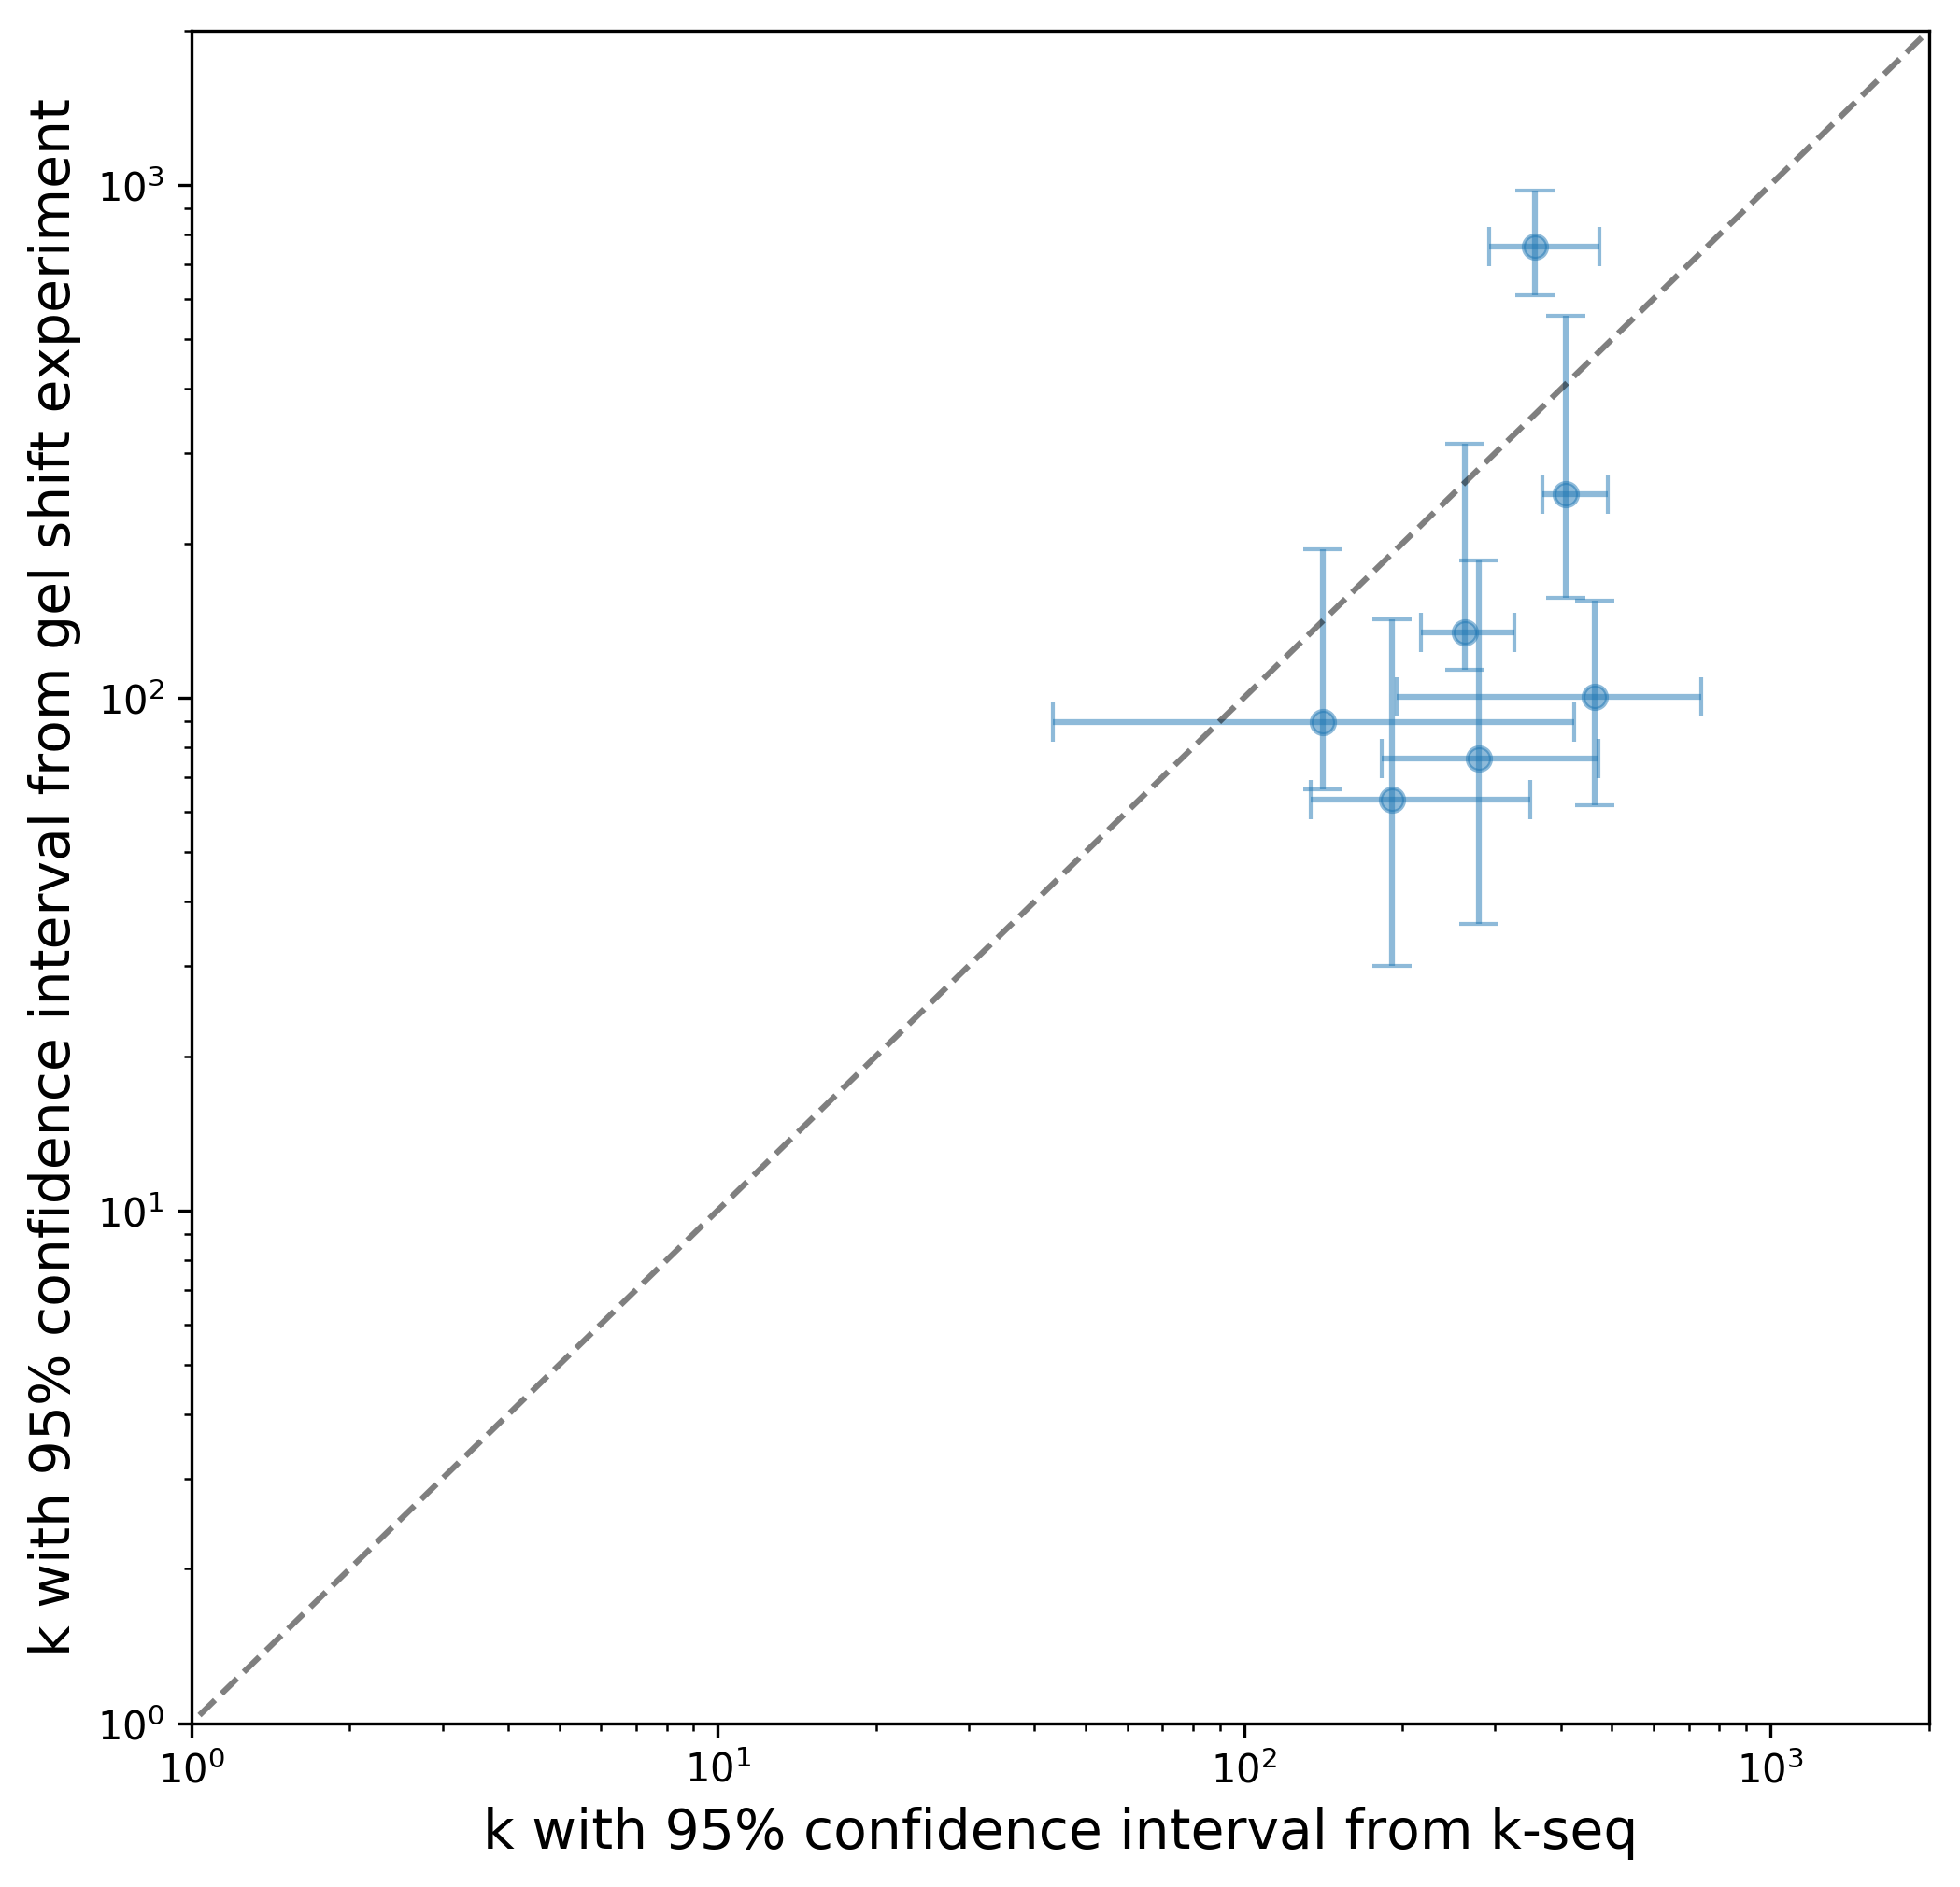

In [381]:
plot_param_alignment(selected_seq, method='bs', param='k', log=True)

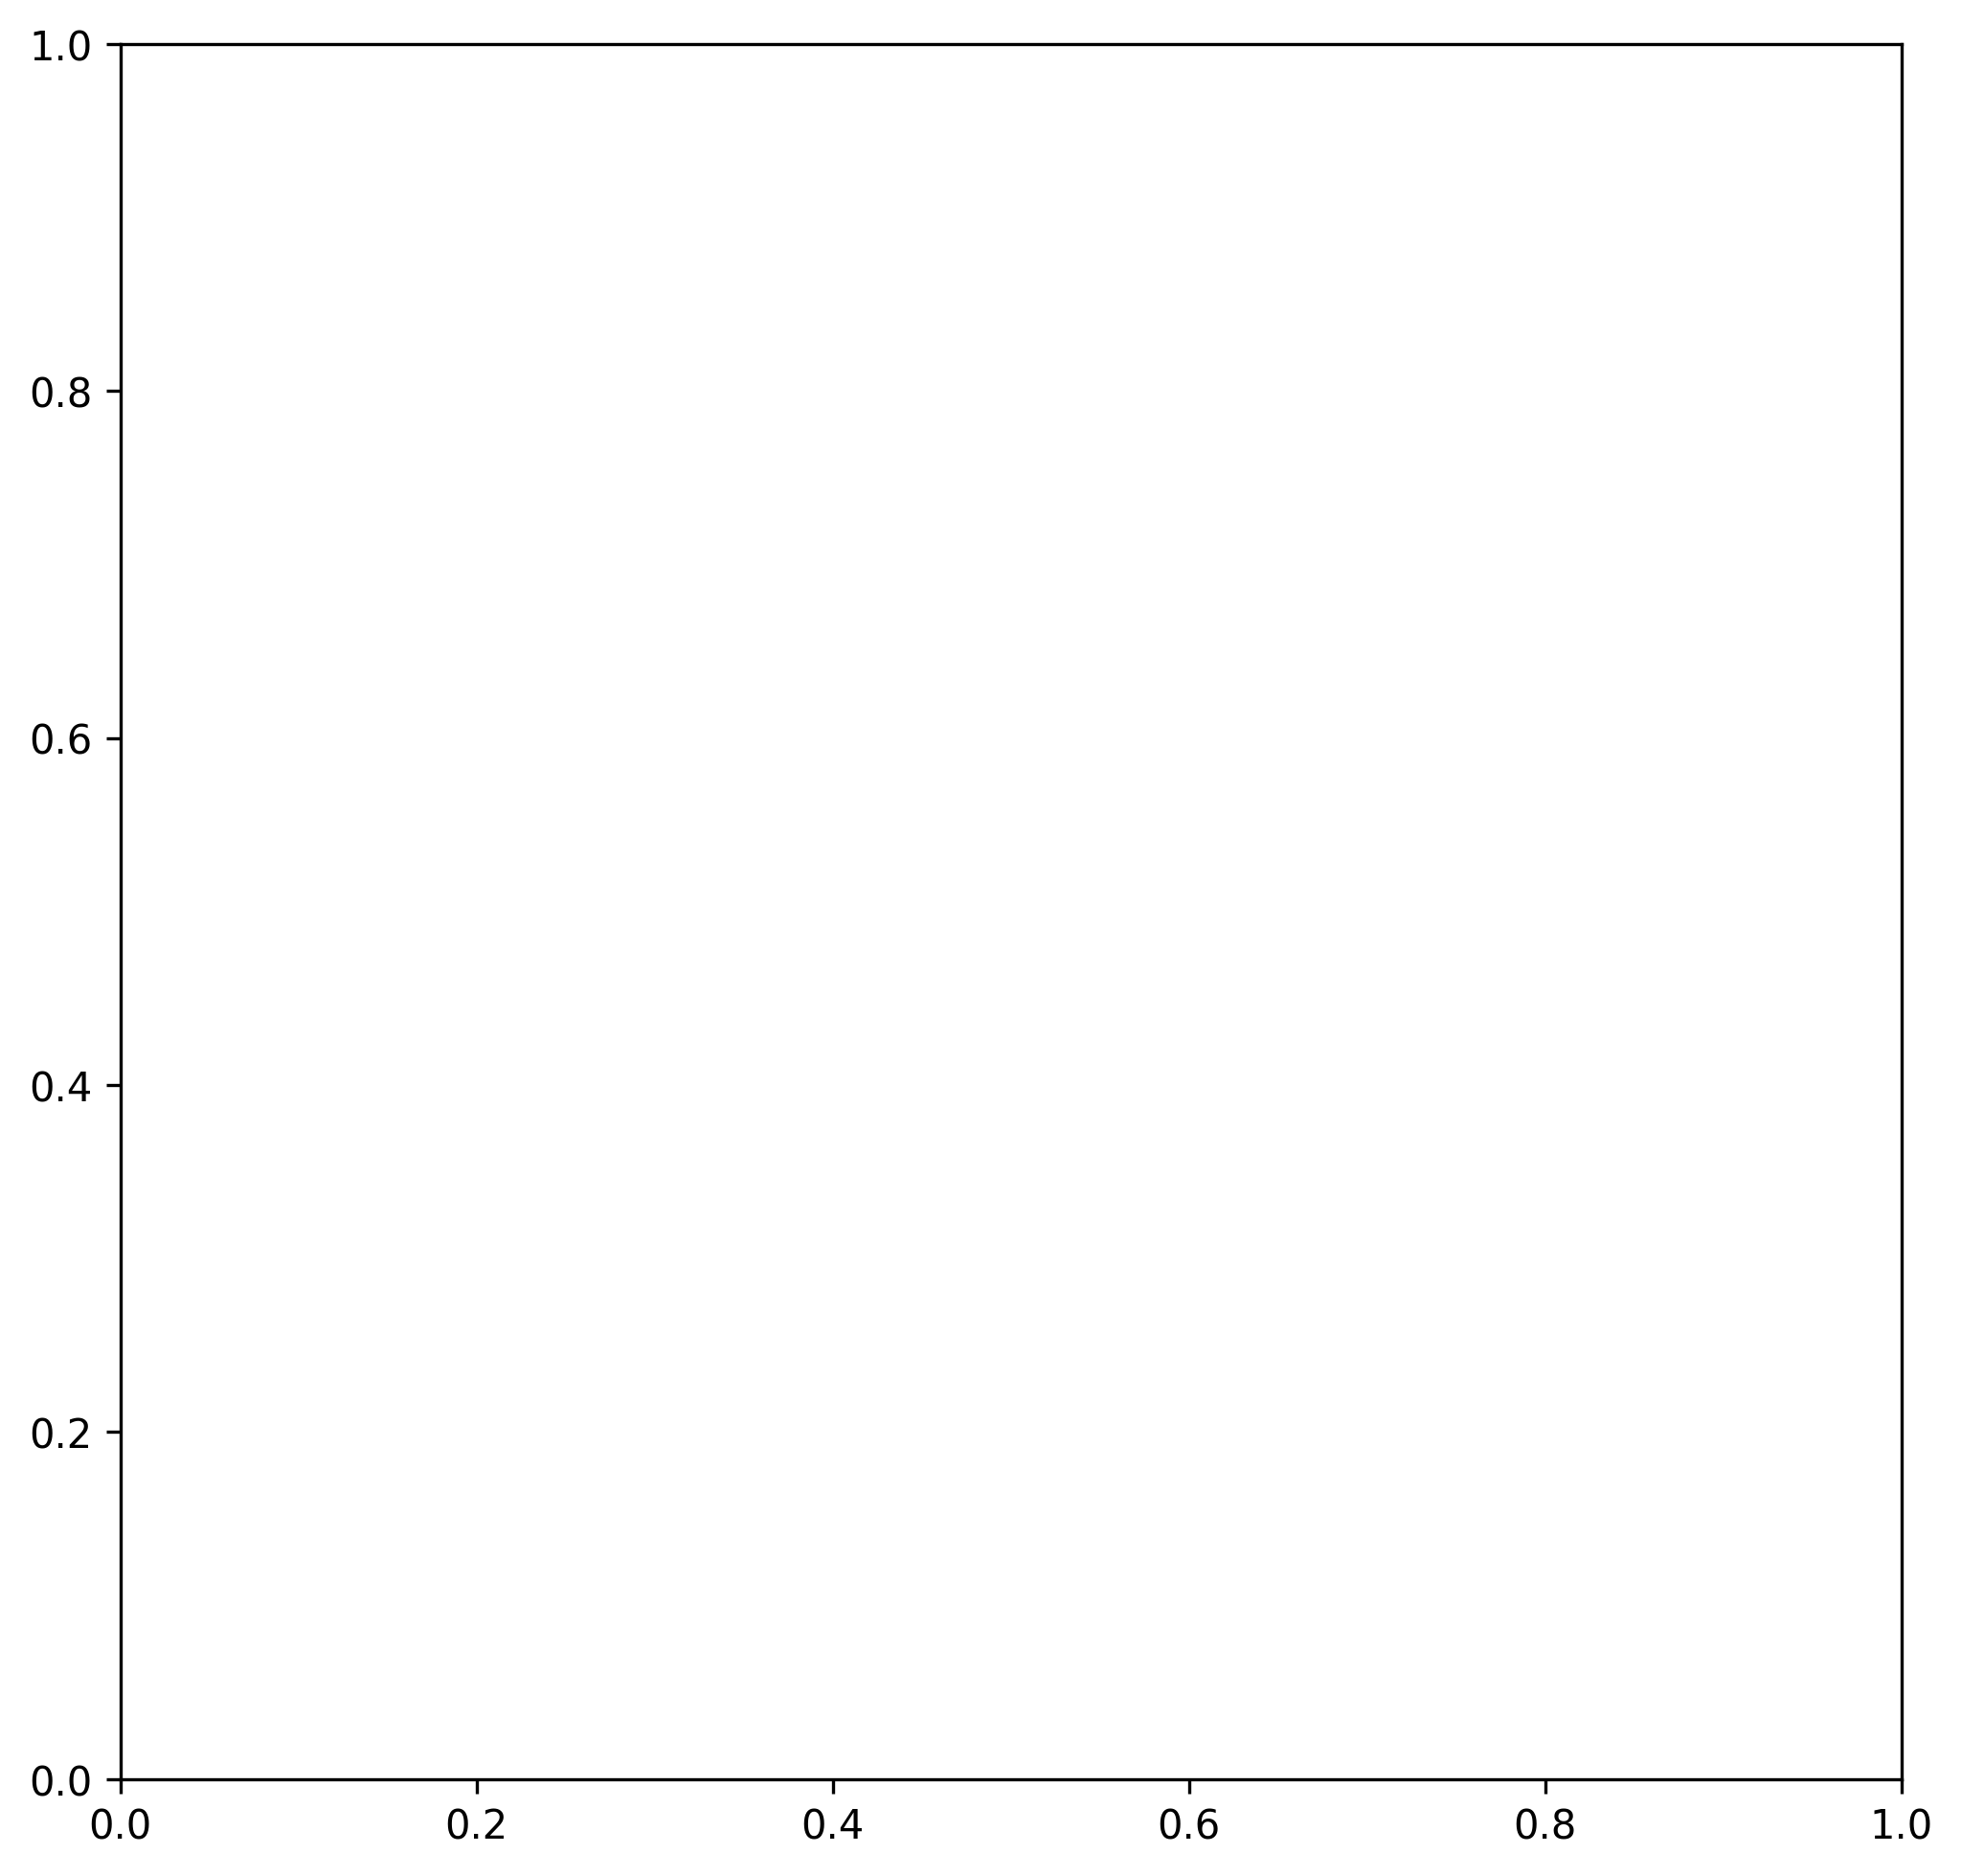

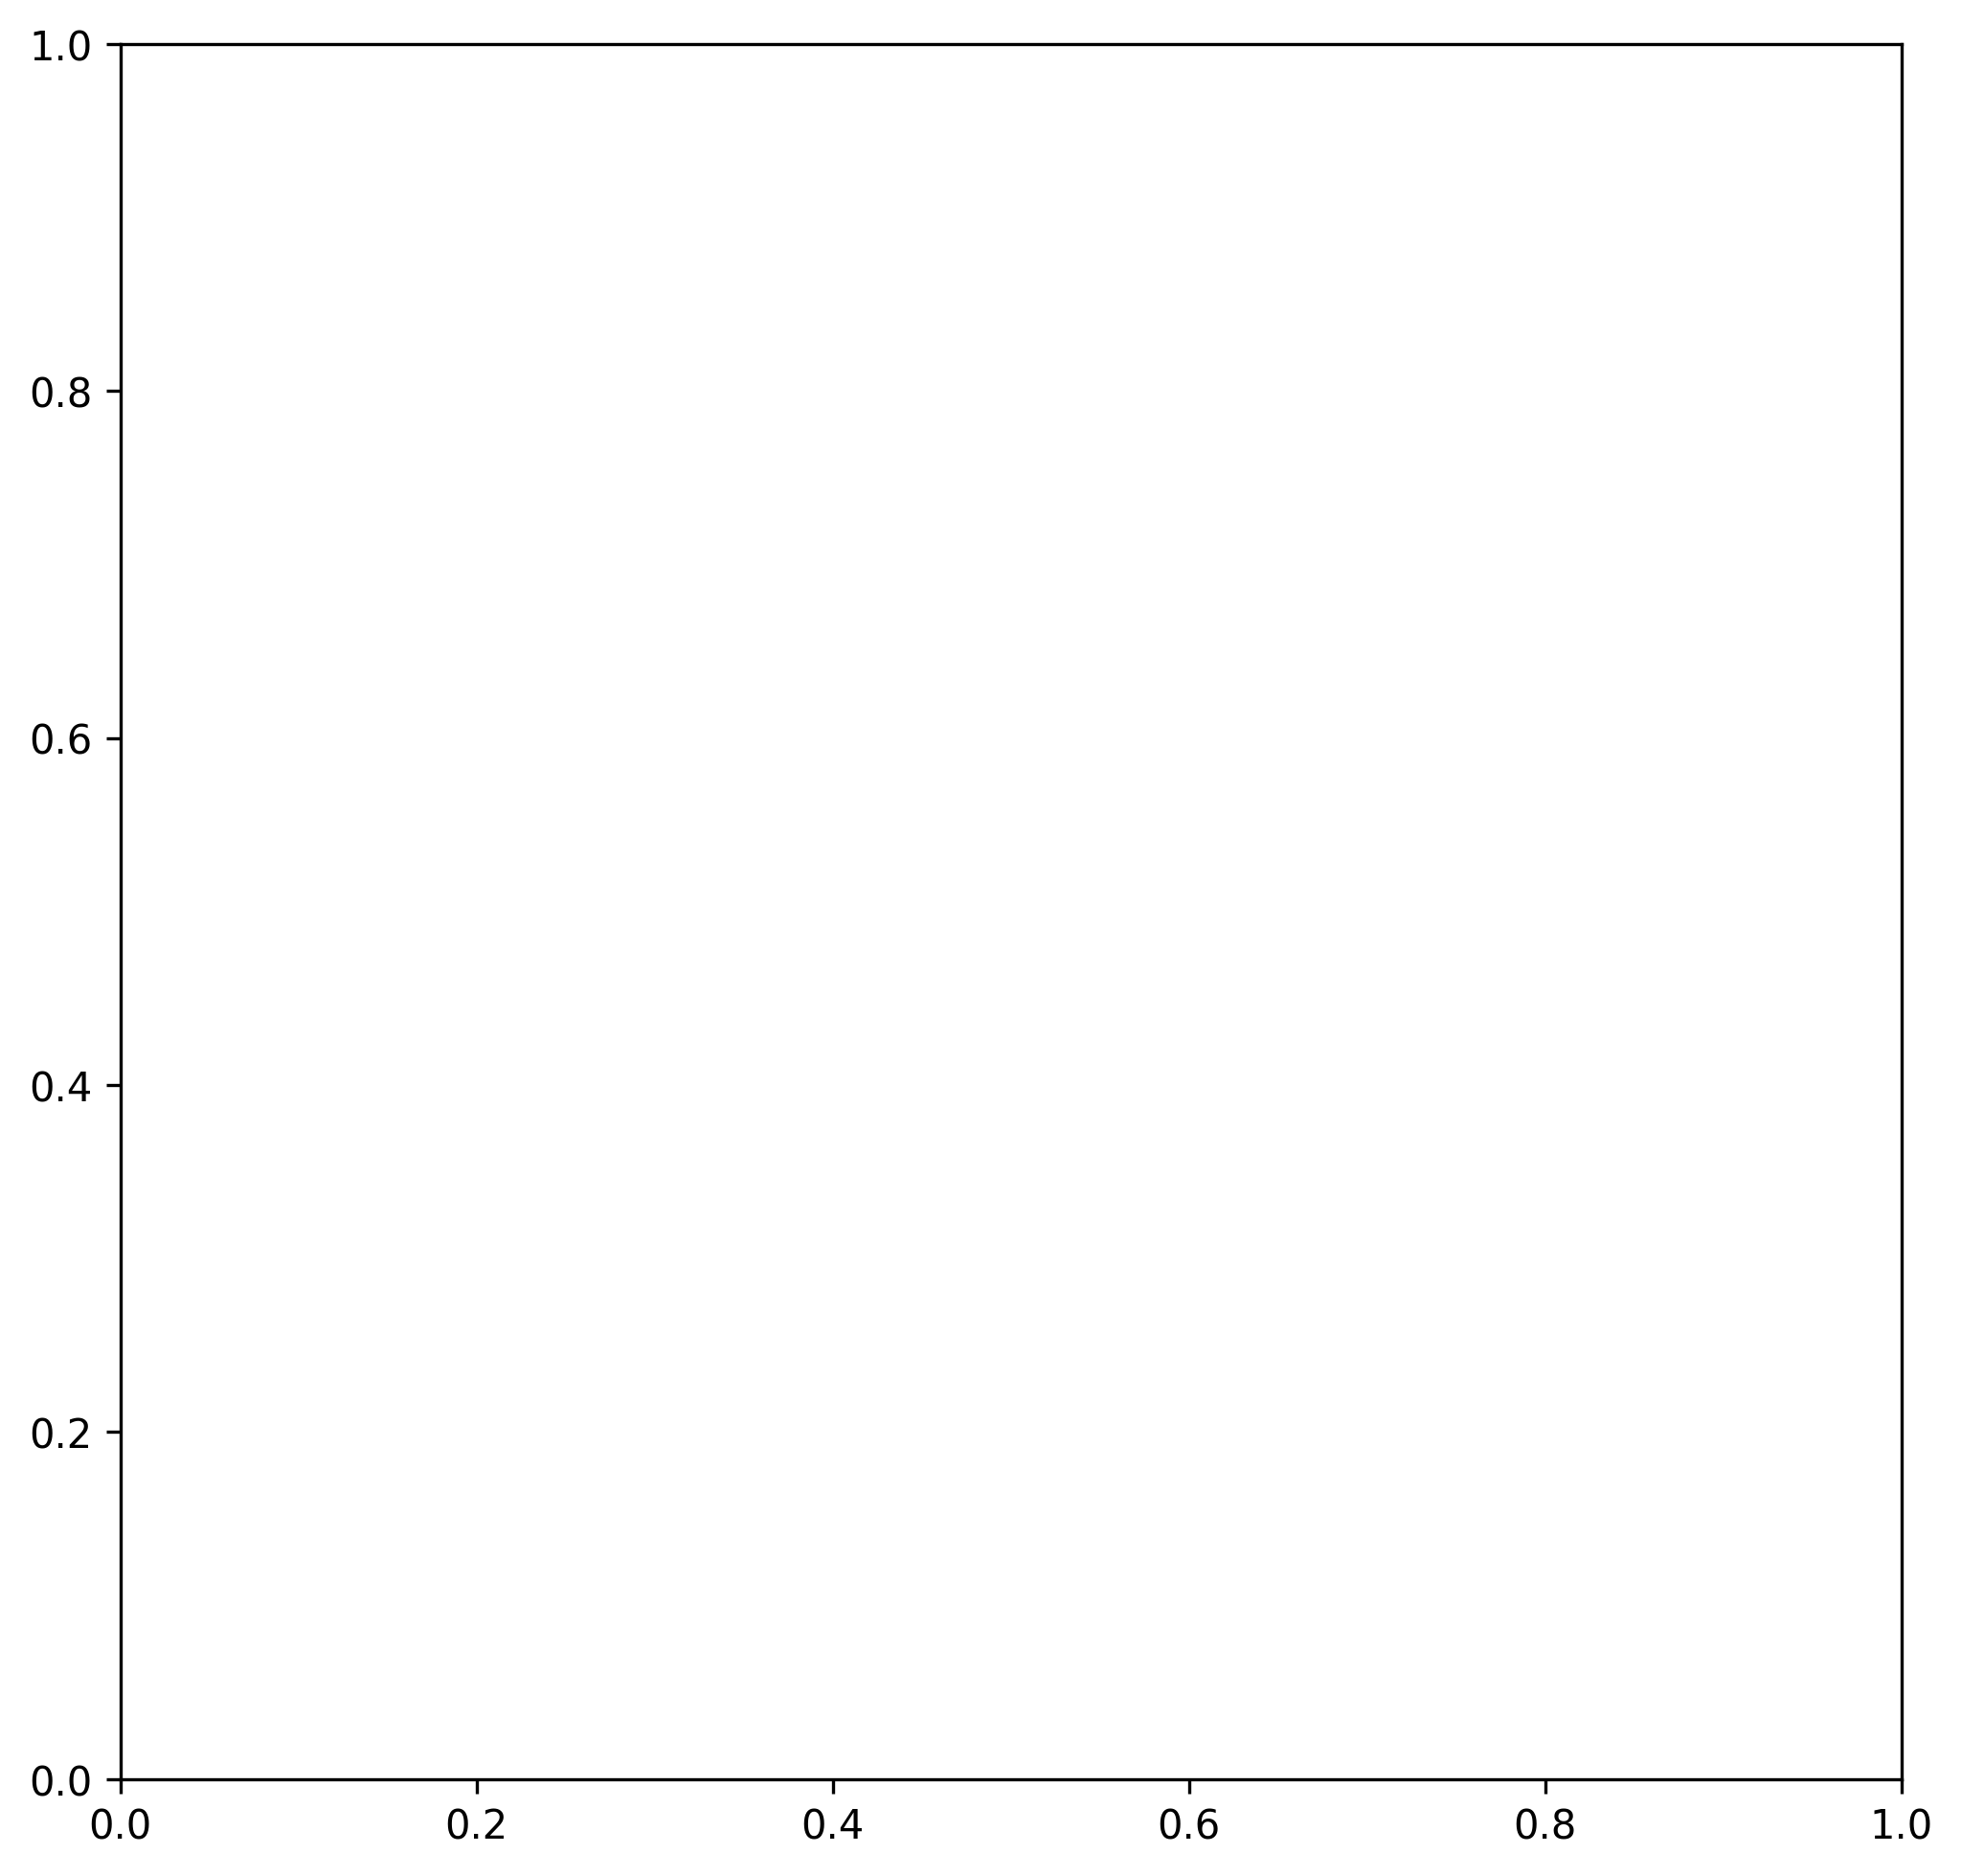

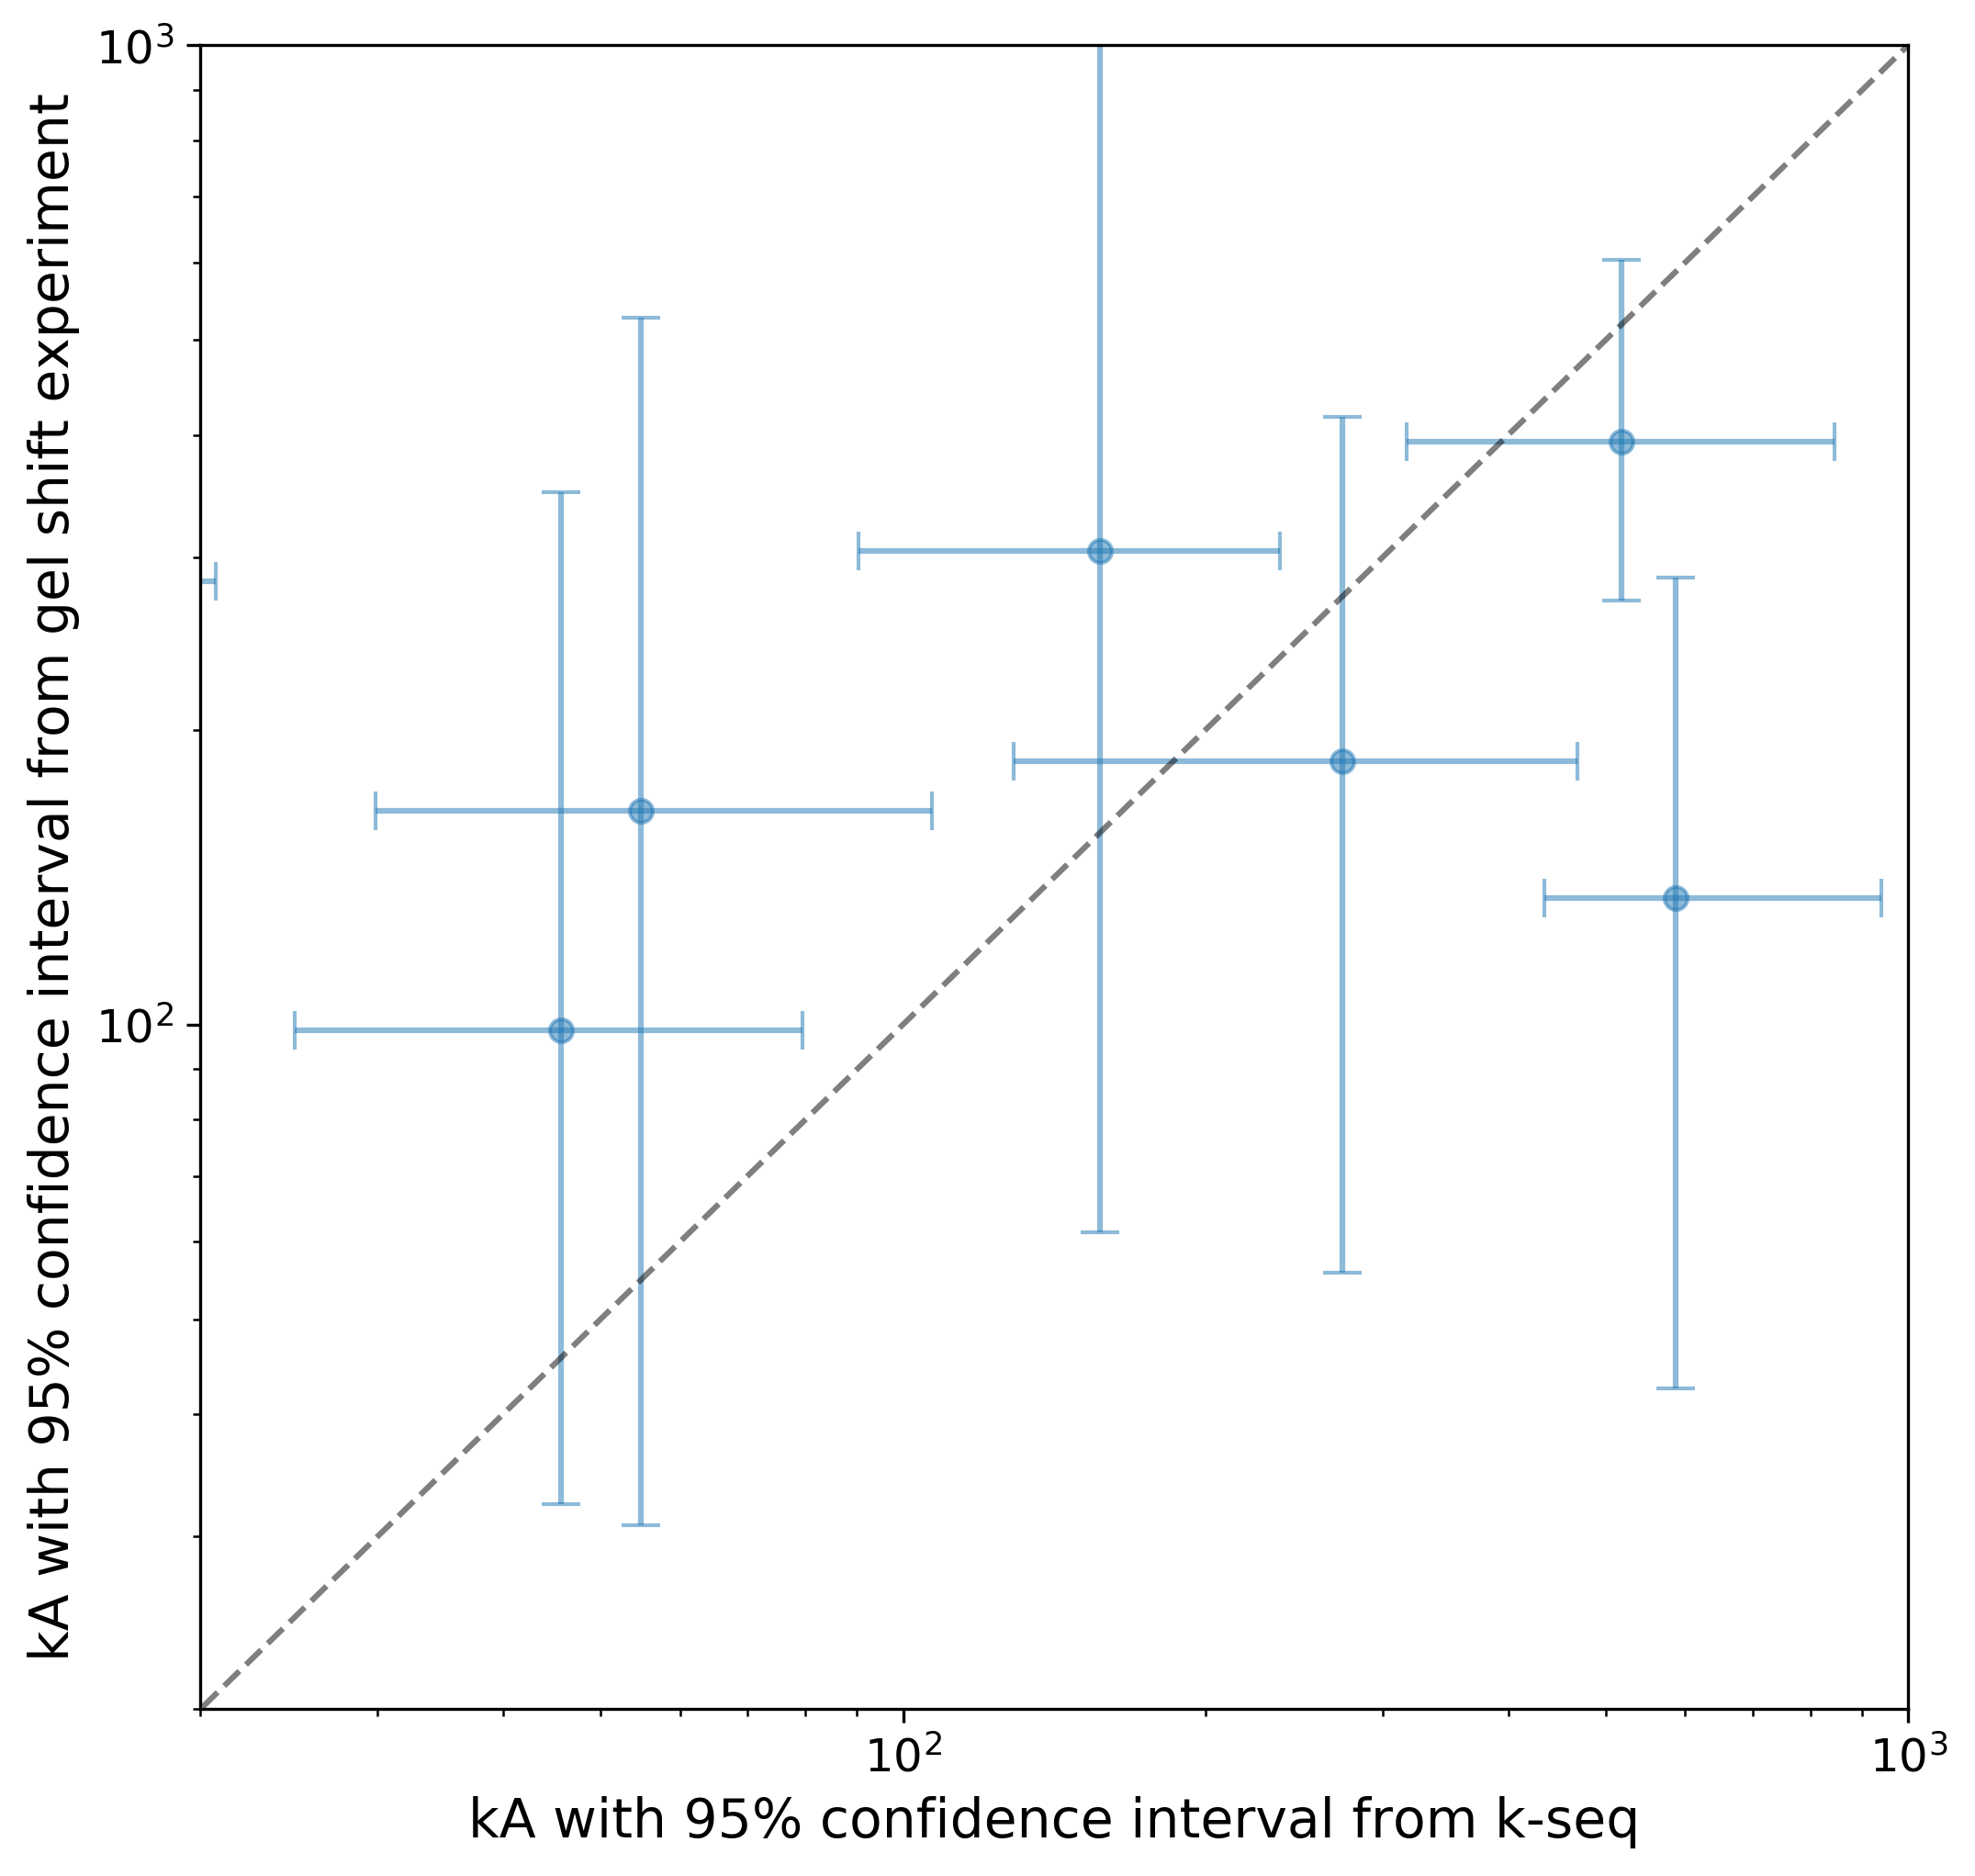

In [224]:
import plot
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
param=2
reskSeq = [selected_seq[seq]['k_seq_results']['ci95'][param][1] for seq in selected_seq.keys()]
reskSeq95 = [(selected_seq[seq]['k_seq_results']['ci95'][param][1] - selected_seq[seq]['k_seq_results']['ci95'][param][0], selected_seq[seq]['k_seq_results']['ci95'][param][2] - selected_seq[seq]['k_seq_results']['ci95'][param][1]) for seq in selected_seq.keys()]


resGel = [selected_seq[seq]['gel_shift_res']['percentiles']['50'][param] for seq in selected_seq.keys()]
resGel95 = [(selected_seq[seq]['gel_shift_res']['percentiles']['50'][param] - selected_seq[seq]['gel_shift_res']['percentiles']['2.5'][param], selected_seq[seq]['gel_shift_res']['percentiles']['97.5'][param] - selected_seq[seq]['gel_shift_res']['percentiles']['50'][param]) for seq in selected_seq.keys()]

ax.errorbar(x=reskSeq, y=resGel, xerr=np.array(reskSeq95).T, yerr=np.array(resGel95).T, marker='o', linestyle='', capsize=5, alpha=0.5)
plot.set_ticks_size(ax)

ax.plot([0, 1000], [0, 1000], 'k--', alpha=0.5)
ax.set_ylim([20, 1000])
ax.set_xlim([20, 1000])
ax.set_yscale('log')
ax.set_xscale('log')
paramDict = {0:'A', 1:'k', 2:'kA'}
ax.set_xlabel('{} with 95% confidence interval from k-seq'.format(paramDict[param]), fontsize=14)
ax.set_ylabel('{} with 95% confidence interval from gel shift experiment'.format(paramDict[param]), fontsize=14)

plt.show()

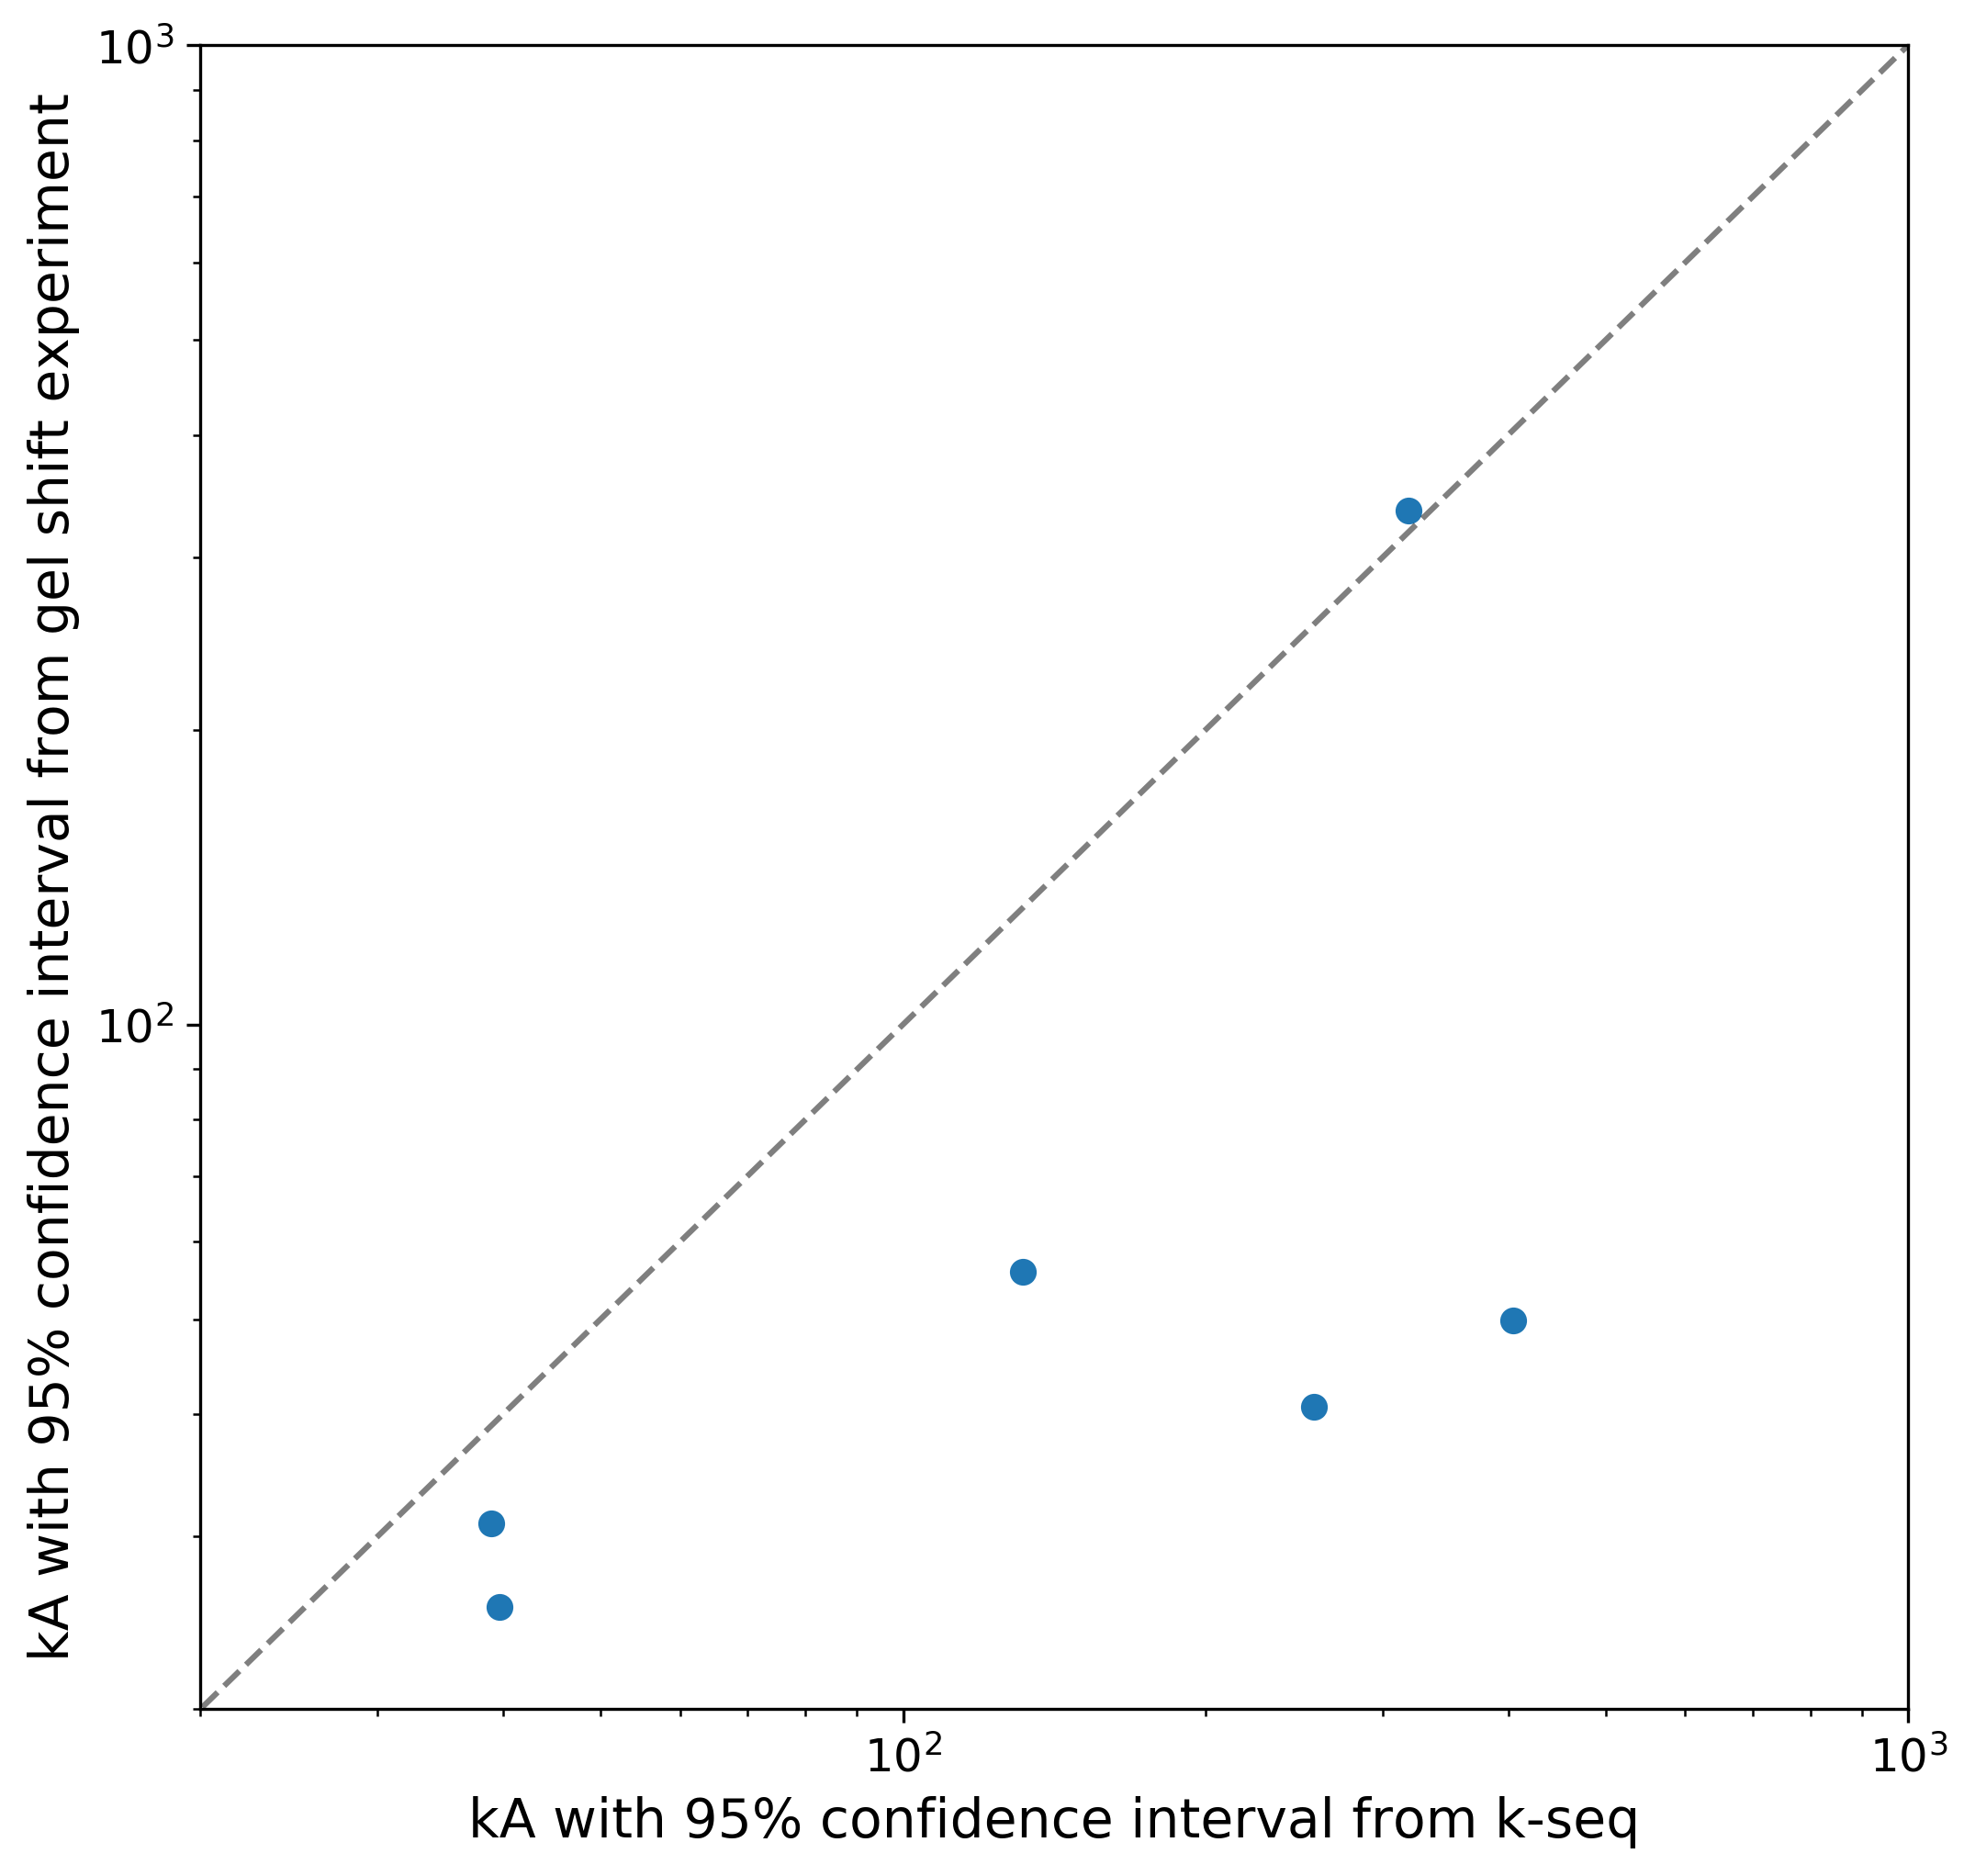

In [235]:
import plot
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def linear_func(x, a, b):
    return a * x + b


fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
param=2
x_k_seq = np.array([selected_seq[seq]['k_seq_results']['params'][param] for seq in selected_seq.keys()])
y_gel = np.array([selected_seq[seq]['gel_shift_res']['params'][param] for seq in selected_seq.keys()])

params, cov = curve_fit(linear_func, x_k_seq, y_gel)

y_hat = linear_func(x_k_seq, *params)
res = y_gel - y_hat
ss_res = np.sum(res ** 2)
ss_tot = np.sum((y_gel - np.mean(y_gel)) ** 2)
r2_0 = (1 - ss_res / ss_tot)


res = y_gel - x_k_seq
ss_res = np.sum(res ** 2)
ss_tot = np.sum((y_gel - np.mean(y_gel)) ** 2)
r2_1 = (1 - ss_res / ss_tot)

res = x_k_seq - y_gel
ss_res = np.sum(res ** 2)
ss_tot = np.sum((x_k_seq - np.mean(x_k_seq)) ** 2)
r2_2 = (1 - ss_res / ss_tot)


ax.scatter(x=x_k_seq, y=y_gel, marker='o')
plot.set_ticks_size(ax)

ax.plot([0, 1000], [0, 1000], 'k--', alpha=0.5)
ax.set_ylim([20, 1000])
ax.set_xlim([20, 1000])
ax.set_yscale('log')
ax.set_xscale('log')
paramDict = {0:'A', 1:'k', 2:'kA'}
ax.set_xlabel('{} with 95% confidence interval from k-seq'.format(paramDict[param]), fontsize=14)
ax.set_ylabel('{} with 95% confidence interval from gel shift experiment'.format(paramDict[param]), fontsize=14)



plt.show()

In [242]:
print(x_k_seq)
print(y_gel)

[318.12582175 404.83549281 131.56135188  38.91601611  39.64001181
 256.36330122   6.05323921]
[335.0400641   49.83563415  55.90053901  30.92180273  25.41991749
  40.72530348  61.26248913]


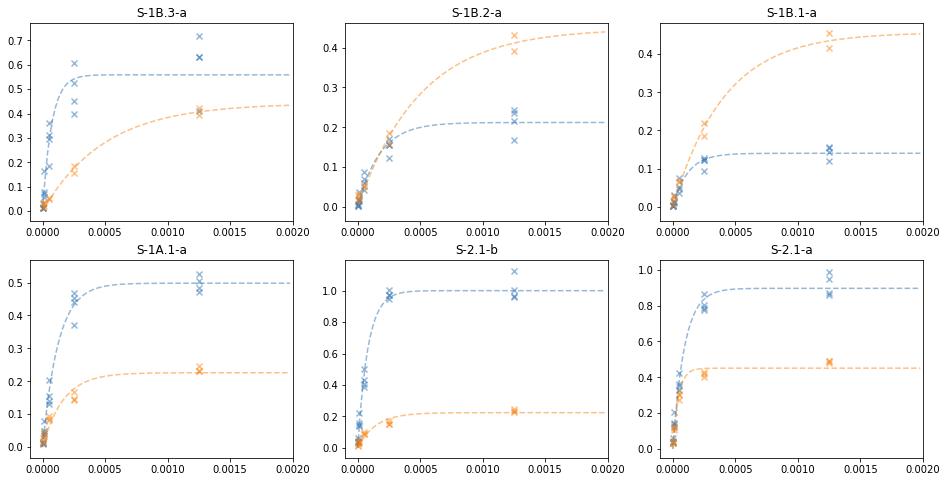

In [337]:
import matplotlib.pyplot as plt

def func(x, A, k):
    return A * (1 - np.exp(-0.3371 * 90 * k * x))

fig, axes = plt.subplots(2, 4, figsize=(16, 6))

for ix, seqId in enumerate(seqFinished):
    ax = axes[int(ix/3), ix%3]
    ax.set_title(seqId, fontsize=12)
    ### Plot k-seq data
    x_data = [x_series for _ in range(len(selected_seq[seq]['gel_shift_data']))]
    x_data = np.reshape(a=x_data, newshape=np.size(x_data))
    y_data = np.reshape(
        a=selected_seq[seq]['gel_shift_data'],
        newshape=np.size(selected_seq[seq]['gel_shift_data'])
    )
    ax.scatter(xdata, ydata, marker='x', color='#2C73B4', alpha=0.5)
    x = np.arange(0, 0.00200, 0.002/100)
    ax.plot(x, exp_func(x, selectedSeq[seqId]['kSeqRes']['params'][0], selectedSeq[seqId]['kSeqRes']['params'][1]), color='#2C73B4', ls='--', alpha=0.5)
    ax.set_xlim([-0.0001, 0.002])
    
    ### Plot gel data
    shape = np.shape(selectedSeq[seqId]['gelRaw'])
    xdata = np.tile(xValues[:-1], shape[0])
    ydata = np.reshape(selectedSeq[seqId]['gelRaw'][...,:-1], shape[0]*(shape[1]-1))
    ax.scatter(xdata, ydata, marker='x', color='#FC820D', alpha=0.5)
    x = np.arange(0, 0.00200, 0.002/100)
    ax.plot(x, exp_func(x, selectedSeq[seqId]['gelRes']['params'][0], selectedSeq[seqId]['gelRes']['params'][1]), color='#FC820D', ls='--', alpha=0.5)

plt.show()

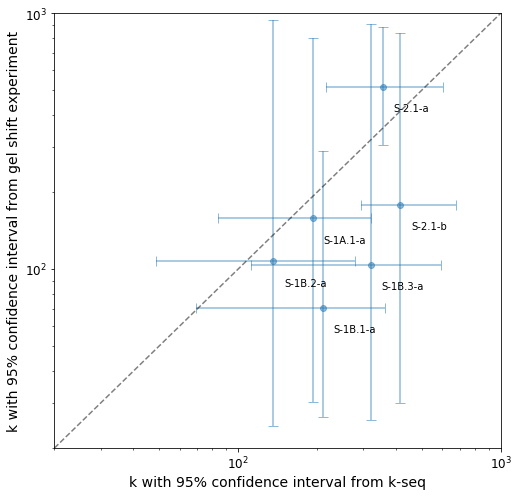

In [373]:
import plot
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
param=1
reskSeq = [selectedSeq[seqId]['kSeqRes']['ci95'][param][1] for seqId in seqFinished]
reskSeq95 = [(selectedSeq[seqId]['kSeqRes']['ci95'][param][1] - selectedSeq[seqId]['kSeqRes']['ci95'][param][0], selectedSeq[seqId]['kSeqRes']['ci95'][param][2] - selectedSeq[seqId]['kSeqRes']['ci95'][param][1]) for seqId in seqFinished]
resGel = [selectedSeq[seqId]['gelRes']['ci95'][param][1] for seqId in seqFinished]
resGel95 = [(selectedSeq[seqId]['gelRes']['ci95'][param][1] - selectedSeq[seqId]['gelRes']['ci95'][param][0], selectedSeq[seqId]['gelRes']['ci95'][param][2] - selectedSeq[seqId]['gelRes']['ci95'][param][1]) for seqId in seqFinished]
ax.errorbar(x=reskSeq, y=resGel, xerr=np.array(reskSeq95).T, yerr=np.array(resGel95).T, marker='o', linestyle='', capsize=5, alpha=0.5)
plot.set_ticks_size(ax)

for seqId in seqFinished:
    ax.text(s=seqId, x=selectedSeq[seqId]['kSeqRes']['ci95'][param][1]*1.1, y=selectedSeq[seqId]['gelRes']['ci95'][param][1]*0.8)
ax.plot([0, 1000], [0, 1000], 'k--', alpha=0.5)
ax.set_ylim([20, 1000])
ax.set_xlim([20, 1000])
ax.set_yscale('log')
ax.set_xscale('log')
paramDict = {0:'A', 1:'k', 2:'kA'}
ax.set_xlabel('{} with 95% confidence interval from k-seq'.format(paramDict[param]), fontsize=14)
ax.set_ylabel('{} with 95% confidence interval from gel shift experiment'.format(paramDict[param]), fontsize=14)

plt.show()

# The rough error correction

In [27]:
import pandas as pd
seqRes = pd.read_csv('/mnt/storage/projects/ribozyme_predict/bfo/fittingRes.csv')
seqRes

seq  inputCountMedian       config  \
0                   AAAAACAAAAACAAA               151  [4 4 4 4 4]   
1              ATTACCCTGGTCATCGAGTT                 2  [4 4 4 4 4]   
2            CACCCCGCTTCAAGCAATCGGT                 1  [0 0 1 1 0]   
3             CCGCTCCAAACAATCGGTCTG                 1  [1 0 1 0 0]   
4                    AAAACAAAAACAAA                 4  [4 4 4 4 4]   
5                    AAAAACAAAAACAA                 1  [4 4 4 4 4]   
6              ATTCCCTGGTCATCGAGTGT                 2  [4 4 4 4 4]   
7             AAATTCAAAAACAAAAACAAA                 2  [4 3 4 4 4]   
8                          ATTACCCT                 1  [4 4 4 4 4]   
9             CCCCTTCAATAATCGGTCATG                 1  [1 0 1 0 0]   
10            CCTGGTTTCAAACAATCGGTC                 1  [1 1 1 0 0]   
11              ATTACCCTGGTCATCGAGT                 5  [4 4 4 4 4]   
12            CTACTCTTCAACCAATCGGTC                 1  [0 1 0 1 0]   
13             AAAAACAAACCAAAAACAAA                 1  [0 1 0 2 0]   
14            CTGTTTCAAACATTCGGTCTC                 1  [0 2 1 0 0]   
15            CTCATTTCAATAATCGCCTGC                 1  [1 0 1 0 0]   
16                        AAAAACAAA                 2  [4 4 4 4 4]   
17            ATTACCCCTGTCATCGAGTGA                 1  [4 4 4 4 4]   
18            CTGCTATCAATAATCGCCTGC                 1  [0 2 1 0 0]   
19                              GGT                 1  [0 1 2 0 0]   
20          ATTACCCTGGTCATCGAGTGTCA                 1  [4 4 4 4 4]   
21            CTCTACTTCAAACAATCGGTC                 1  [0 1 2 0 0]   
22                 AAAAAACAAAAACAAA                14  [4 4 4 4 4]   
23            CCCCTGCTTCAAGCAATCGGT                 1  [0 1 1 0 0]   
24            CCGGCTTCAAGCAATCGGTCT                 1  [0 1 1 0 0]   
25             ATTCCCTGGTCATCGAGTGA                 6  [4 4 4 4 4]   
26         ACCCCGCTTCAAGCAATCGGTCTG                 1  [1 1 0 0 0]   
27           CTACTTCAAAACAATCGGCCTG                 1  [0 1 1 0 0]   
28               ATTACCCTGGTCGAGTGT                13  [4 4 4 4 4]   
29            GCTCTTCAAACAATCGGTCTC                 1  [0 2 2 0 0]   
...                             ...               ...          ...   
9056          AACCCGCTTCAAGCAAACGGT                 1  [0 1 0 0 0]   
9057          AACAATTATTCCCCTACGTGA                 1  [0 0 1 0 0]   
9058          AAATGCTGGTCCTCCCTGTGA                 1  [0 0 0 1 0]   
9059          AAATAGCTTCAAGCAATCGGT                 1  [0 0 1 0 0]   
9060          AAAGTTGCCTTTCCCTCGTGA                 1  [0 1 0 0 0]   
9061          AAACTTCAAACAATCGGTCTG                 1  [0 0 0 0 1]   
9062          AAACCCGCTTTGCATGCGTGA                 1  [0 0 1 0 0]   
9063          AAACCACTTCAACAATCGGTC                 1  [1 0 0 0 0]   
9064                 AAACAGTCGGTCTG                 1  [0 1 0 0 0]   
9065      AAACAAAAAAAAAAACAAAAACAAA                 1  [0 1 0 0 0]   
9066         AAAACCCTGGTCATCGAGTGTT                 1  [0 0 1 0 0]   
9067            AAAACCAAACAAAAACAAA                 1  [0 0 1 0 0]   
9068         AAAACCAAAAACCAAAAACAAA                 1  [0 0 0 0 1]   
9069            AAAACAAAACAAAAAAAAA                 1  [0 0 0 0 1]   
9070         AAAAACCAAACACAAAAACAAA                 1  [0 0 1 0 0]   
9071           AAAAACCAAAAACAAACAAA                 1  [1 0 0 0 0]   
9072         AAAAACCAAAAACAAAAACGAA                 1  [1 0 0 0 0]   
9073          AAAAACAAACACGAAAACAAA                 1  [0 0 1 0 0]   
9074        AAAAACAAAACCAAAAAAACAAA                 1  [0 0 0 1 0]   
9075              AAAAACAAAAACAAAAC                 1  [1 0 0 0 0]   
9076    AAAAACAAAAACAAAAACAAAACCAAA                 1  [0 1 0 0 0]   
9077       AAAAACAAAAACAAAAAAAATAAA                 1  [0 0 1 0 0]   
9078      AAAAACAAAAAAAAAACAAAACAAA                 1  [0 0 0 0 1]   
9079              AAAAACAAAAAAAAAAA                 1  [0 1 0 0 0]   
9080          AAAAAAGAAAACAAAAACAAA                 1  [1 0 0 0 0]   
9081  AAAAAACAAAAAAAAAAAACAAAAACAAA       

limit_output extension: Maximum message size of 10000 exceeded with 31107 characters

In [ ]:
def seq_err_est_rough(seqList, pErrTotal, pErrLambda):
    """
    A rough method to estimate if a sequence can be possibly come from an error; If yes, label
    """
    
    def get_transition_probability(centerSeq, testSeq, pErrTotal, pErrLambda):
        import Levenshtein
        
        edits = Levenshtein.editops(centerSeq, testSeq)
        d1 = np.sum([1 for edit in edits if edit[0]=='replace'])
        d2 = len(edits) - d1
        return (1-pErrTotal)**len(centerSeq), (pErrLambda*pErrTotal/3)**d1*((1-pErrLambda)pErrTotal/2)**d2*(1-pErrTotal)**(len(centerSeq)-d1-d2)
    
    def test_end(seqList):
        while 
        for seq in seqList.iterrow():
            if pErrTotal**(len(seq['seq'])-1)(1-pErrTotal)*seq['inputCountMedian']:
                
        
        
    